# **import des modules**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model   import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics        import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV

# **Import des donnees**

In [3]:
df = pd.read_csv('vehicles.csv')

C:\Users\Infoshop\AppData\Local\Temp\ipykernel_16316\3174050785.py:1: DtypeWarning: Columns (74,75,77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicles.csv')


# **Inspection initiale**

In [4]:
df.head()

barrels08  barrelsA08  charge120  charge240  city08  city08U  cityA08  \
0  14.167143         0.0        0.0        0.0      19      0.0        0   
1  27.046364         0.0        0.0        0.0       9      0.0        0   
2  11.018889         0.0        0.0        0.0      23      0.0        0   
3  27.046364         0.0        0.0        0.0      10      0.0        0   
4  15.658421         0.0        0.0        0.0      17      0.0        0   

   cityA08U  cityCD  cityE  ...  mfrCode  c240Dscr  charge240b  c240bDscr  \
0       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
1       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
2       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
3       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   
4       0.0     0.0    0.0  ...      NaN       NaN         0.0        NaN   

                      createdOn                    modifiedOn  startStop  \
0  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
1  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
2  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
3  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   
4  Tue Jan 01 00:00:00 EST 2013  Tue Jan 01 00:00:00 EST 2013        NaN   

   phevCity  phevHwy  phevComb  
0         0        0         0  
1         0        0         0  
2         0        0         0  
3         0        0         0  
4         0        0         0  

[5 rows x 84 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48671 entries, 0 to 48670
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   barrels08        48671 non-null  float64
 1   barrelsA08       48671 non-null  float64
 2   charge120        48671 non-null  float64
 3   charge240        48671 non-null  float64
 4   city08           48671 non-null  int64  
 5   city08U          48671 non-null  float64
 6   cityA08          48671 non-null  int64  
 7   cityA08U         48671 non-null  float64
 8   cityCD           48671 non-null  float64
 9   cityE            48671 non-null  float64
 10  cityUF           48671 non-null  float64
 11  co2              48671 non-null  int64  
 12  co2A             48671 non-null  int64  
 13  co2TailpipeAGpm  48671 non-null  float64
 14  co2TailpipeGpm   48671 non-null  float64
 15  comb08           48671 non-null  int64  
 16  comb08U          48671 non-null  float64
 17  combA08     

**Dimensions**

In [6]:
df.shape

(48671, 84)

In [7]:
df.describe()

barrels08    barrelsA08     charge120     charge240        city08  \
count  48671.000000  48671.000000  48671.000000  48671.000000  48671.000000   
mean      15.031471      0.192887      0.000066      0.256523     20.225555   
std        4.648660      0.985840      0.014505      1.606917     13.477959   
min        0.047081      0.000000      0.000000      0.000000      6.000000   
25%       12.396250      0.000000      0.000000      0.000000     15.000000   
50%       14.875500      0.000000      0.000000      0.000000     18.000000   
75%       17.500588      0.000000      0.000000      0.000000     21.000000   
max       42.501429     16.528333      3.200000     19.000000    153.000000   

            city08U       cityA08      cityA08U        cityCD         cityE  \
count  48671.000000  48671.000000  48671.000000  48671.000000  48671.000000   
mean       9.757117      0.952600      0.828523      0.000604      1.301316   
std       17.407542      7.106648      7.039095      0.037552      7.581951   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%       18.043100      0.000000      0.000000      0.000000      0.000000   
max      155.824200    145.000000    145.083500      5.350000    122.000000   

       ...         UCity        UCityA      UHighway     UHighwayA  \
count  ...  48671.000000  48671.000000  48671.000000  48671.000000   
mean   ...     25.903277      1.280972     36.646852      1.078179   
std    ...     19.428705     10.079485     16.681279      7.302081   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     18.773200      0.000000     28.211250      0.000000   
50%    ...     22.000000      0.000000     34.000000      0.000000   
75%    ...     26.900000      0.000000     40.100000      0.000000   
max    ...    224.800000    207.262200    198.800000    173.143600   

               year  youSaveSpend    charge240b      phevCity       phevHwy  \
count  48671.000000  48671.000000  48671.000000  48671.000000  48671.000000   
mean    2004.789854  -4936.630642      0.015071      0.352140      0.357194   
std       12.776345   4126.680792      0.317230      4.257993      4.132213   
min     1984.000000 -35750.000000      0.000000      0.000000      0.000000   
25%     1993.000000  -7500.000000      0.000000      0.000000      0.000000   
50%     2006.000000  -5000.000000      0.000000      0.000000      0.000000   
75%     2016.000000  -2500.000000      0.000000      0.000000      0.000000   
max     2026.000000   8500.000000      9.600000    111.000000     91.000000   

           phevComb  
count  48671.000000  
mean       0.352695  
std        4.172310  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      101.000000  

[8 rows x 59 columns]

# **Netoyage**

Les valeurs nulles

In [8]:
df.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31689
phevCity          0
phevHwy           0
phevComb          0
Length: 84, dtype: int64

In [9]:
cols_miss=df.columns[df.isna().sum() > 0]
cols_miss

Index(['cylinders', 'displ', 'drive', 'eng_dscr', 'trany', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'c240bDscr', 'startStop'],
      dtype='object')

**Duplicates**


In [10]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [barrels08, barrelsA08, charge120, charge240, city08, city08U, cityA08, cityA08U, cityCD, cityE, cityUF, co2, co2A, co2TailpipeAGpm, co2TailpipeGpm, comb08, comb08U, combA08, combA08U, combE, combinedCD, combinedUF, cylinders, displ, drive, engId, eng_dscr, feScore, fuelCost08, fuelCostA08, fuelType, fuelType1, ghgScore, ghgScoreA, highway08, highway08U, highwayA08, highwayA08U, highwayCD, highwayE, highwayUF, hlv, hpv, id, lv2, lv4, make, model, mpgData, phevBlended, pv2, pv4, range, rangeCity, rangeCityA, rangeHwy, rangeHwyA, trany, UCity, UCityA, UHighway, UHighwayA, VClass, year, youSaveSpend, baseModel, guzzler, trans_dscr, tCharger, sCharger, atvType, fuelType2, rangeA, evMotor, mfrCode, c240Dscr, charge240b, c240bDscr, createdOn, modifiedOn, startStop, phevCity, phevHwy, phevComb]
Index: []

[0 rows x 84 columns]


constat : pas de colonnes dupliquee




## **Traitement des outliers**


🔍 Analyse de la colonne : barrels08


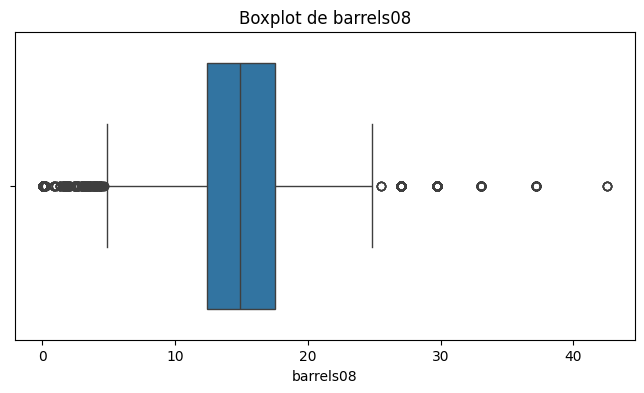

Nombre d'outliers dans 'barrels08' : 2094
Exemples d'outliers :
    barrels08
1   27.046364
3   27.046364
47  29.751000
58  29.751000
69  29.751000

🔍 Analyse de la colonne : barrelsA08


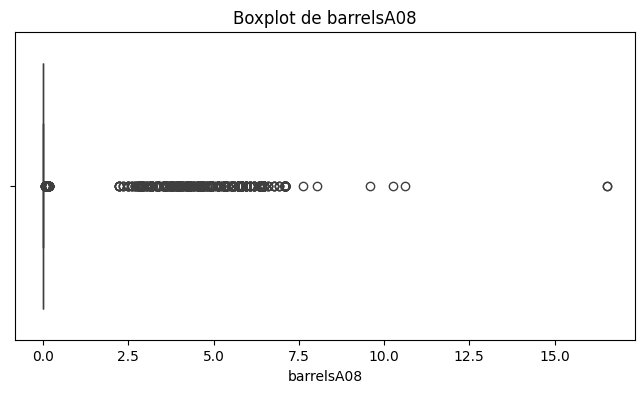

Nombre d'outliers dans 'barrelsA08' : 1962
Exemples d'outliers :
      barrelsA08
7116    0.072975
7122    4.258000
7124    4.562143
7125    5.322500
7126    4.913077

🔍 Analyse de la colonne : charge120


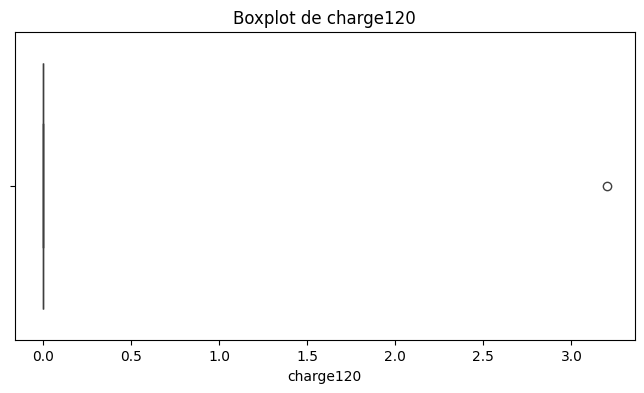

Nombre d'outliers dans 'charge120' : 1
Exemples d'outliers :
       charge120
42520        3.2

🔍 Analyse de la colonne : charge240


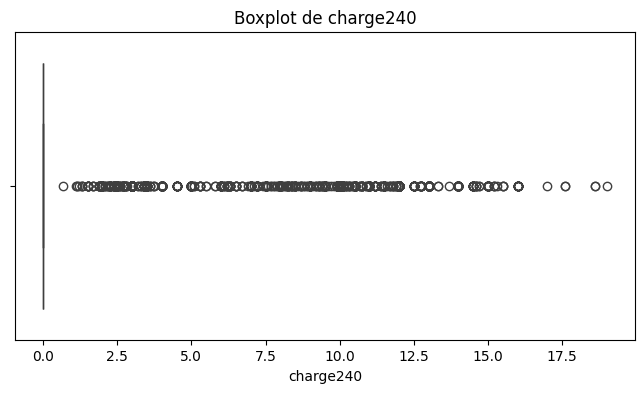

Nombre d'outliers dans 'charge240' : 1489
Exemples d'outliers :
       charge240
23031        7.0
23033        4.0
23127        8.0
23128        8.0
23735        4.0

🔍 Analyse de la colonne : city08


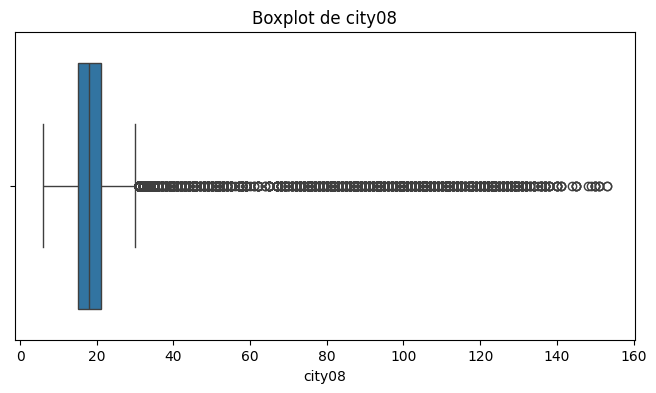

Nombre d'outliers dans 'city08' : 2373
Exemples d'outliers :
     city08
446      31
775      31
776      38
812      31
822      31

🔍 Analyse de la colonne : city08U


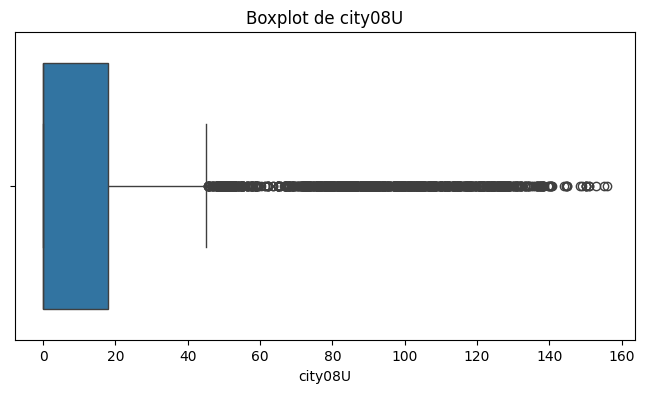

Nombre d'outliers dans 'city08U' : 1294
Exemples d'outliers :
        city08U
22965   49.3956
23796  126.4000
23900   49.3640
24039   61.9000
24355   52.5351

🔍 Analyse de la colonne : cityA08


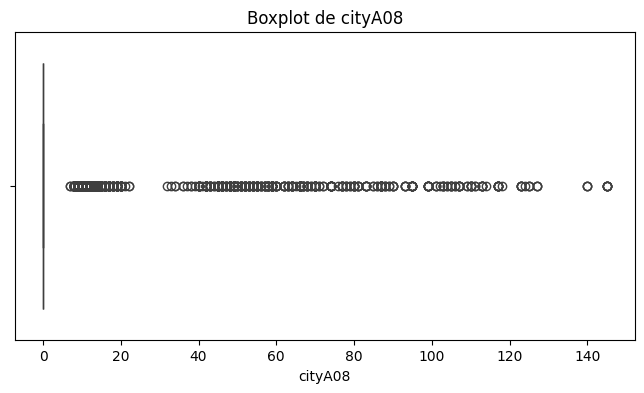

Nombre d'outliers dans 'cityA08' : 1962
Exemples d'outliers :
      cityA08
7116       18
7122       12
7124       12
7125       11
7126       12

🔍 Analyse de la colonne : cityA08U


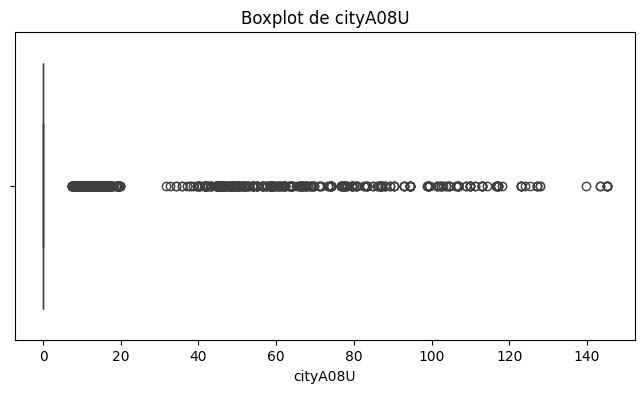

Nombre d'outliers dans 'cityA08U' : 1402
Exemples d'outliers :
       cityA08U
22122   10.8555
22123   10.4226
22124   11.2256
22127   10.8552
22128   10.3922

🔍 Analyse de la colonne : cityCD


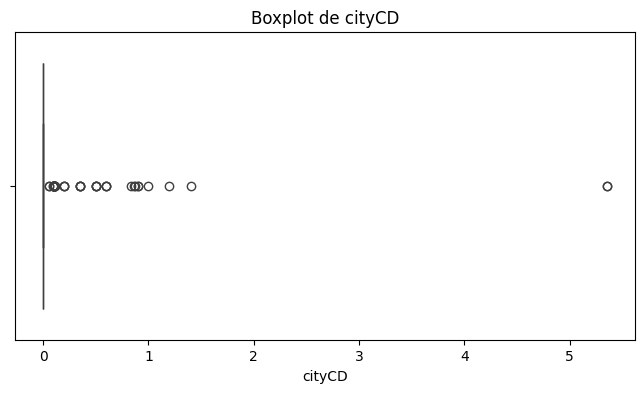

Nombre d'outliers dans 'cityCD' : 74
Exemples d'outliers :
       cityCD
24686  0.3500
25628  0.3500
26919  0.3500
27214  0.8700
27754  0.8667

🔍 Analyse de la colonne : cityE


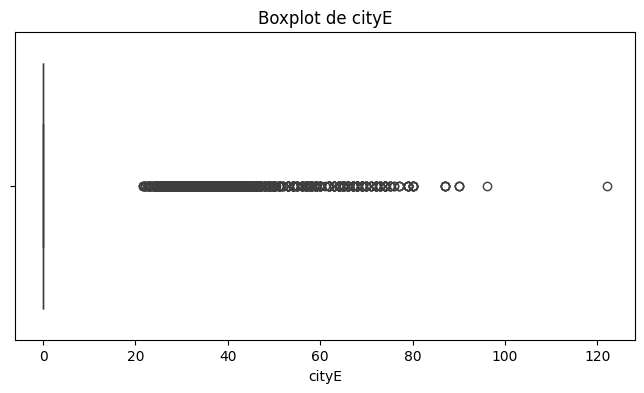

Nombre d'outliers dans 'cityE' : 1550
Exemples d'outliers :
      cityE
7138   41.0
7139   41.0
8143   41.0
8144   46.0
8146   75.0

🔍 Analyse de la colonne : cityUF


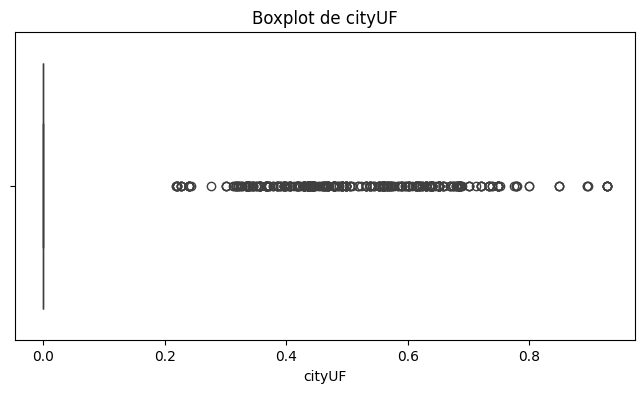

Nombre d'outliers dans 'cityUF' : 404
Exemples d'outliers :
       cityUF
23033   0.640
23735   0.640
24686   0.317
24722   0.620
24875   0.680

🔍 Analyse de la colonne : co2


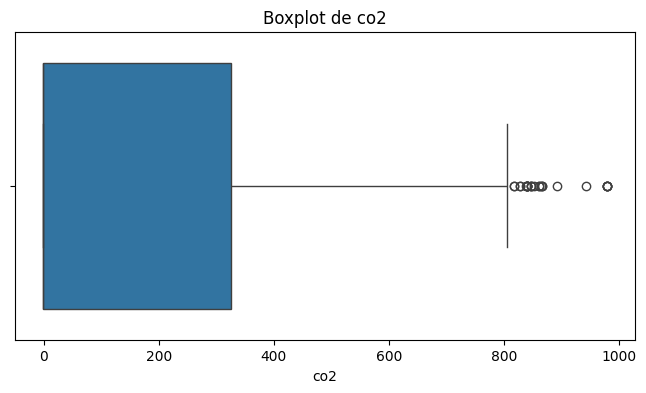

Nombre d'outliers dans 'co2' : 27
Exemples d'outliers :
       co2
24876  847
25935  847
27380  847
31342  829
31744  840

🔍 Analyse de la colonne : co2A


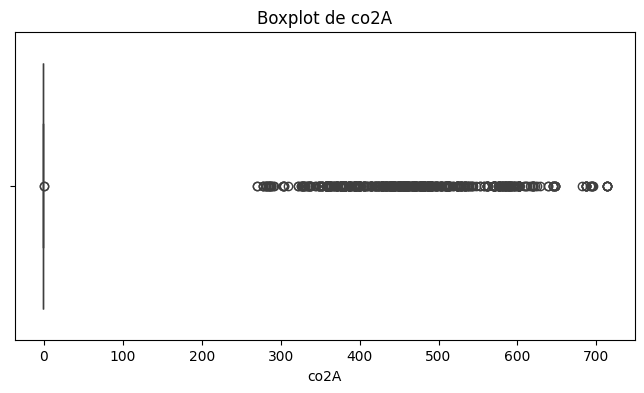

Nombre d'outliers dans 'co2A' : 699
Exemples d'outliers :
       co2A
24409   429
24418   451
24436   396
24440   429
24549   648

🔍 Analyse de la colonne : co2TailpipeAGpm


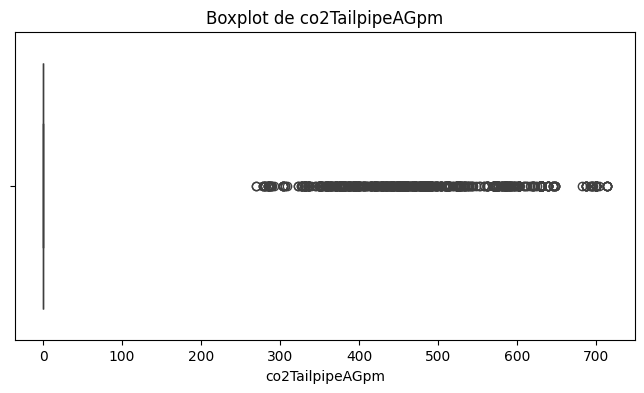

Nombre d'outliers dans 'co2TailpipeAGpm' : 1558
Exemples d'outliers :
      co2TailpipeAGpm
7116       351.500000
7122       419.666667
7124       449.642857
7125       524.583333
7126       484.230769

🔍 Analyse de la colonne : co2TailpipeGpm


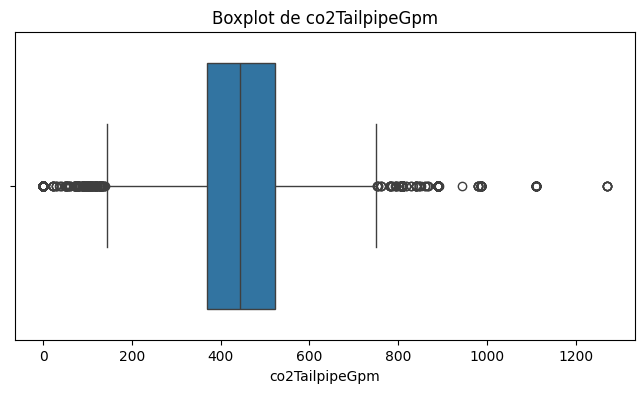

Nombre d'outliers dans 'co2TailpipeGpm' : 2034
Exemples d'outliers :
    co2TailpipeGpm
1       807.909091
3       807.909091
47      888.700000
58      888.700000
69      888.700000

🔍 Analyse de la colonne : comb08


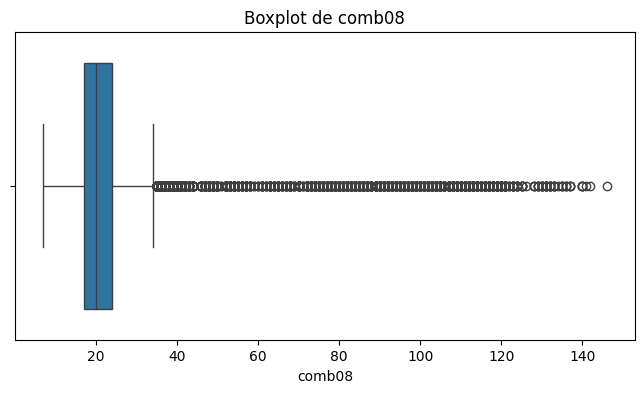

Nombre d'outliers dans 'comb08' : 2079
Exemples d'outliers :
     comb08
776      41
823      40
825      47
827      38
828      36

🔍 Analyse de la colonne : comb08U


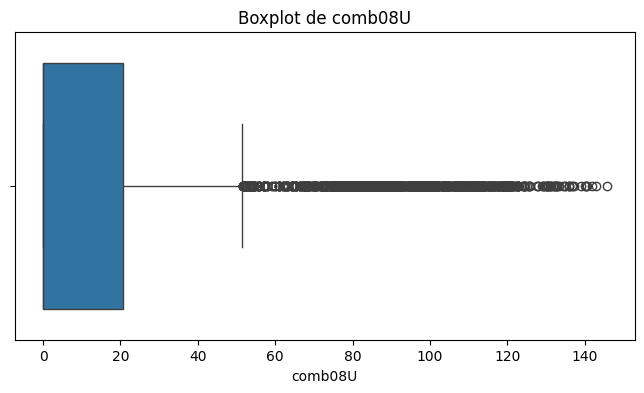

Nombre d'outliers dans 'comb08U' : 1183
Exemples d'outliers :
       comb08U
23796  112.200
24039   62.000
24455  101.822
24456   72.700
24457  104.758

🔍 Analyse de la colonne : combA08


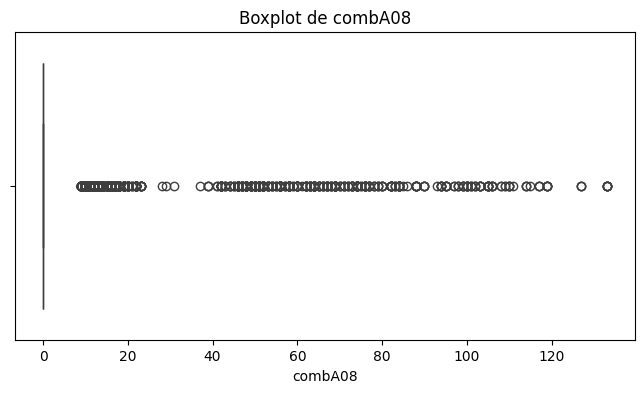

Nombre d'outliers dans 'combA08' : 1962
Exemples d'outliers :
      combA08
7116       20
7122       15
7124       14
7125       12
7126       13

🔍 Analyse de la colonne : combA08U


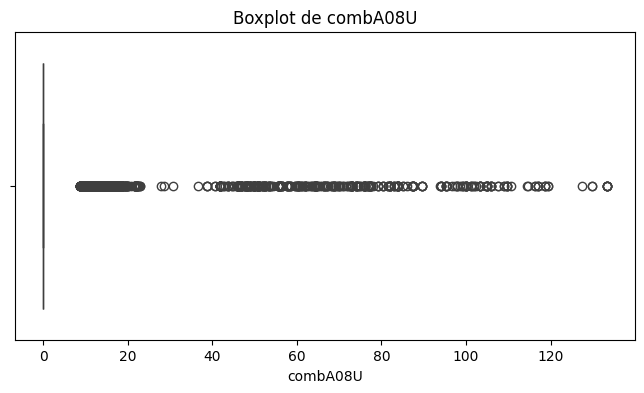

Nombre d'outliers dans 'combA08U' : 1402
Exemples d'outliers :
       combA08U
22122   12.6491
22123   11.7864
22124   13.0165
22127   12.6517
22128   11.7599

🔍 Analyse de la colonne : combE


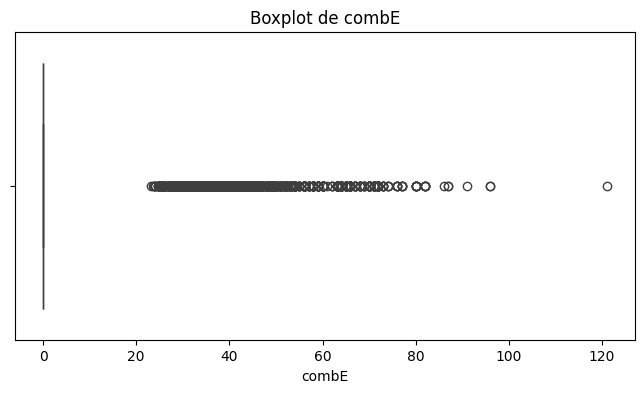

Nombre d'outliers dans 'combE' : 1550
Exemples d'outliers :
      combE
7138   40.0
7139   47.0
8143   47.0
8144   52.0
8146   87.0

🔍 Analyse de la colonne : combinedCD


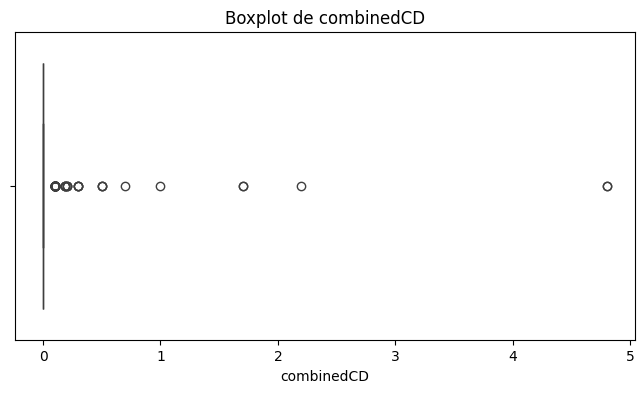

Nombre d'outliers dans 'combinedCD' : 75
Exemples d'outliers :
       combinedCD
24686      0.1907
25628      0.1907
26919      0.1907
27214      0.5000
27754      0.5000

🔍 Analyse de la colonne : combinedUF


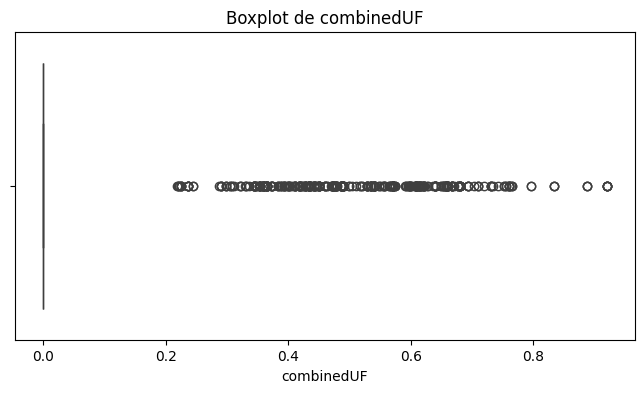

Nombre d'outliers dans 'combinedUF' : 404
Exemples d'outliers :
       combinedUF
23033       0.640
23735       0.640
24686       0.288
24722       0.620
24875       0.660

🔍 Analyse de la colonne : cylinders


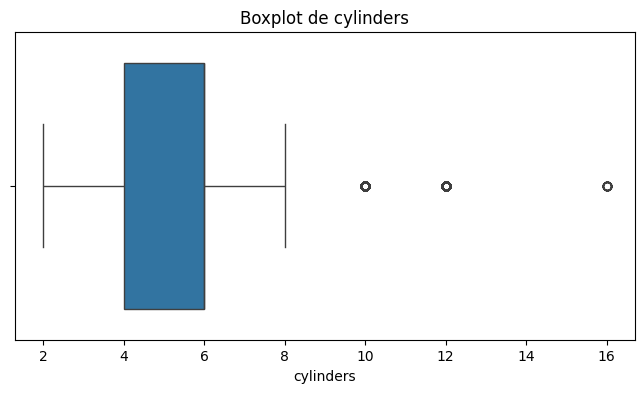

Nombre d'outliers dans 'cylinders' : 968
Exemples d'outliers :
     cylinders
1         12.0
22        12.0
699       10.0
703       12.0
718       12.0

🔍 Analyse de la colonne : displ


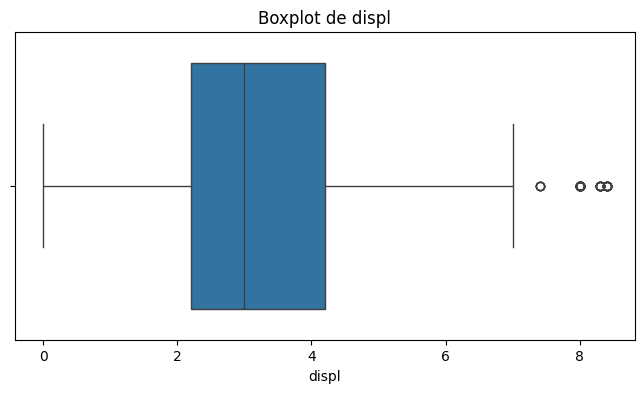

Nombre d'outliers dans 'displ' : 61
Exemples d'outliers :
      displ
275     7.4
699     8.0
1767    8.0
2799    8.0
4441    8.0

🔍 Analyse de la colonne : engId


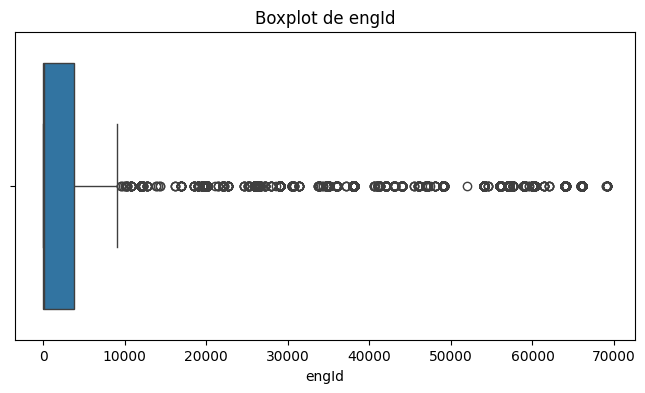

Nombre d'outliers dans 'engId' : 6700
Exemples d'outliers :
   engId
1  22020
4  66031
5  66020
6  66020
7  57005

🔍 Analyse de la colonne : feScore


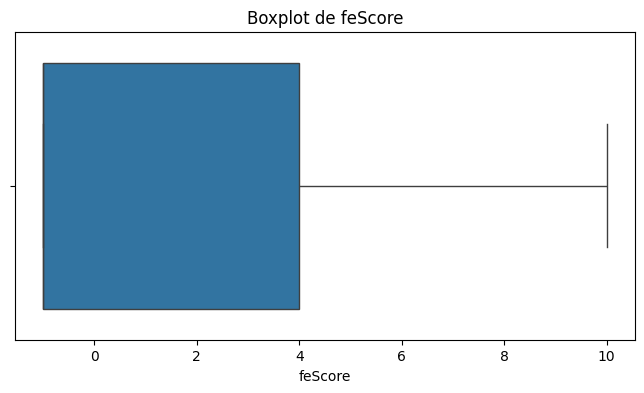

Nombre d'outliers dans 'feScore' : 0

🔍 Analyse de la colonne : fuelCost08


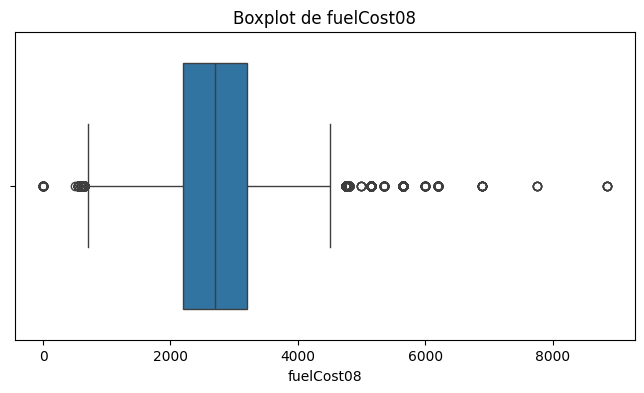

Nombre d'outliers dans 'fuelCost08' : 1266
Exemples d'outliers :
    fuelCost08
47        4800
58        4800
69        4800
80        4800
99        5650

🔍 Analyse de la colonne : fuelCostA08


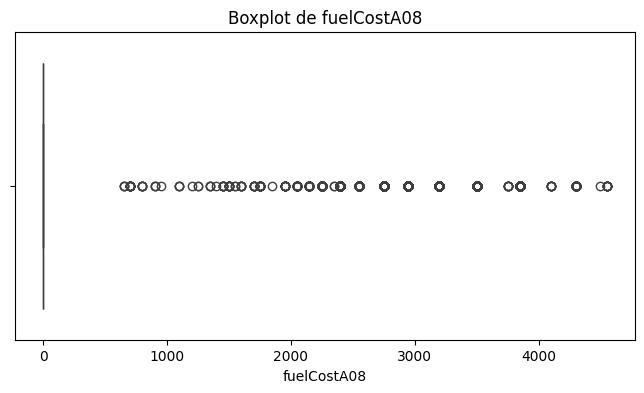

Nombre d'outliers dans 'fuelCostA08' : 1617
Exemples d'outliers :
      fuelCostA08
7116         2250
7122         2550
7124         2750
7125         3200
7126         2950

🔍 Analyse de la colonne : ghgScore


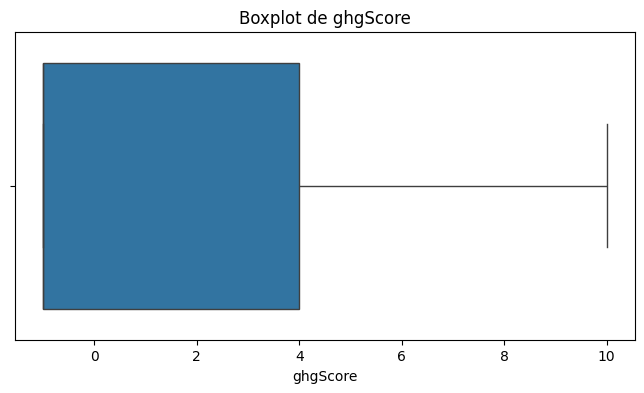

Nombre d'outliers dans 'ghgScore' : 0

🔍 Analyse de la colonne : ghgScoreA


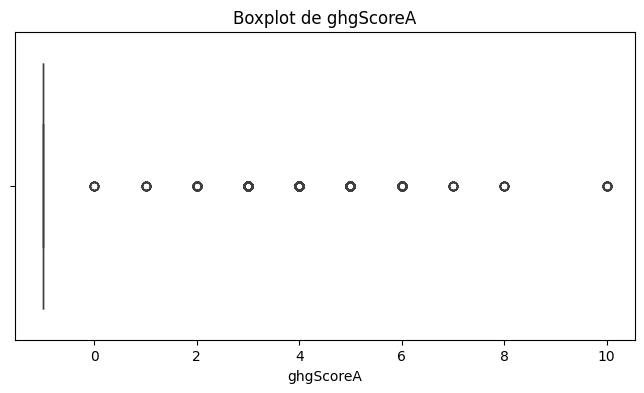

Nombre d'outliers dans 'ghgScoreA' : 755
Exemples d'outliers :
       ghgScoreA
24409          5
24418          4
24436          5
24440          5
24549          2

🔍 Analyse de la colonne : highway08


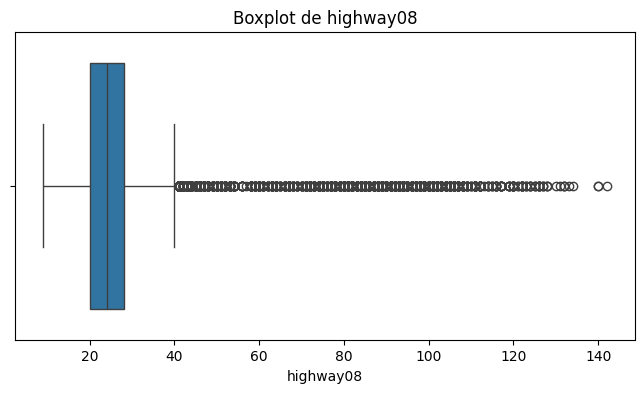

Nombre d'outliers dans 'highway08' : 1735
Exemples d'outliers :
     highway08
776         45
823         44
825         52
827         41
828         41

🔍 Analyse de la colonne : highway08U


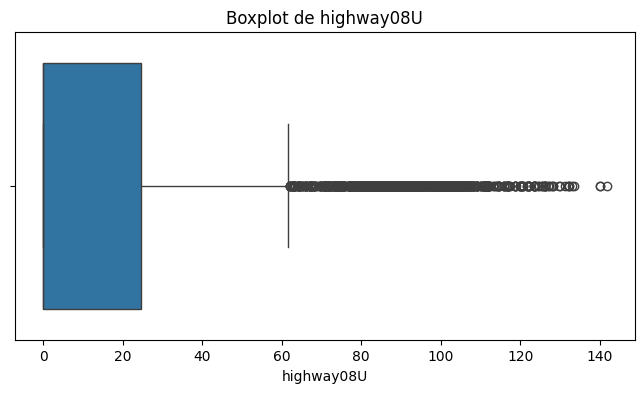

Nombre d'outliers dans 'highway08U' : 1056
Exemples d'outliers :
       highway08U
23796     98.7000
24039     62.0000
24455     96.4011
24456     67.9000
24457     98.9461

🔍 Analyse de la colonne : highwayA08


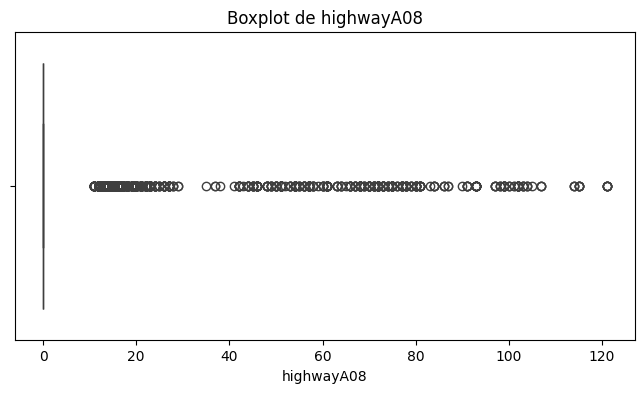

Nombre d'outliers dans 'highwayA08' : 1962
Exemples d'outliers :
      highwayA08
7116          25
7122          19
7124          18
7125          15
7126          16

🔍 Analyse de la colonne : highwayA08U


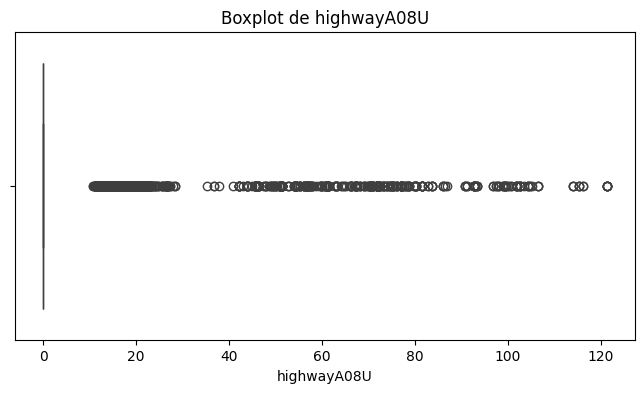

Nombre d'outliers dans 'highwayA08U' : 1402
Exemples d'outliers :
       highwayA08U
22122      15.8500
22123      14.0302
22124      16.1695
22127      15.8596
22128      14.0141

🔍 Analyse de la colonne : highwayCD


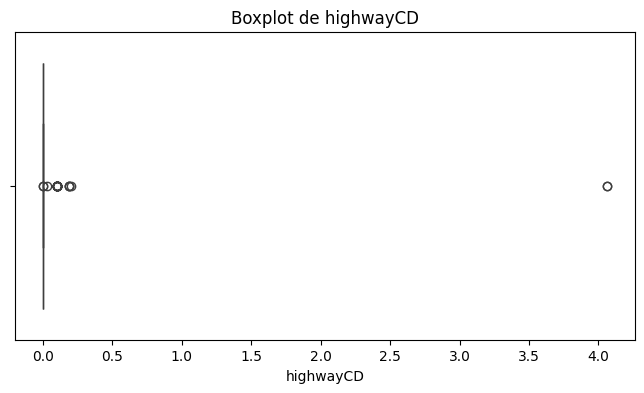

Nombre d'outliers dans 'highwayCD' : 30
Exemples d'outliers :
       highwayCD
27214     0.0300
27754     0.0003
28109     0.1865
28112     4.0600
28169     4.0600

🔍 Analyse de la colonne : highwayE


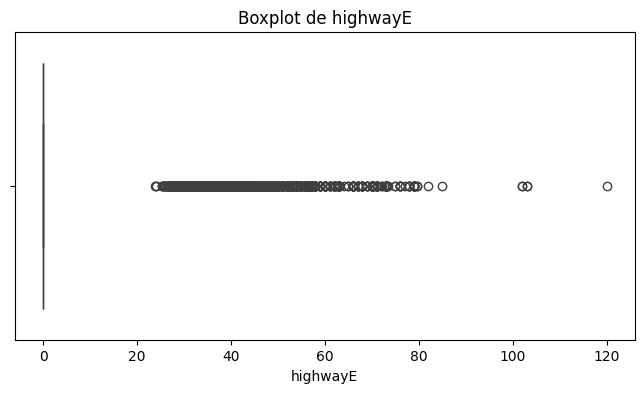

Nombre d'outliers dans 'highwayE' : 1550
Exemples d'outliers :
      highwayE
7138      37.0
7139      53.0
8143      53.0
8144      59.0
8146     102.0

🔍 Analyse de la colonne : highwayUF


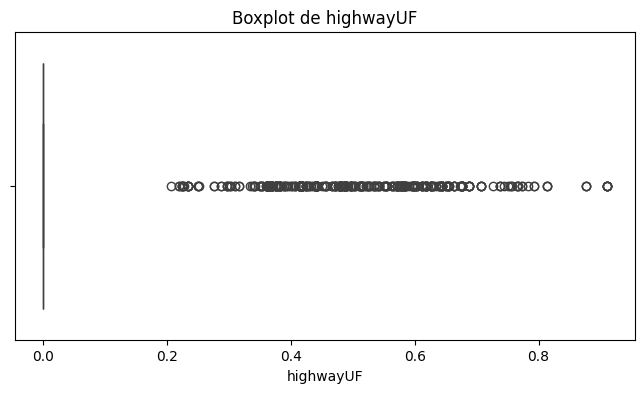

Nombre d'outliers dans 'highwayUF' : 404
Exemples d'outliers :
       highwayUF
23033      0.630
23735      0.630
24686      0.251
24722      0.620
24875      0.650

🔍 Analyse de la colonne : hlv


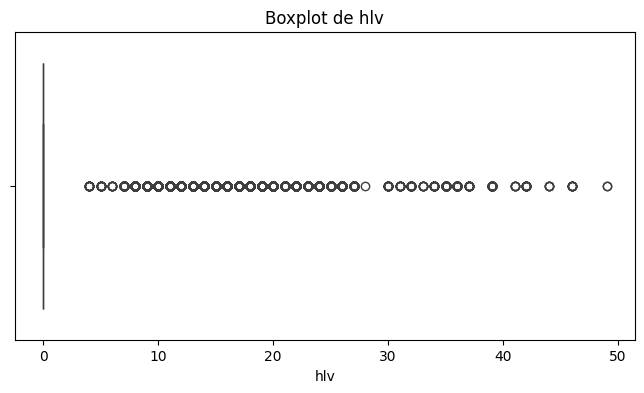

Nombre d'outliers dans 'hlv' : 5430
Exemples d'outliers :
    hlv
2    19
11   17
12   17
42   16
43   16

🔍 Analyse de la colonne : hpv


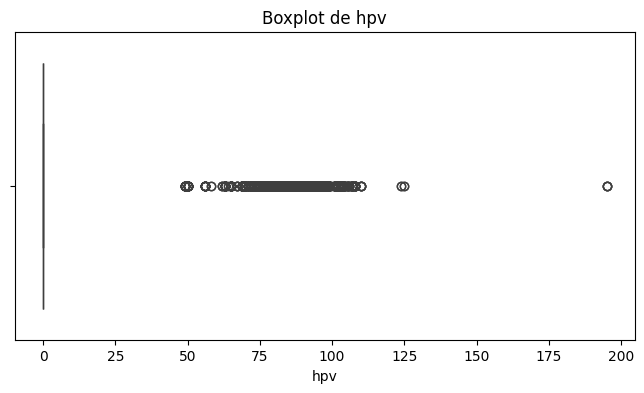

Nombre d'outliers dans 'hpv' : 5429
Exemples d'outliers :
    hpv
2    77
11   88
12   88
42   97
43   97

🔍 Analyse de la colonne : id


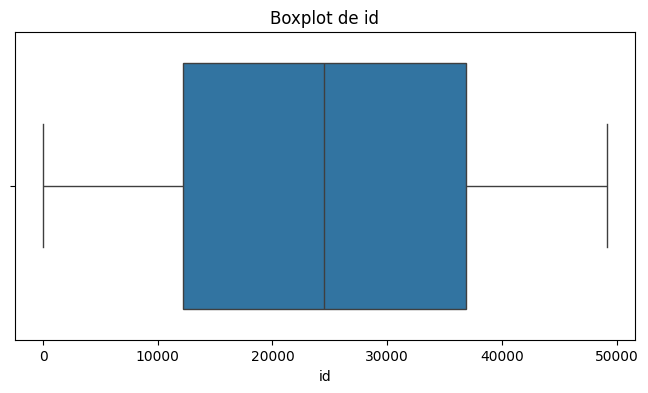

Nombre d'outliers dans 'id' : 0

🔍 Analyse de la colonne : lv2


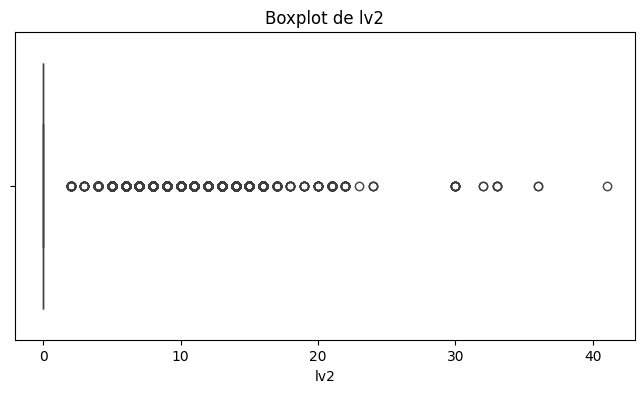

Nombre d'outliers dans 'lv2' : 7556
Exemples d'outliers :
    lv2
23   16
24   16
26   16
27   16
28   16

🔍 Analyse de la colonne : lv4


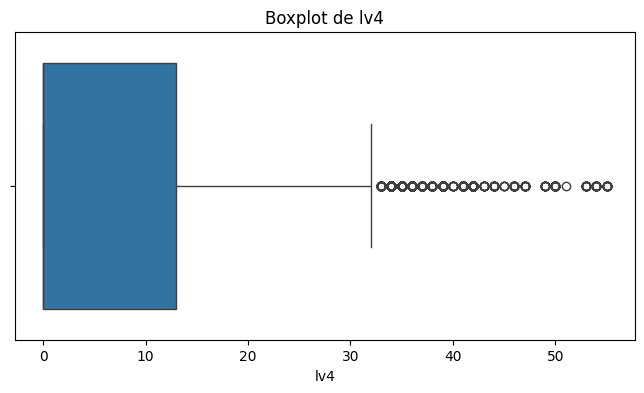

Nombre d'outliers dans 'lv4' : 1425
Exemples d'outliers :
     lv4
156   34
159   34
160   34
164   34
165   34

🔍 Analyse de la colonne : pv2


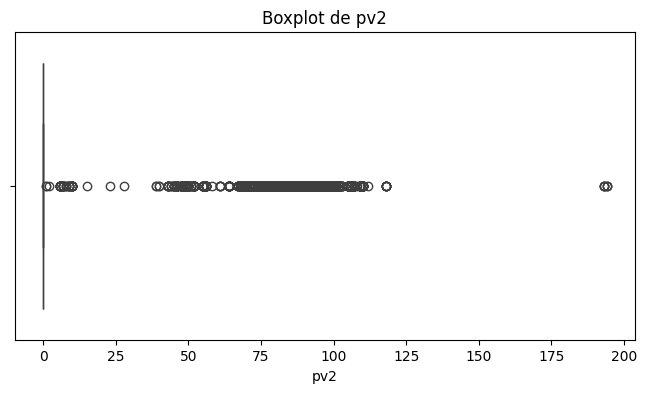

Nombre d'outliers dans 'pv2' : 7557
Exemples d'outliers :
    pv2
23   98
24   98
26   98
27   95
28   95

🔍 Analyse de la colonne : pv4


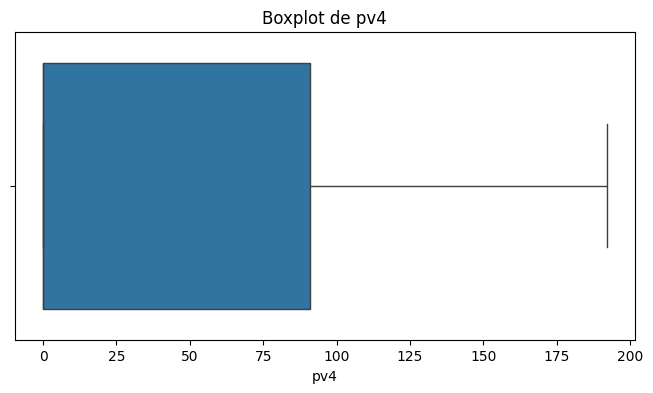

Nombre d'outliers dans 'pv4' : 0

🔍 Analyse de la colonne : range


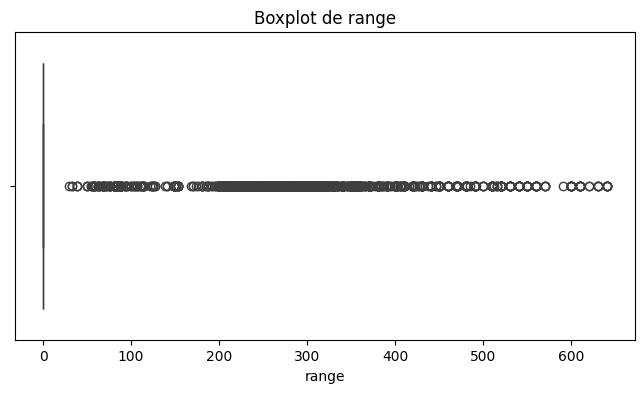

Nombre d'outliers dans 'range' : 1550
Exemples d'outliers :
      range
7138     90
7139     88
8143     88
8144     29
8146     38

🔍 Analyse de la colonne : rangeCity


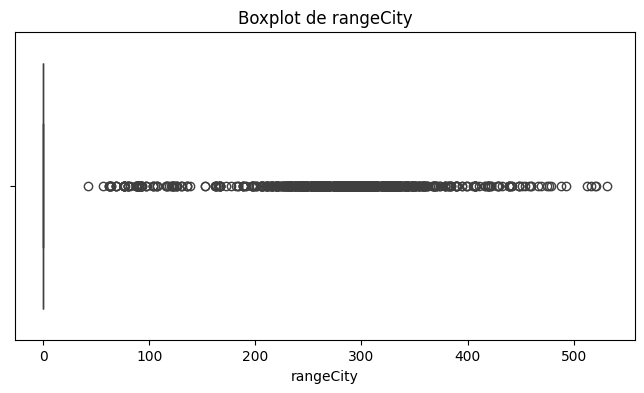

Nombre d'outliers dans 'rangeCity' : 921
Exemples d'outliers :
       rangeCity
23796    68.5545
24039    56.7812
24324    77.1650
24456    93.5550
24457    79.7573

🔍 Analyse de la colonne : rangeCityA


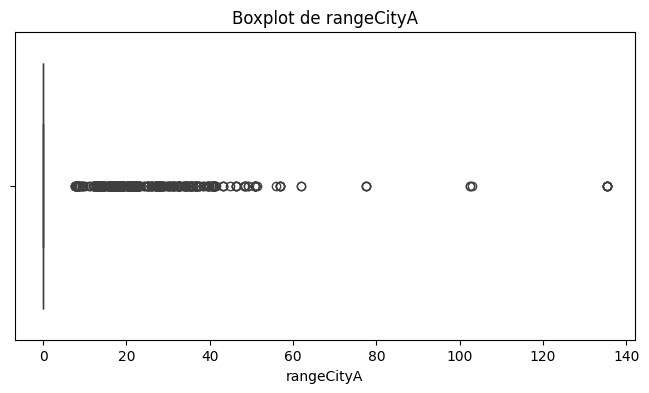

Nombre d'outliers dans 'rangeCityA' : 404
Exemples d'outliers :
       rangeCityA
23033     36.0000
23735     36.0000
24686     12.1500
24722     33.7533
24875     39.9196

🔍 Analyse de la colonne : rangeHwy


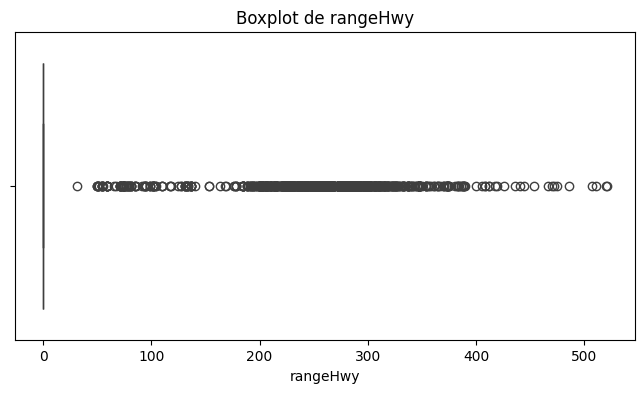

Nombre d'outliers dans 'rangeHwy' : 921
Exemples d'outliers :
       rangeHwy
23796   54.8184
24039   55.6759
24324   67.3160
24456   93.5550
24457   71.5259

🔍 Analyse de la colonne : rangeHwyA


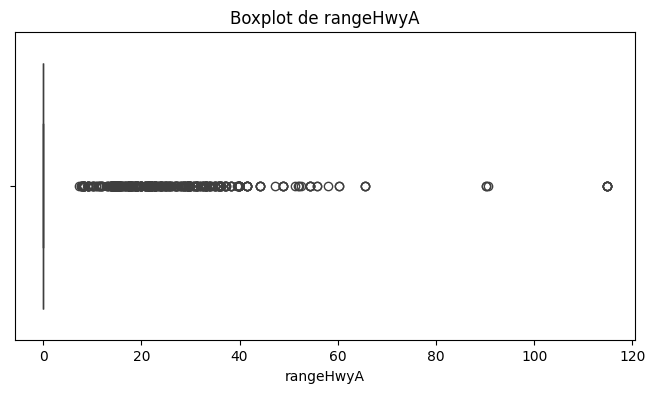

Nombre d'outliers dans 'rangeHwyA' : 404
Exemples d'outliers :
       rangeHwyA
23033     35.000
23735     35.000
24686      9.100
24722     32.886
24875     36.302

🔍 Analyse de la colonne : UCity


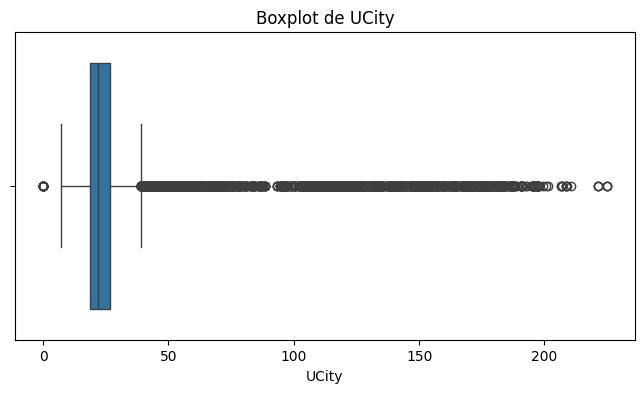

Nombre d'outliers dans 'UCity' : 2640
Exemples d'outliers :
     UCity
446   41.0
775   40.0
776   51.0
812   40.0
822   40.0

🔍 Analyse de la colonne : UCityA


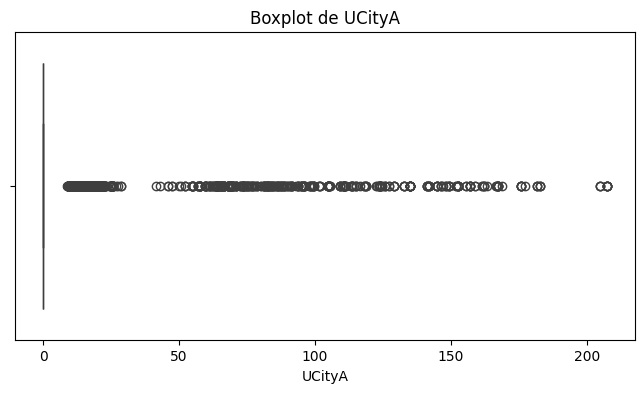

Nombre d'outliers dans 'UCityA' : 1916
Exemples d'outliers :
       UCityA
7116  22.5446
7122  15.6000
7124  15.1000
7125  13.3899
7126  14.5524

🔍 Analyse de la colonne : UHighway


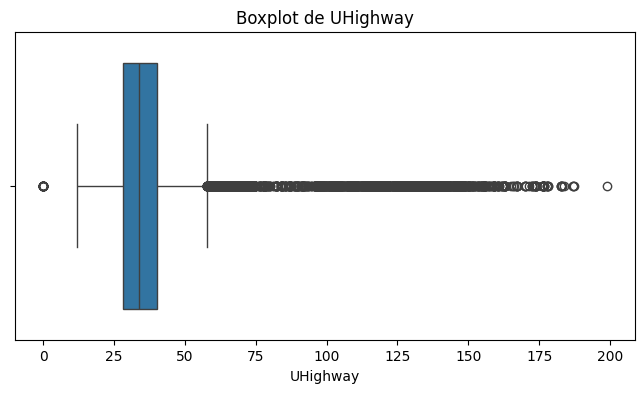

Nombre d'outliers dans 'UHighway' : 1994
Exemples d'outliers :
     UHighway
776   64.0000
823   63.0000
825   74.7877
827   59.0000
828   58.0000

🔍 Analyse de la colonne : UHighwayA


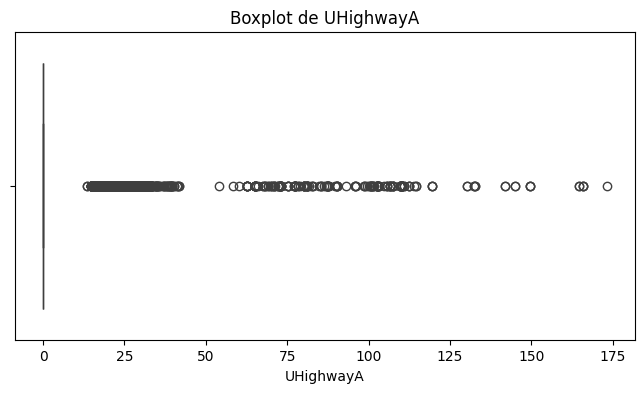

Nombre d'outliers dans 'UHighwayA' : 1700
Exemples d'outliers :
      UHighwayA
7116    34.6154
7122    26.9000
7124    25.4000
7125    20.3779
7126    21.6378

🔍 Analyse de la colonne : year


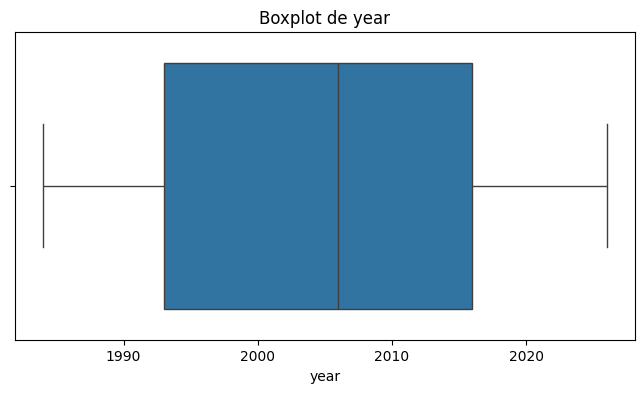

Nombre d'outliers dans 'year' : 0

🔍 Analyse de la colonne : youSaveSpend


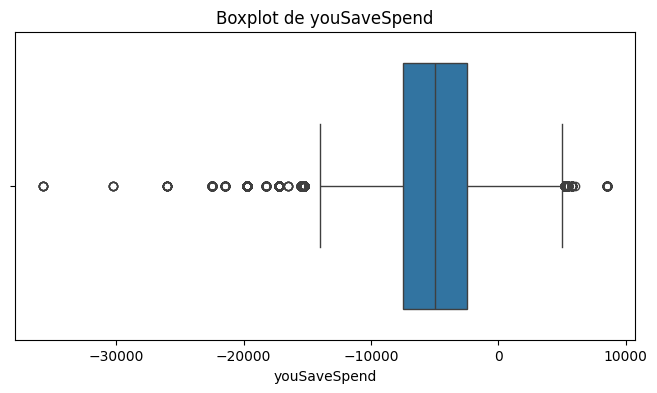

Nombre d'outliers dans 'youSaveSpend' : 1265
Exemples d'outliers :
    youSaveSpend
47        -15500
58        -15500
69        -15500
80        -15500
99        -19750

🔍 Analyse de la colonne : charge240b


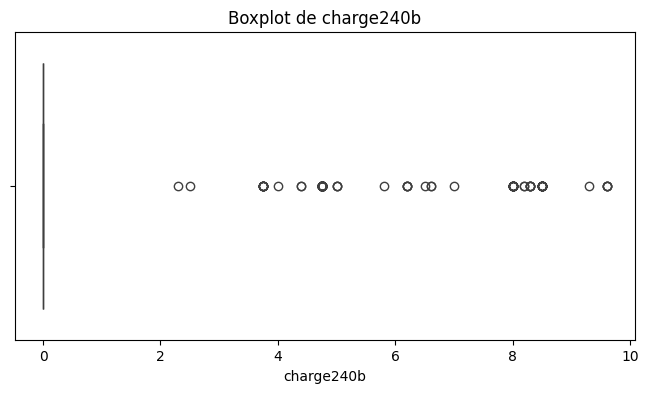

Nombre d'outliers dans 'charge240b' : 120
Exemples d'outliers :
       charge240b
25661        3.75
25662        4.75
25873        4.00
25933        2.50
27115        5.00

🔍 Analyse de la colonne : phevCity


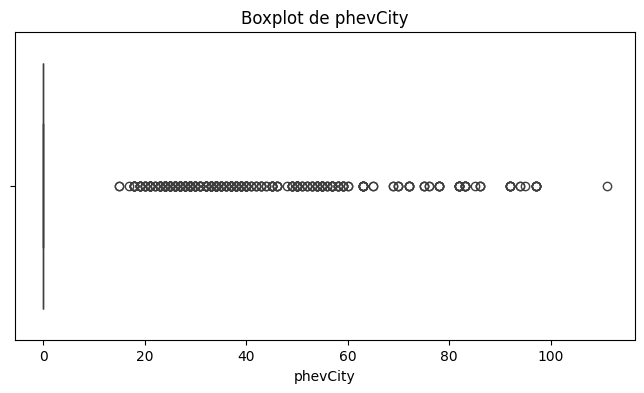

Nombre d'outliers dans 'phevCity' : 404
Exemples d'outliers :
       phevCity
23033        58
23735        58
24686        59
24722        33
24875        63

🔍 Analyse de la colonne : phevHwy


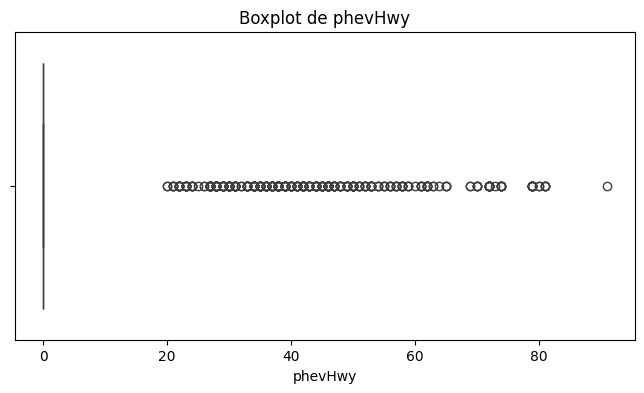

Nombre d'outliers dans 'phevHwy' : 404
Exemples d'outliers :
       phevHwy
23033       62
23735       62
24686       56
24722       34
24875       61

🔍 Analyse de la colonne : phevComb


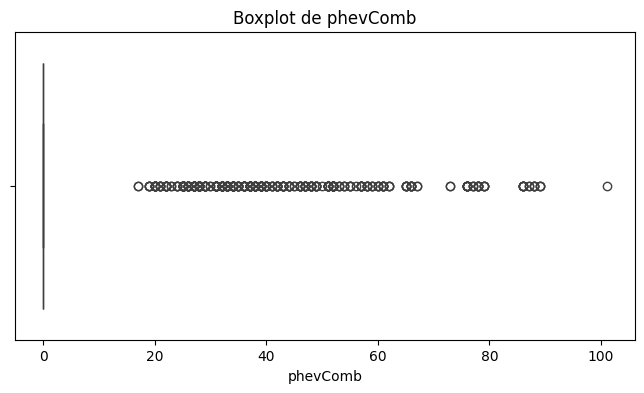

Nombre d'outliers dans 'phevComb' : 404
Exemples d'outliers :
       phevComb
23033        60
23735        60
24686        58
24722        33
24875        62


In [11]:

# Sélection des colonnes numériques
colonnes_numeriques = df.select_dtypes(include='number').columns

# Si tu veux conserver les valeurs originales pour comparaison
df_orig = df.copy()

# Dictionnaire pour stocker les bornes calculées par colonne (avant clipping)
bornes_orig = {}

for col in colonnes_numeriques:
    print(f"\n🔍 Analyse de la colonne : {col}")

    # Visualisation (boxplot) avant clipping
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

    # Calcul des quartiles et de l'IQR
    Q1 = df[col].quantile(0.25)  # Premier quartile
    Q3 = df[col].quantile(0.75)  # Troisième quartile
    IQR = Q3 - Q1                # Interquartile Range

    # Définition des bornes pour détecter les outliers (règle 1.5 * IQR)
    borne_basse = Q1 - 1.5 * IQR
    borne_haute = Q3 + 1.5 * IQR

    # Stockage des bornes pour cette colonne
    bornes_orig[col] = (borne_basse, borne_haute)

    # Détection des outliers (avant clipping)
    outliers = df[(df[col] < borne_basse) | (df[col] > borne_haute)]
    print(f"Nombre d'outliers dans '{col}' : {outliers.shape[0]}")

    if outliers.shape[0] > 0:
        print("Exemples d'outliers :")
        print(outliers[[col]].head())


**correction des outliers**

In [12]:
# 2ème cellule
for col in colonnes_numeriques:
    # récupérer les bornes calculées dans la 1ère cellule
    borne_basse, borne_haute = bornes_orig[col]

    # appliquer le clipping avec ces bornes
    df[col] = df[col].clip(lower=borne_basse, upper=borne_haute)



🔍 Analyse de la colonne : barrels08


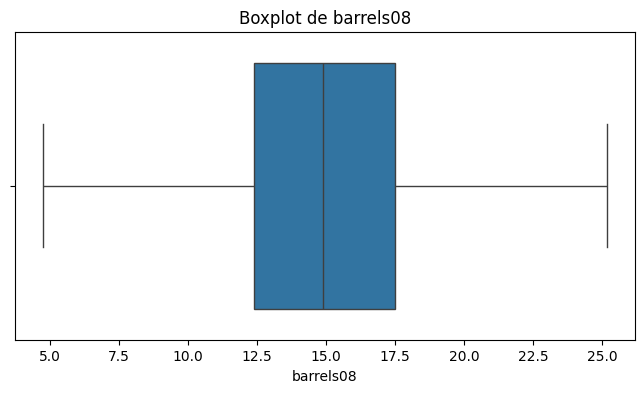

Nombre d'outliers dans 'barrels08' (après clipping) : 0

🔍 Analyse de la colonne : barrelsA08


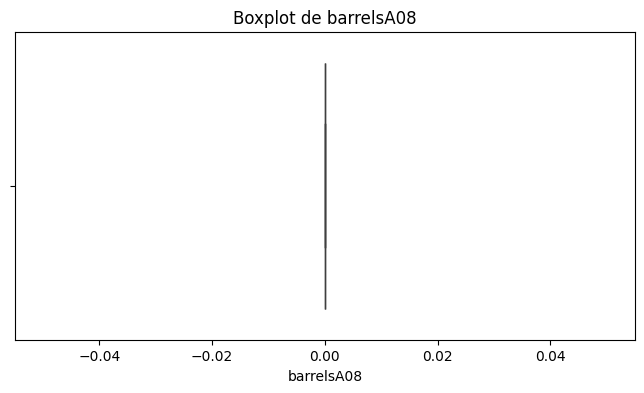

Nombre d'outliers dans 'barrelsA08' (après clipping) : 0

🔍 Analyse de la colonne : charge120


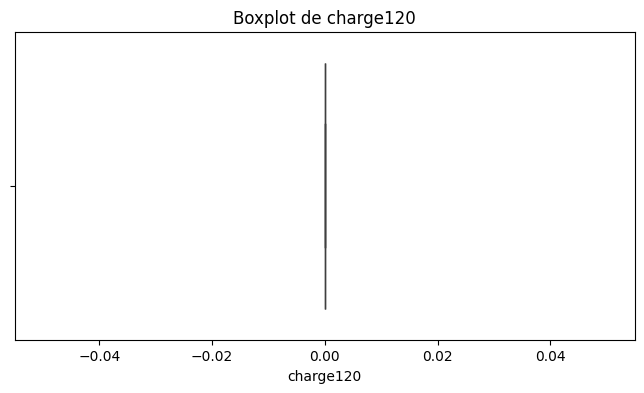

Nombre d'outliers dans 'charge120' (après clipping) : 0

🔍 Analyse de la colonne : charge240


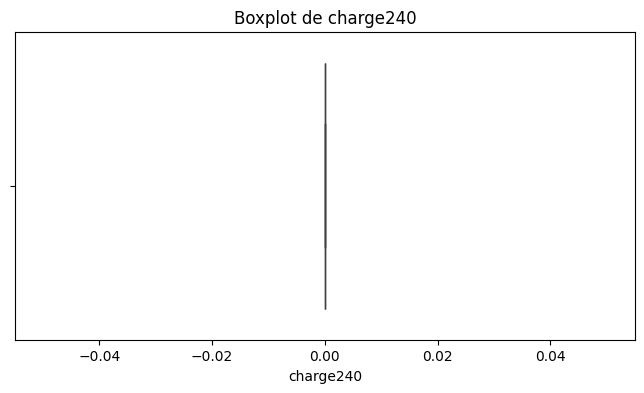

Nombre d'outliers dans 'charge240' (après clipping) : 0

🔍 Analyse de la colonne : city08


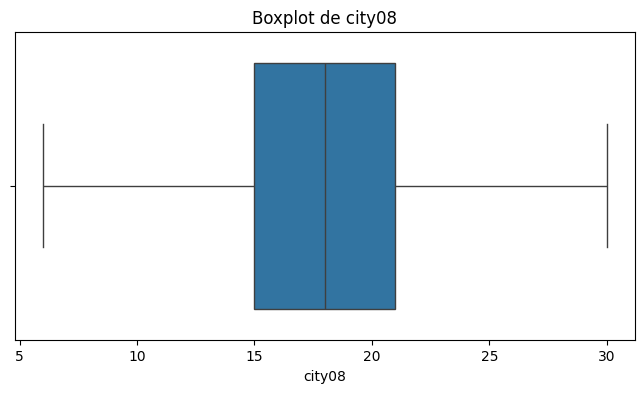

Nombre d'outliers dans 'city08' (après clipping) : 0

🔍 Analyse de la colonne : city08U


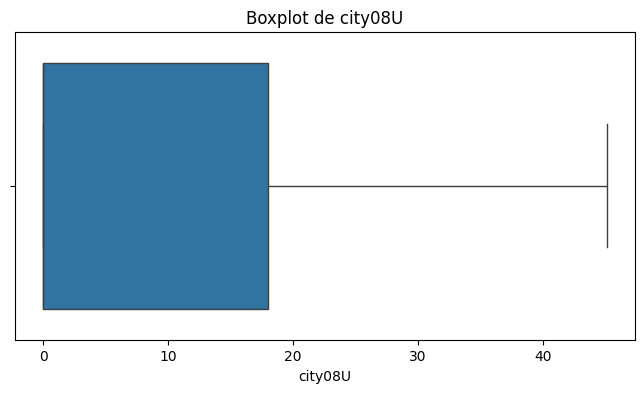

Nombre d'outliers dans 'city08U' (après clipping) : 0

🔍 Analyse de la colonne : cityA08


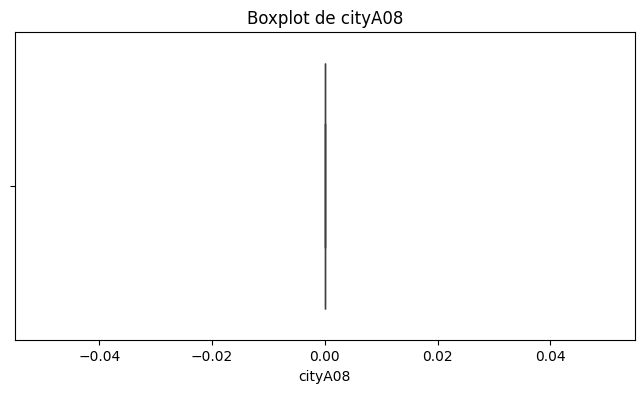

Nombre d'outliers dans 'cityA08' (après clipping) : 0

🔍 Analyse de la colonne : cityA08U


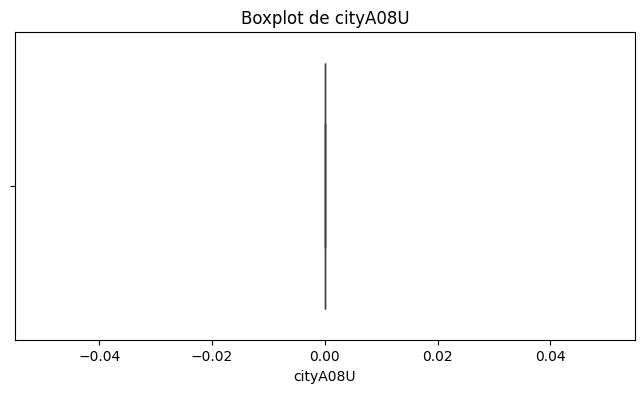

Nombre d'outliers dans 'cityA08U' (après clipping) : 0

🔍 Analyse de la colonne : cityCD


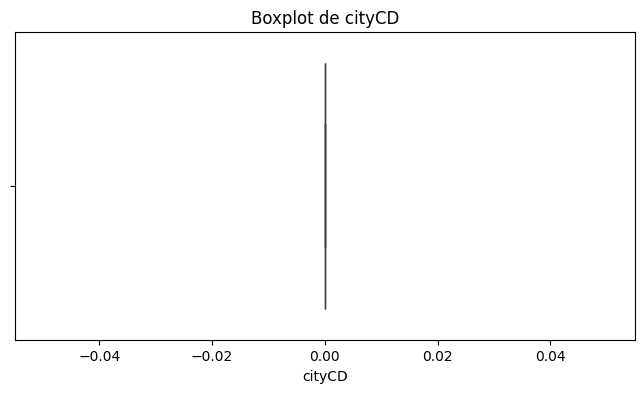

Nombre d'outliers dans 'cityCD' (après clipping) : 0

🔍 Analyse de la colonne : cityE


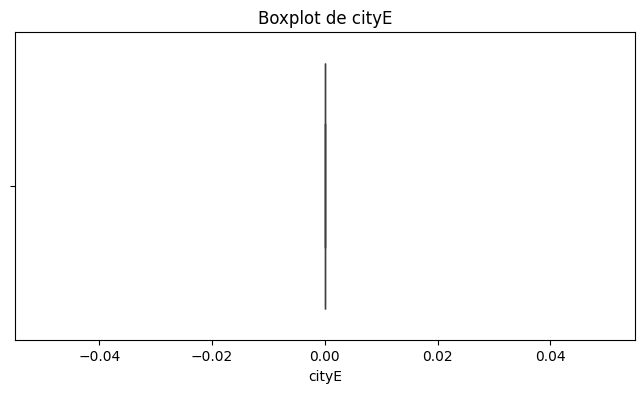

Nombre d'outliers dans 'cityE' (après clipping) : 0

🔍 Analyse de la colonne : cityUF


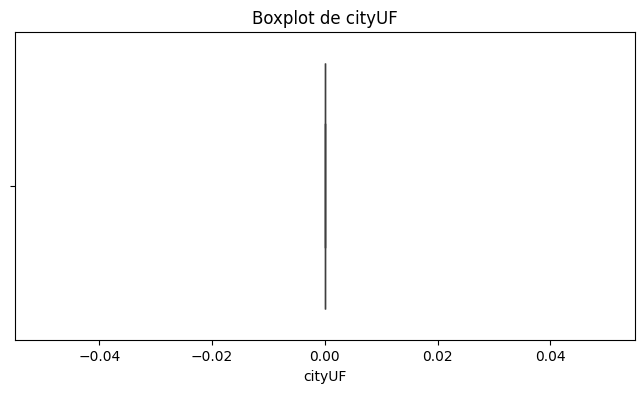

Nombre d'outliers dans 'cityUF' (après clipping) : 0

🔍 Analyse de la colonne : co2


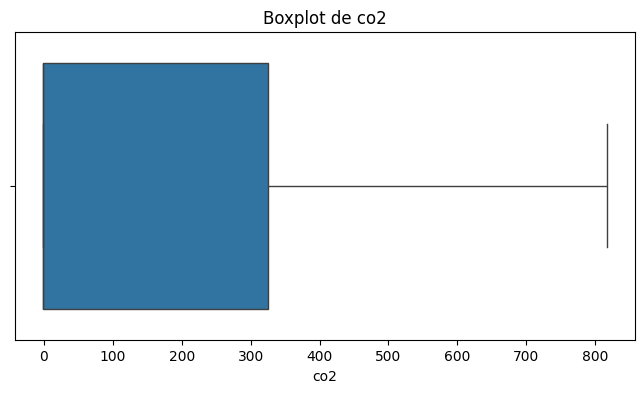

Nombre d'outliers dans 'co2' (après clipping) : 0

🔍 Analyse de la colonne : co2A


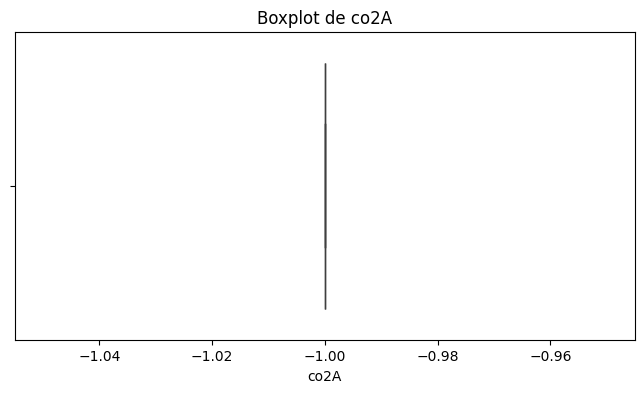

Nombre d'outliers dans 'co2A' (après clipping) : 0

🔍 Analyse de la colonne : co2TailpipeAGpm


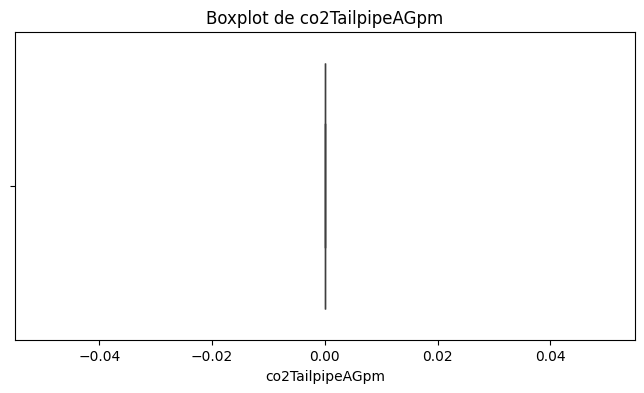

Nombre d'outliers dans 'co2TailpipeAGpm' (après clipping) : 0

🔍 Analyse de la colonne : co2TailpipeGpm


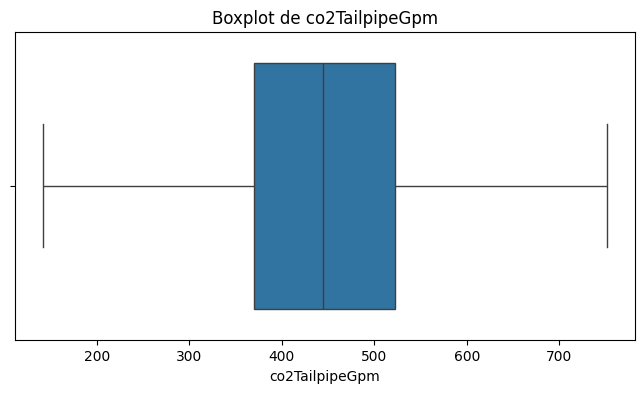

Nombre d'outliers dans 'co2TailpipeGpm' (après clipping) : 0

🔍 Analyse de la colonne : comb08


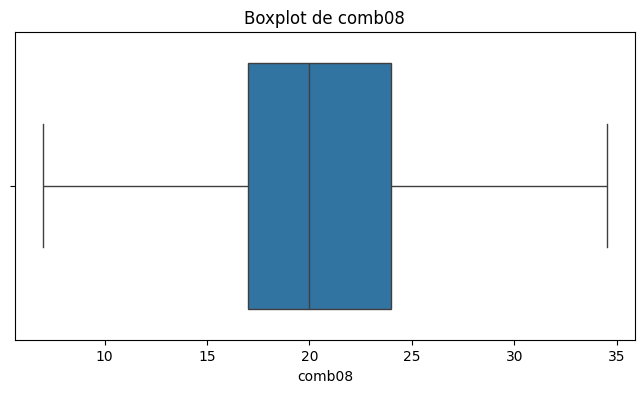

Nombre d'outliers dans 'comb08' (après clipping) : 0

🔍 Analyse de la colonne : comb08U


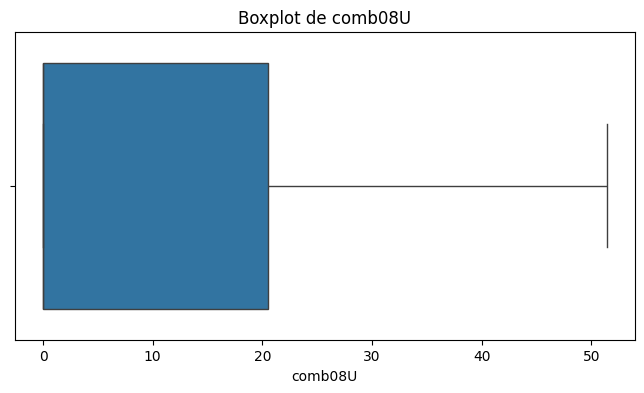

Nombre d'outliers dans 'comb08U' (après clipping) : 0

🔍 Analyse de la colonne : combA08


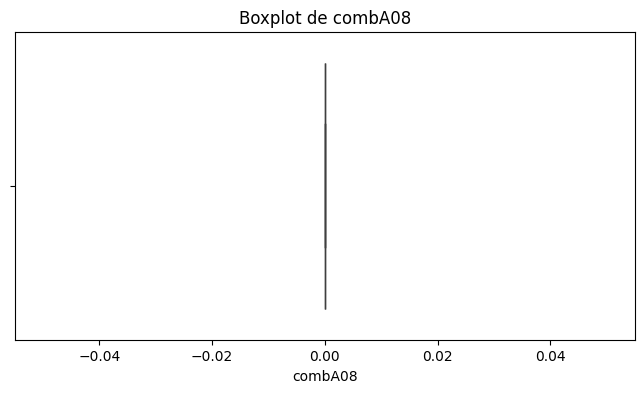

Nombre d'outliers dans 'combA08' (après clipping) : 0

🔍 Analyse de la colonne : combA08U


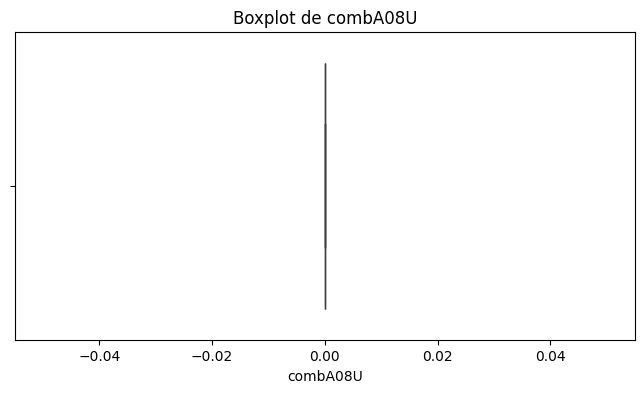

Nombre d'outliers dans 'combA08U' (après clipping) : 0

🔍 Analyse de la colonne : combE


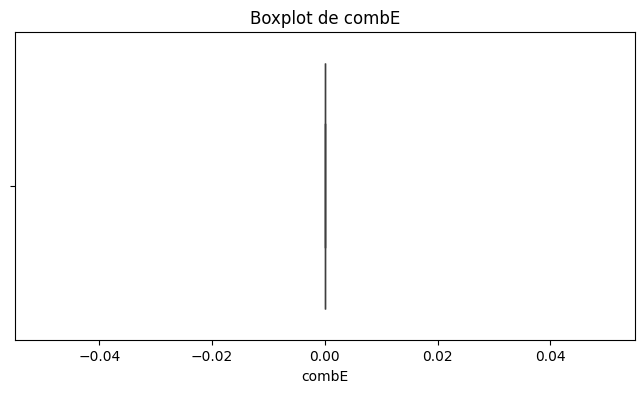

Nombre d'outliers dans 'combE' (après clipping) : 0

🔍 Analyse de la colonne : combinedCD


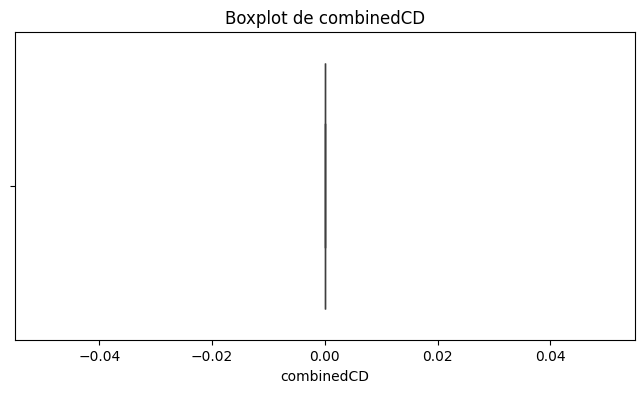

Nombre d'outliers dans 'combinedCD' (après clipping) : 0

🔍 Analyse de la colonne : combinedUF


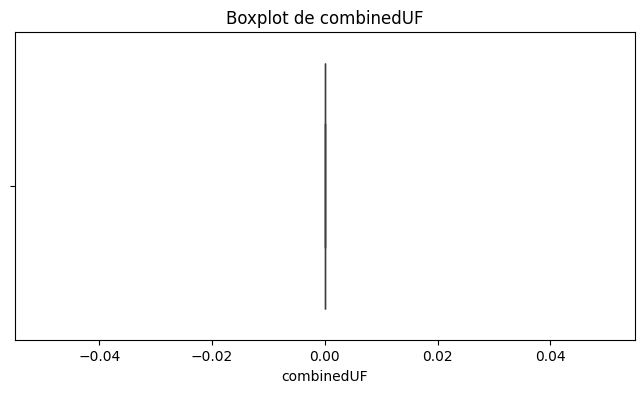

Nombre d'outliers dans 'combinedUF' (après clipping) : 0

🔍 Analyse de la colonne : cylinders


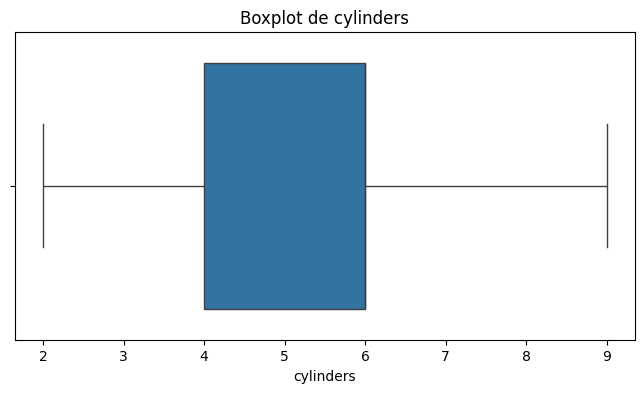

Nombre d'outliers dans 'cylinders' (après clipping) : 0

🔍 Analyse de la colonne : displ


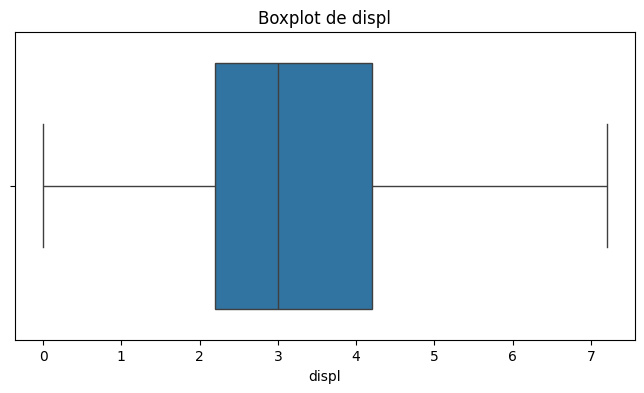

Nombre d'outliers dans 'displ' (après clipping) : 0

🔍 Analyse de la colonne : engId


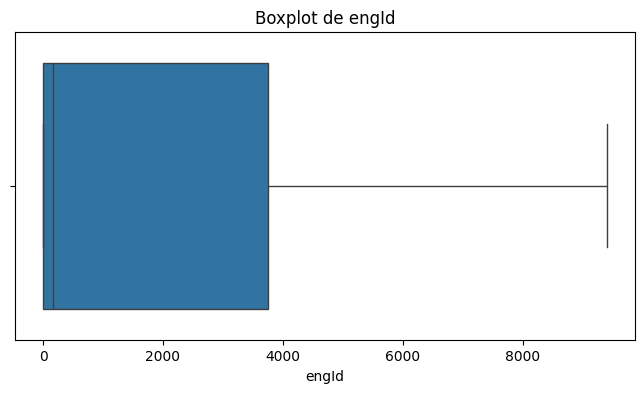

Nombre d'outliers dans 'engId' (après clipping) : 0

🔍 Analyse de la colonne : feScore


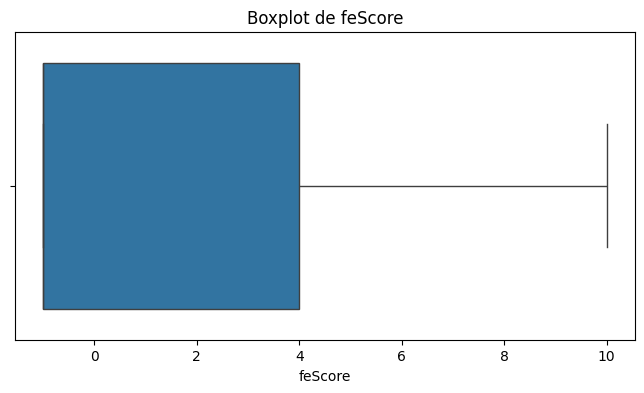

Nombre d'outliers dans 'feScore' (après clipping) : 0

🔍 Analyse de la colonne : fuelCost08


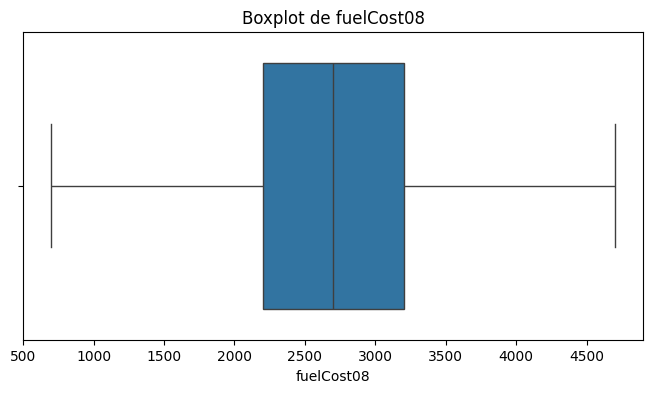

Nombre d'outliers dans 'fuelCost08' (après clipping) : 0

🔍 Analyse de la colonne : fuelCostA08


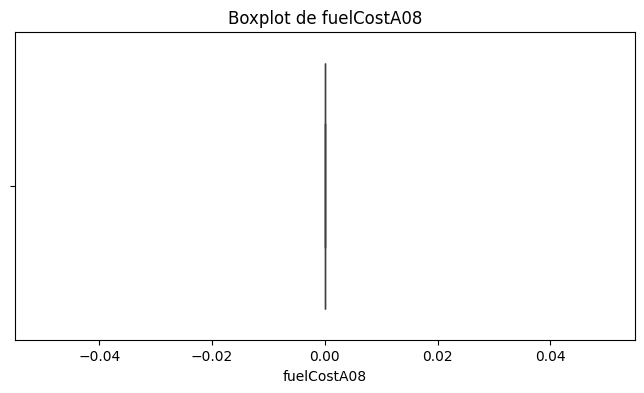

Nombre d'outliers dans 'fuelCostA08' (après clipping) : 0

🔍 Analyse de la colonne : ghgScore


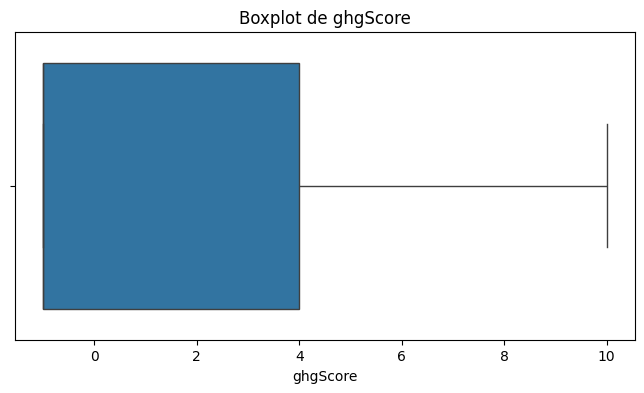

Nombre d'outliers dans 'ghgScore' (après clipping) : 0

🔍 Analyse de la colonne : ghgScoreA


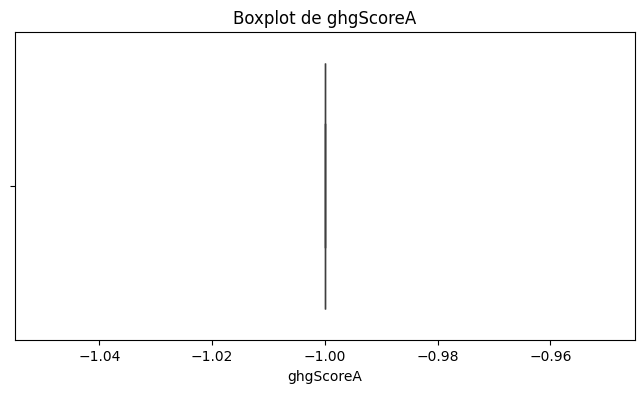

Nombre d'outliers dans 'ghgScoreA' (après clipping) : 0

🔍 Analyse de la colonne : highway08


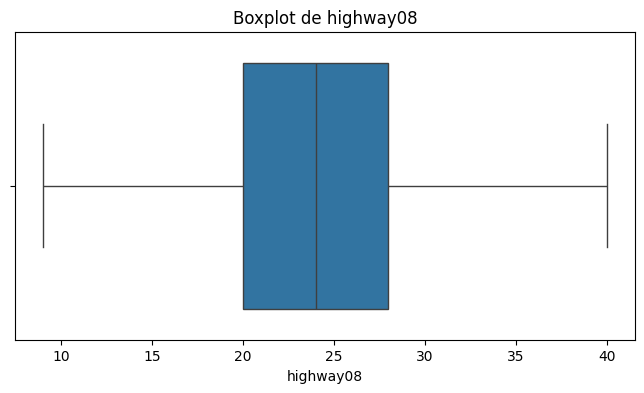

Nombre d'outliers dans 'highway08' (après clipping) : 0

🔍 Analyse de la colonne : highway08U


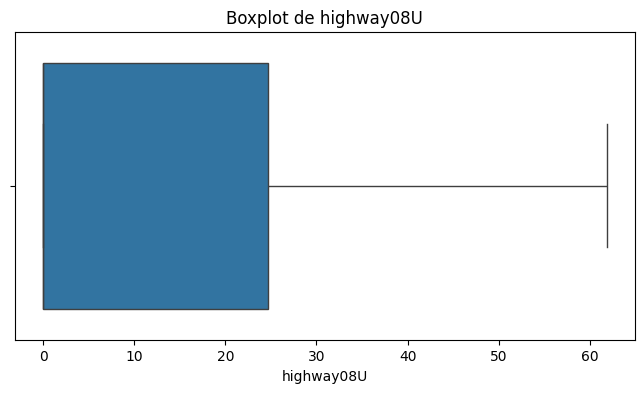

Nombre d'outliers dans 'highway08U' (après clipping) : 0

🔍 Analyse de la colonne : highwayA08


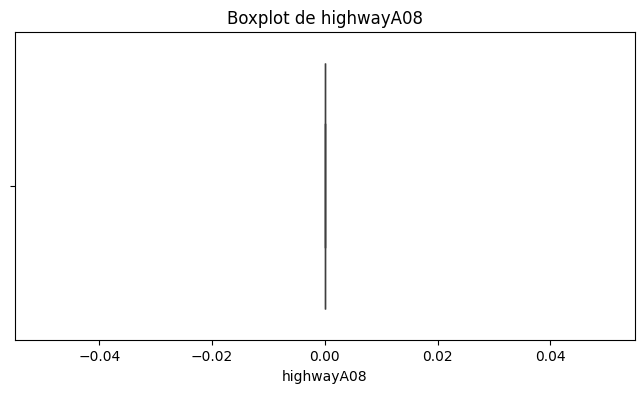

Nombre d'outliers dans 'highwayA08' (après clipping) : 0

🔍 Analyse de la colonne : highwayA08U


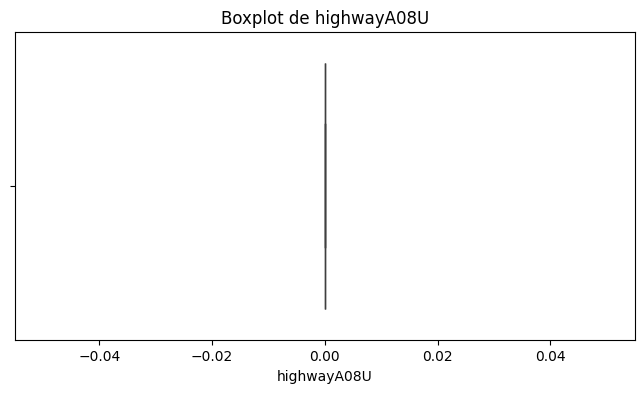

Nombre d'outliers dans 'highwayA08U' (après clipping) : 0

🔍 Analyse de la colonne : highwayCD


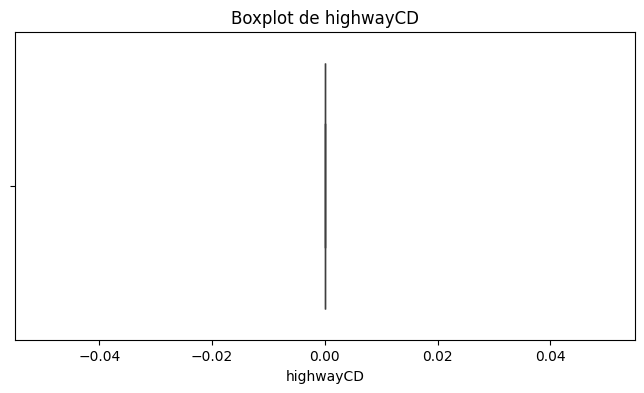

Nombre d'outliers dans 'highwayCD' (après clipping) : 0

🔍 Analyse de la colonne : highwayE


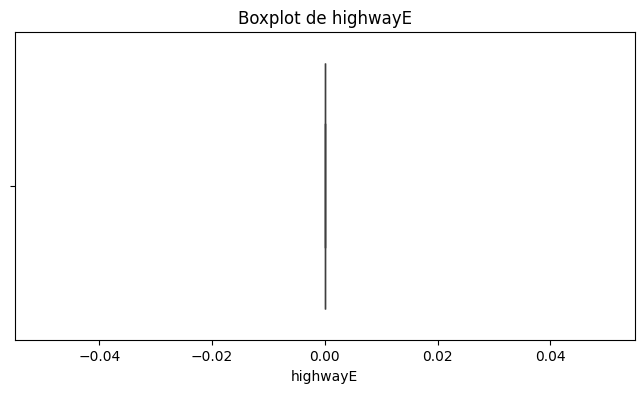

Nombre d'outliers dans 'highwayE' (après clipping) : 0

🔍 Analyse de la colonne : highwayUF


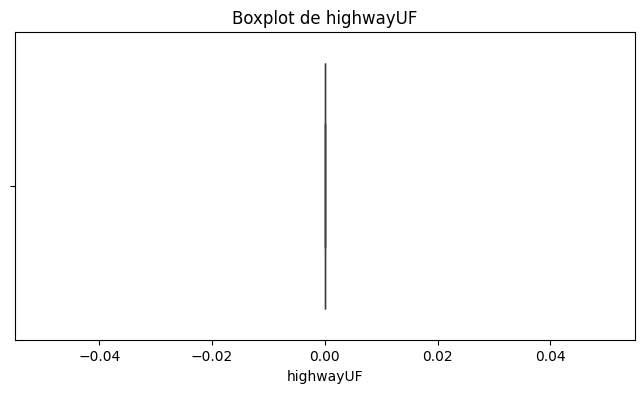

Nombre d'outliers dans 'highwayUF' (après clipping) : 0

🔍 Analyse de la colonne : hlv


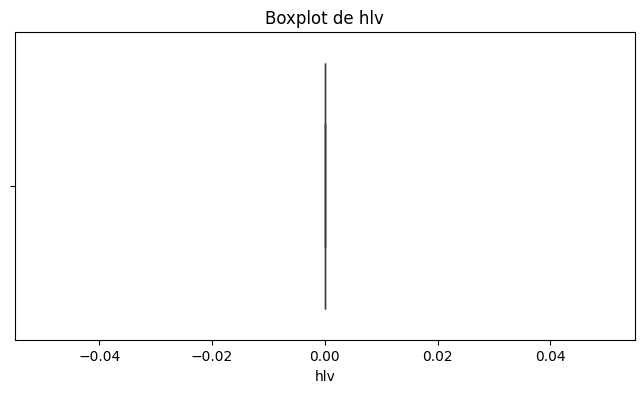

Nombre d'outliers dans 'hlv' (après clipping) : 0

🔍 Analyse de la colonne : hpv


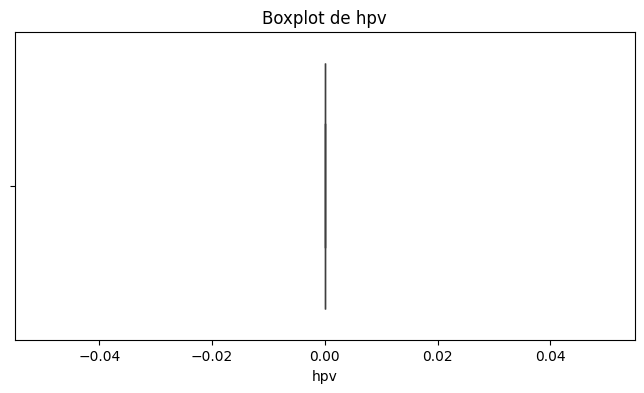

Nombre d'outliers dans 'hpv' (après clipping) : 0

🔍 Analyse de la colonne : id


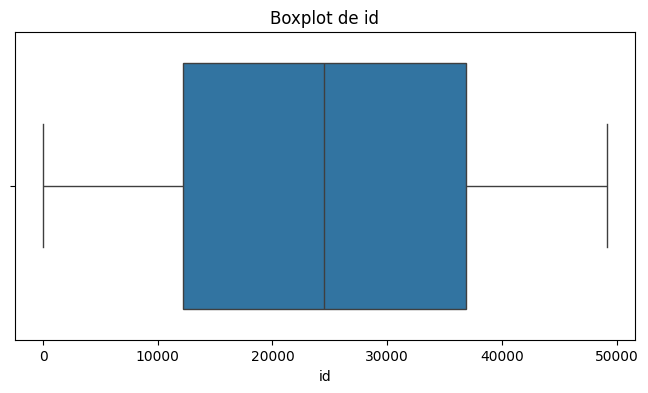

Nombre d'outliers dans 'id' (après clipping) : 0

🔍 Analyse de la colonne : lv2


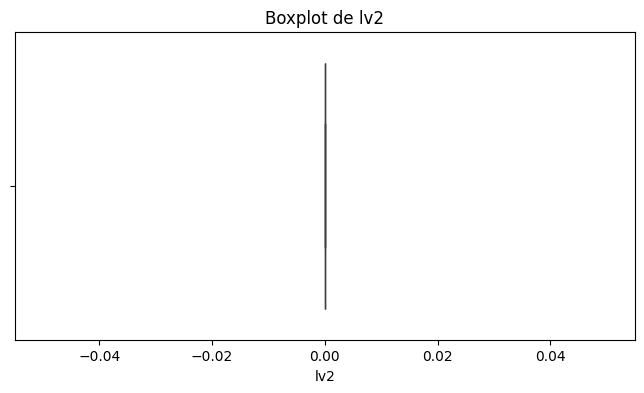

Nombre d'outliers dans 'lv2' (après clipping) : 0

🔍 Analyse de la colonne : lv4


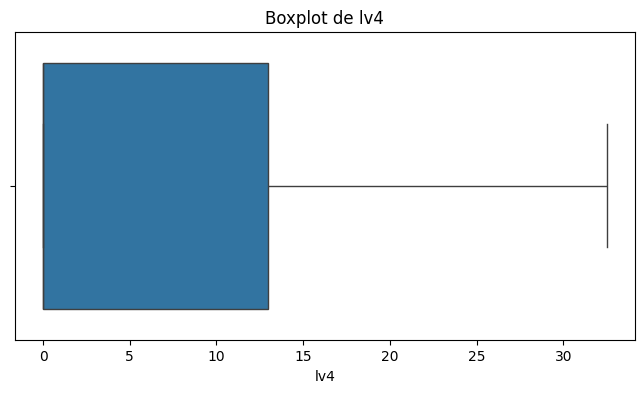

Nombre d'outliers dans 'lv4' (après clipping) : 0

🔍 Analyse de la colonne : pv2


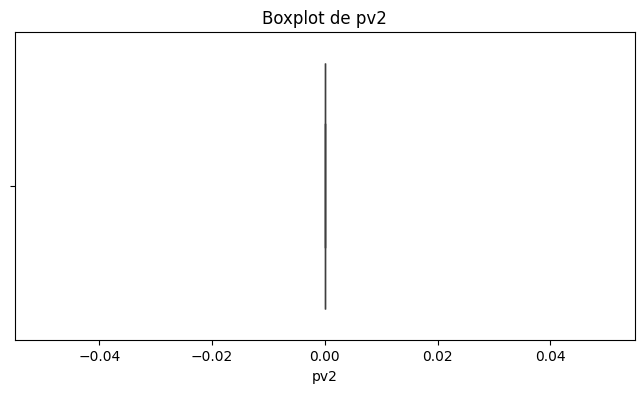

Nombre d'outliers dans 'pv2' (après clipping) : 0

🔍 Analyse de la colonne : pv4


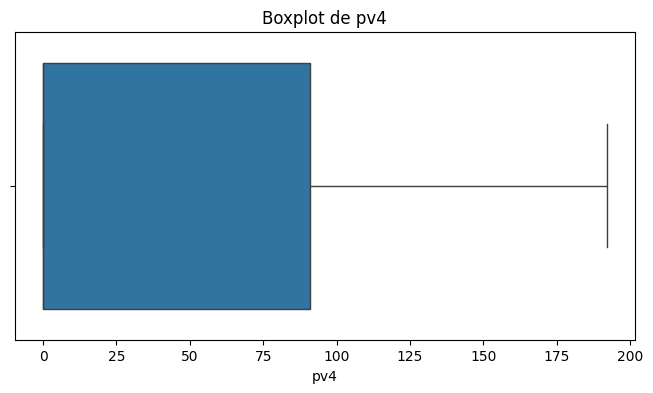

Nombre d'outliers dans 'pv4' (après clipping) : 0

🔍 Analyse de la colonne : range


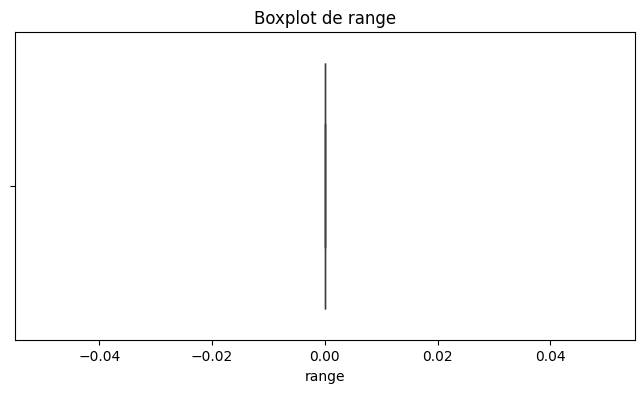

Nombre d'outliers dans 'range' (après clipping) : 0

🔍 Analyse de la colonne : rangeCity


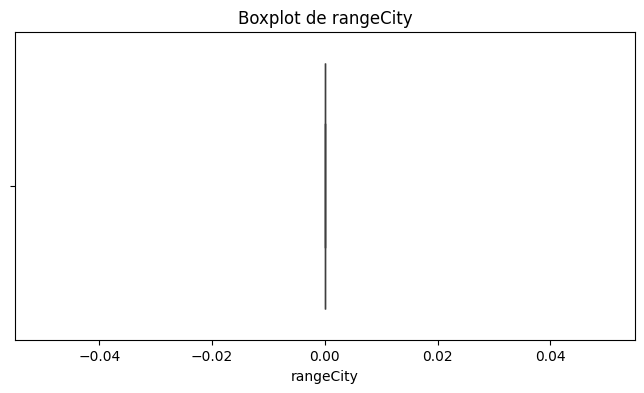

Nombre d'outliers dans 'rangeCity' (après clipping) : 0

🔍 Analyse de la colonne : rangeCityA


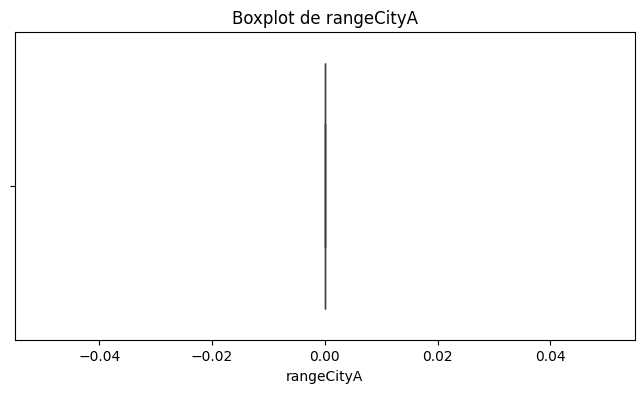

Nombre d'outliers dans 'rangeCityA' (après clipping) : 0

🔍 Analyse de la colonne : rangeHwy


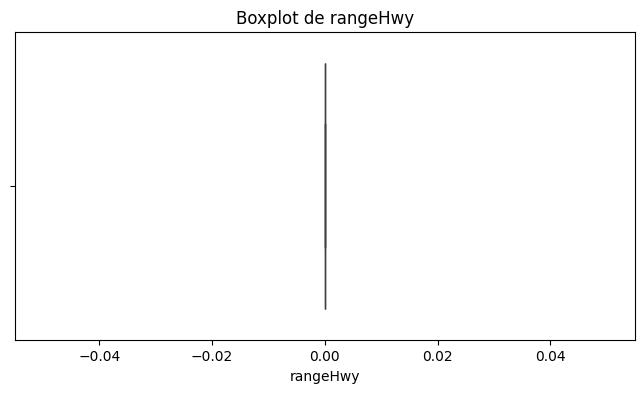

Nombre d'outliers dans 'rangeHwy' (après clipping) : 0

🔍 Analyse de la colonne : rangeHwyA


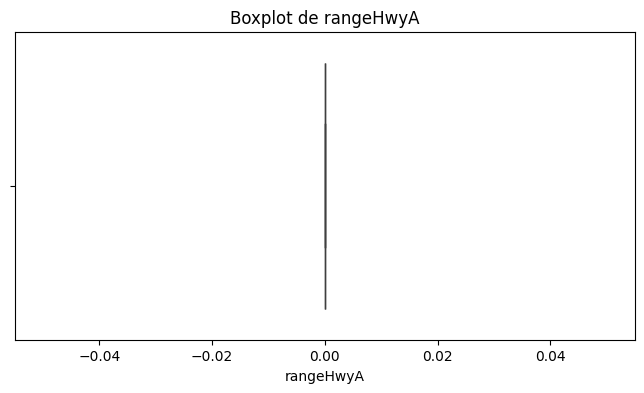

Nombre d'outliers dans 'rangeHwyA' (après clipping) : 0

🔍 Analyse de la colonne : UCity


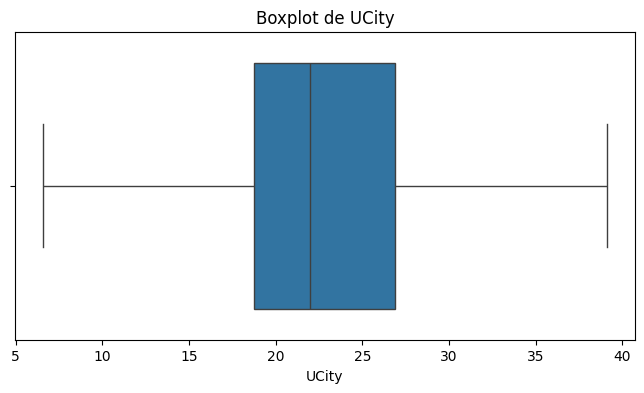

Nombre d'outliers dans 'UCity' (après clipping) : 0

🔍 Analyse de la colonne : UCityA


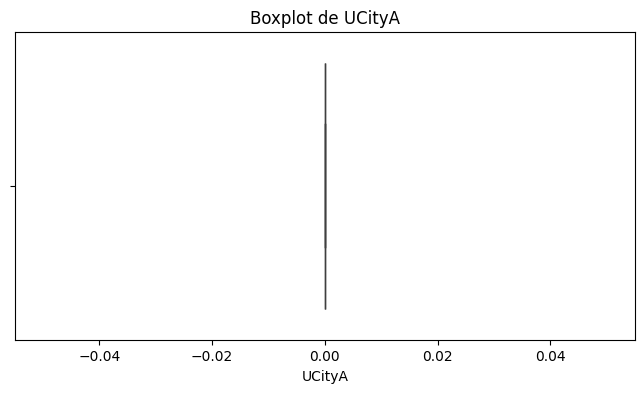

Nombre d'outliers dans 'UCityA' (après clipping) : 0

🔍 Analyse de la colonne : UHighway


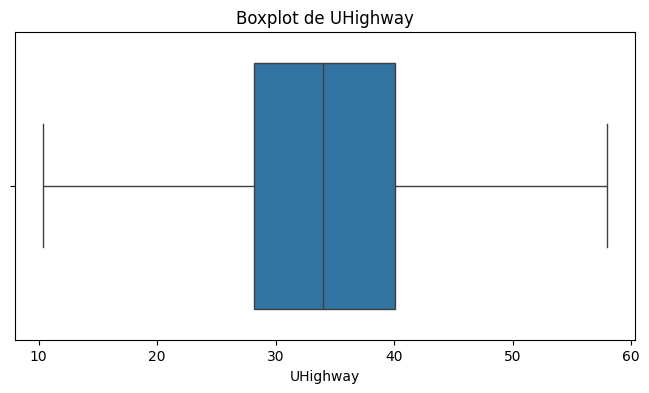

Nombre d'outliers dans 'UHighway' (après clipping) : 0

🔍 Analyse de la colonne : UHighwayA


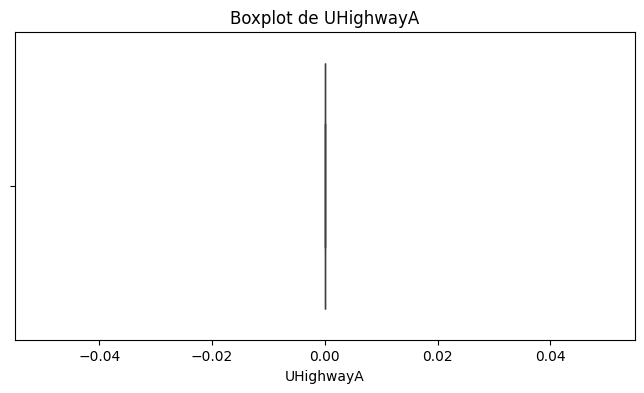

Nombre d'outliers dans 'UHighwayA' (après clipping) : 0

🔍 Analyse de la colonne : year


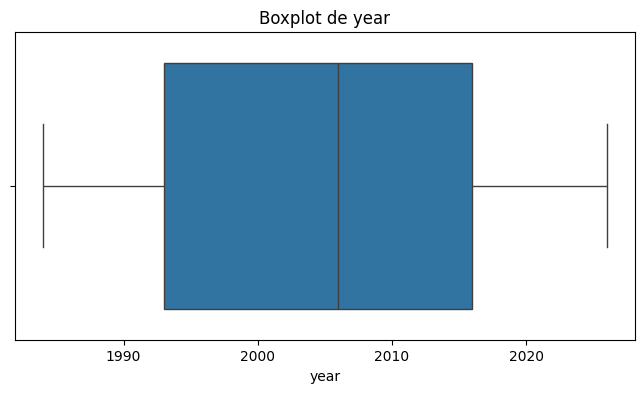

Nombre d'outliers dans 'year' (après clipping) : 0

🔍 Analyse de la colonne : youSaveSpend


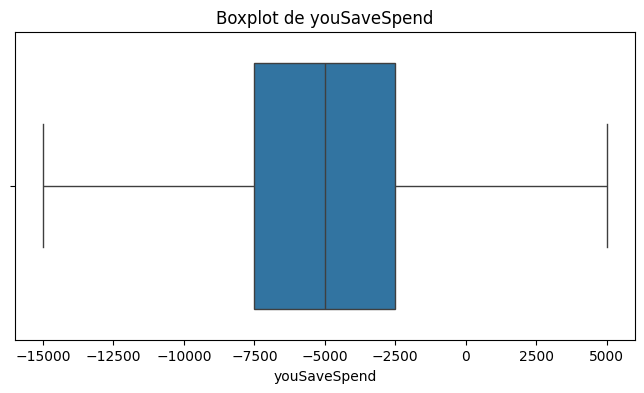

Nombre d'outliers dans 'youSaveSpend' (après clipping) : 0

🔍 Analyse de la colonne : charge240b


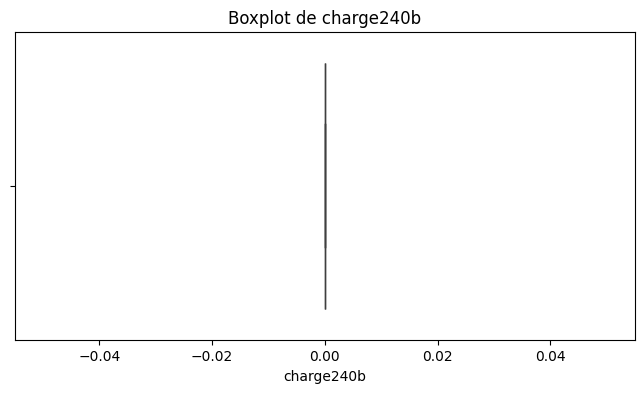

Nombre d'outliers dans 'charge240b' (après clipping) : 0

🔍 Analyse de la colonne : phevCity


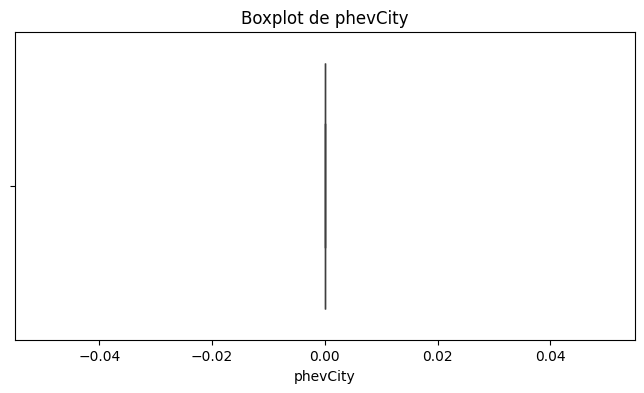

Nombre d'outliers dans 'phevCity' (après clipping) : 0

🔍 Analyse de la colonne : phevHwy


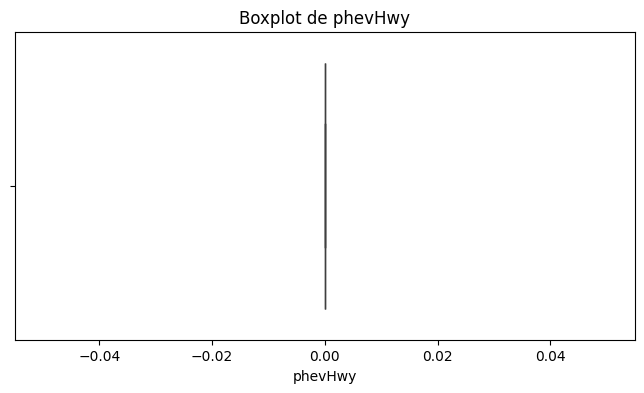

Nombre d'outliers dans 'phevHwy' (après clipping) : 0

🔍 Analyse de la colonne : phevComb


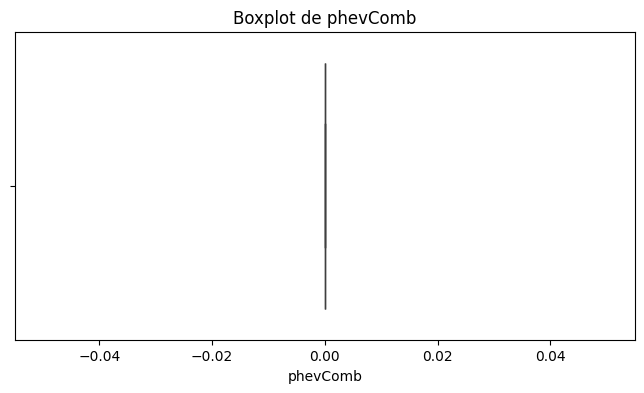

Nombre d'outliers dans 'phevComb' (après clipping) : 0


In [13]:
# 3ème cellule
for col in colonnes_numeriques:
    print(f"\n🔍 Analyse de la colonne : {col}")

    # Visualisation (boxplot) après clipping
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

    # Recalcul des bornes sur les données clipées (pour vérifier s'il reste des outliers)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    borne_basse = Q1 - 1.5 * IQR
    borne_haute = Q3 + 1.5 * IQR

    # Détection des outliers (après clipping, selon bornes recalculées)
    outliers = df[(df[col] < borne_basse) | (df[col] > borne_haute)]
    print(f"Nombre d'outliers dans '{col}' (après clipping) : {outliers.shape[0]}")

    if outliers.shape[0] > 0:
        print("Exemples d'outliers :")
        print(outliers[[col]].head())



**Séparation des features**

In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
target = 'comb08'
num_cols.remove(target)


**imputation**

In [15]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
df[cat_cols] = df[cat_cols].fillna('missing')
#one hot encoder
df_encoded = pd.get_dummies(
    df,
    columns=cat_cols,
    prefix=cat_cols,
    drop_first=False,
    dummy_na=False
)


# **Analyse univariée**

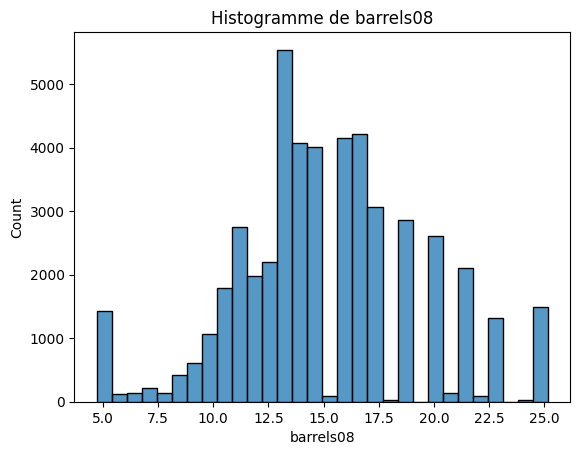

→ barrels08 : moyenne=15.10, médiane=14.88, std=4.16


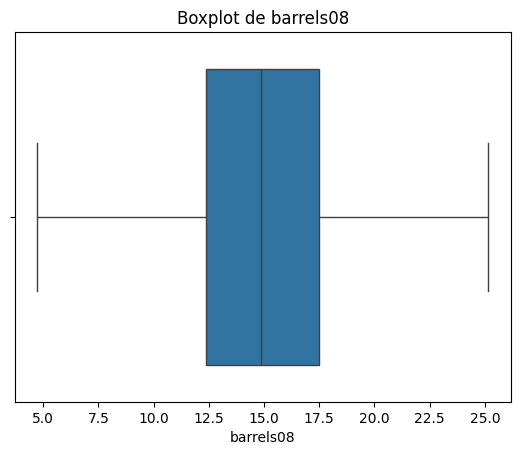

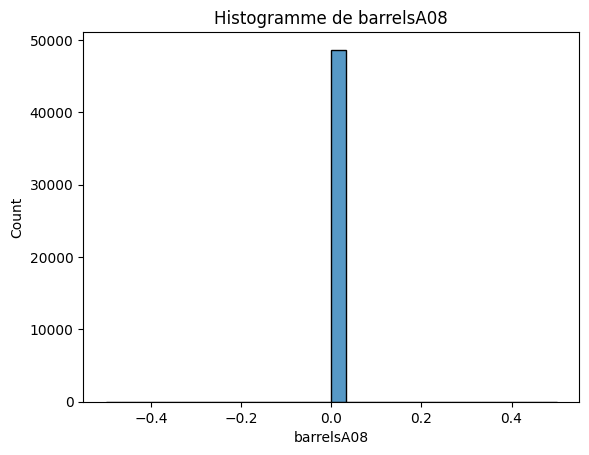

→ barrelsA08 : moyenne=0.00, médiane=0.00, std=0.00


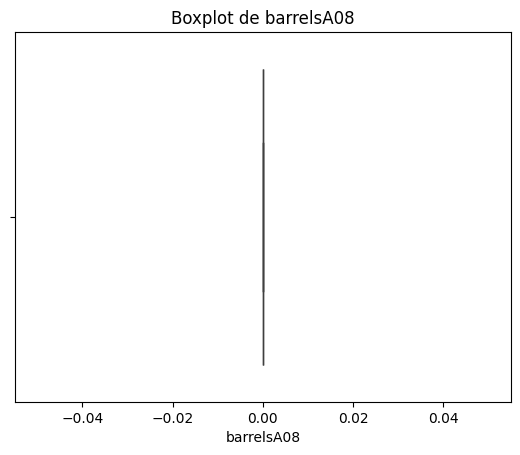

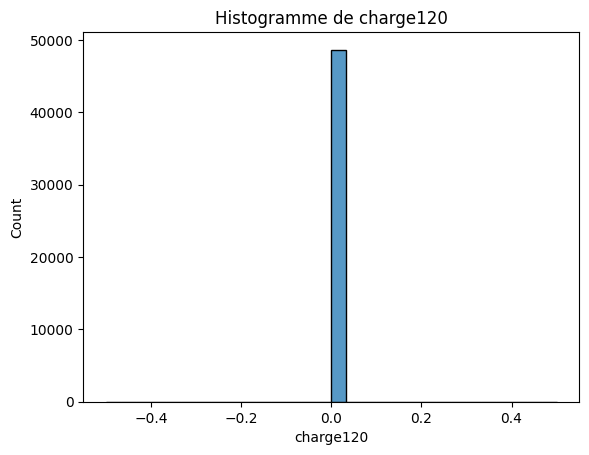

→ charge120 : moyenne=0.00, médiane=0.00, std=0.00


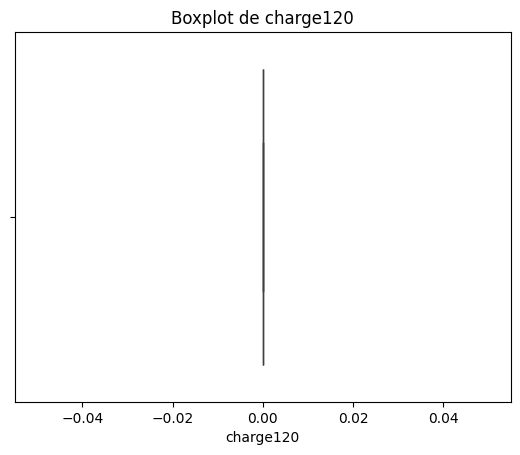

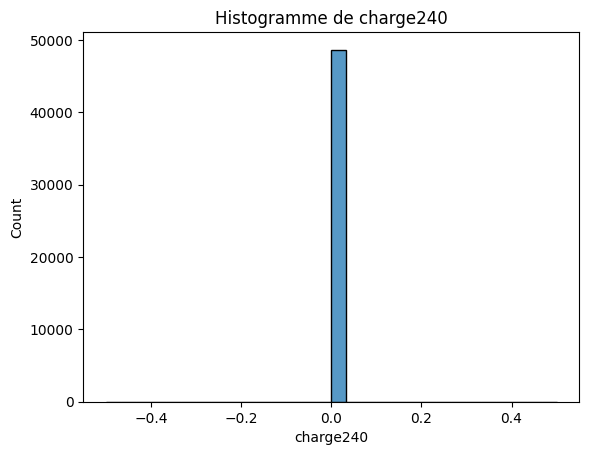

→ charge240 : moyenne=0.00, médiane=0.00, std=0.00


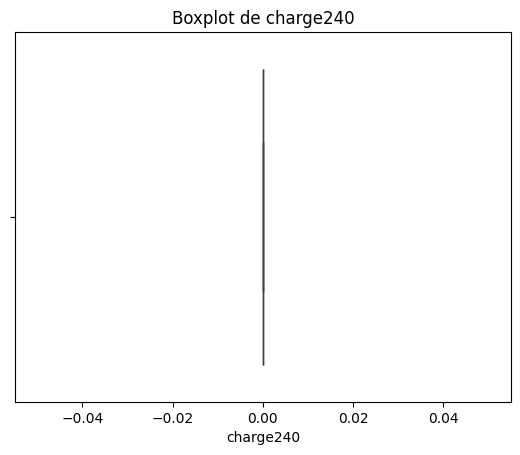

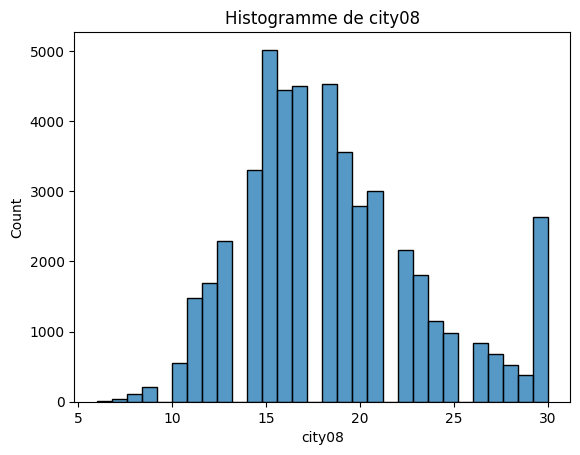

→ city08 : moyenne=18.45, médiane=18.00, std=4.90


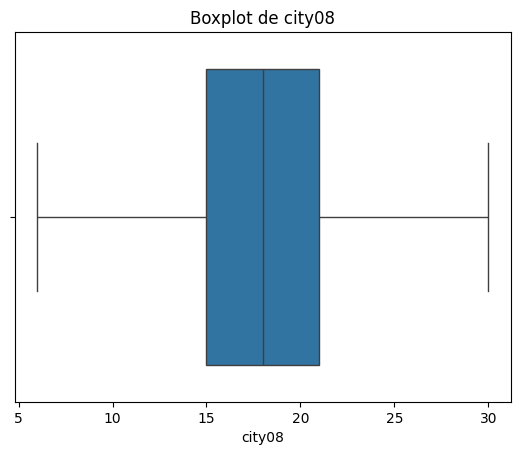

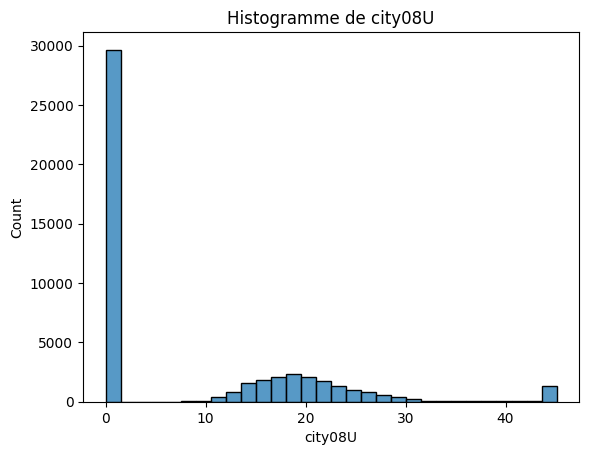

→ city08U : moyenne=8.52, médiane=0.00, std=11.81


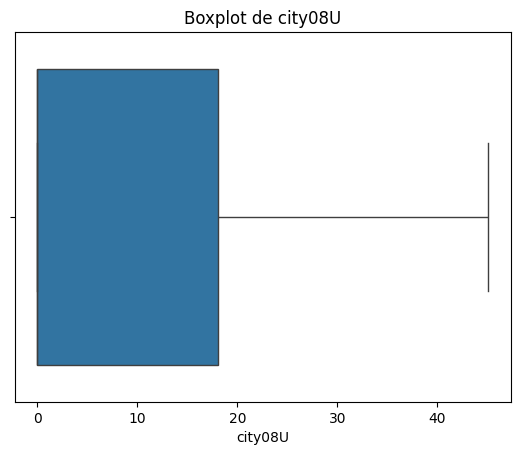

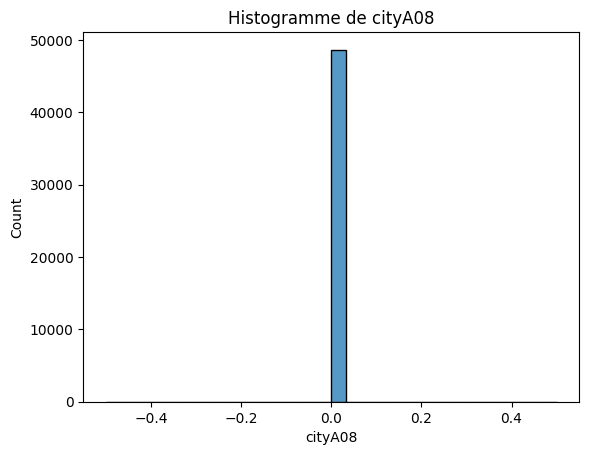

→ cityA08 : moyenne=0.00, médiane=0.00, std=0.00


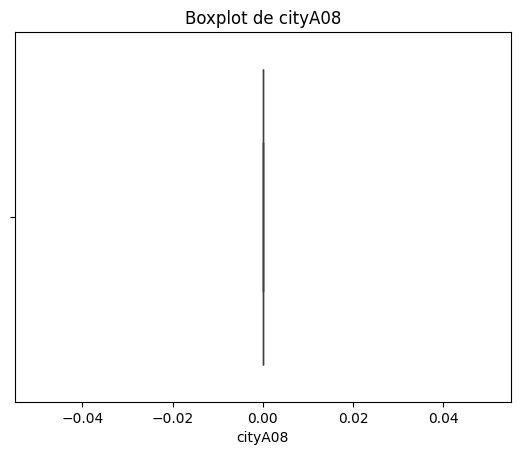

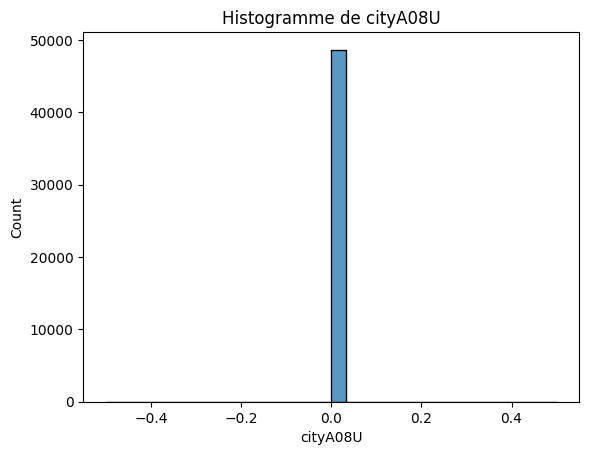

→ cityA08U : moyenne=0.00, médiane=0.00, std=0.00


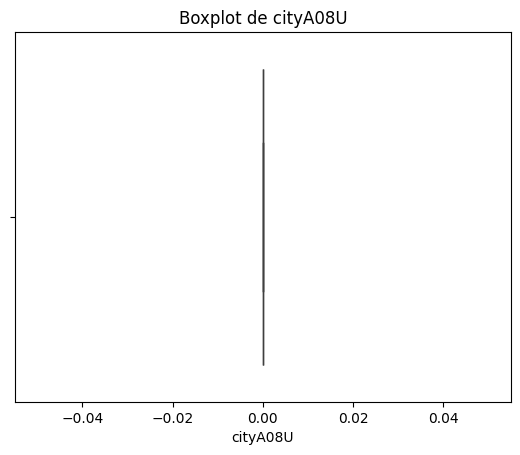

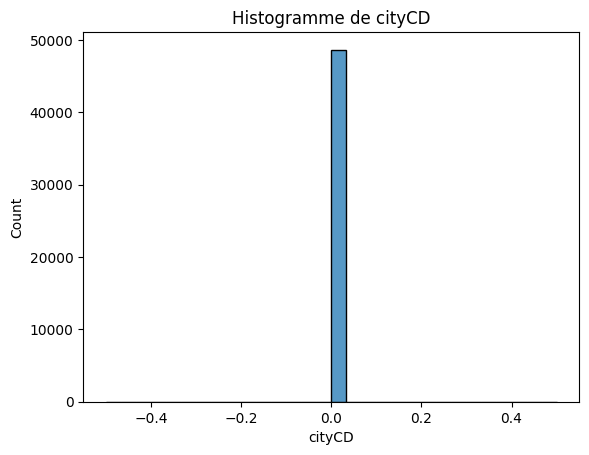

→ cityCD : moyenne=0.00, médiane=0.00, std=0.00


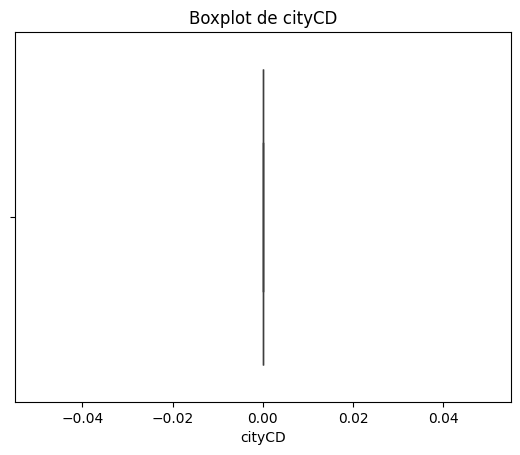

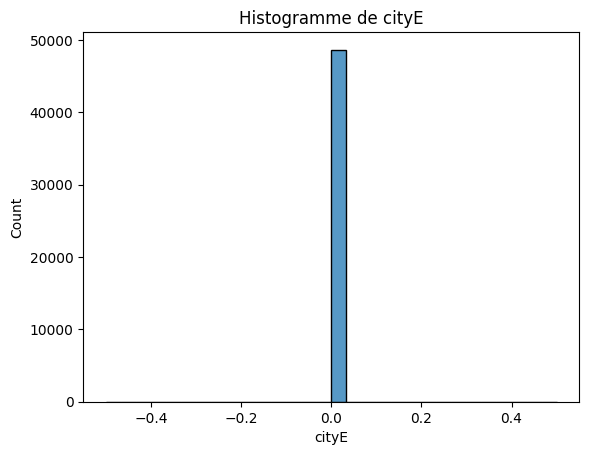

→ cityE : moyenne=0.00, médiane=0.00, std=0.00


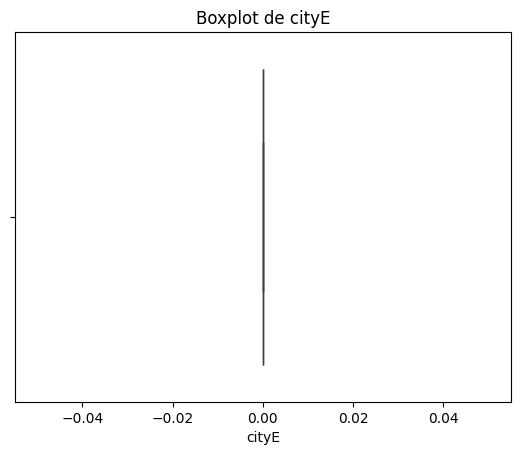

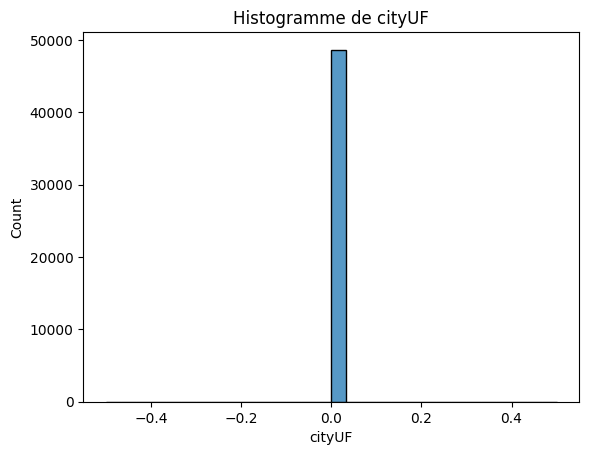

→ cityUF : moyenne=0.00, médiane=0.00, std=0.00


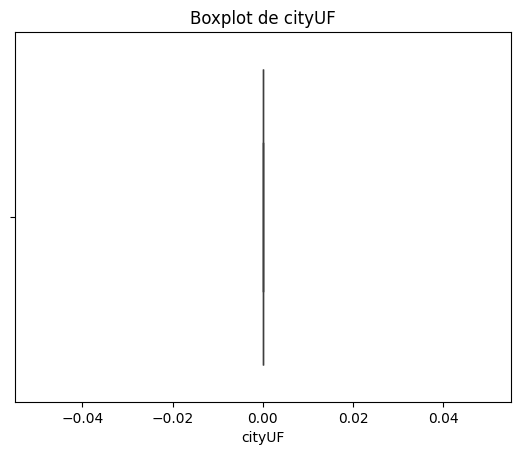

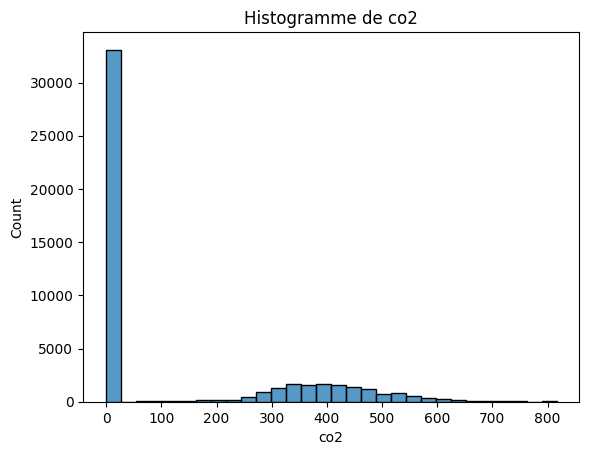

→ co2 : moyenne=128.96, médiane=-1.00, std=198.56


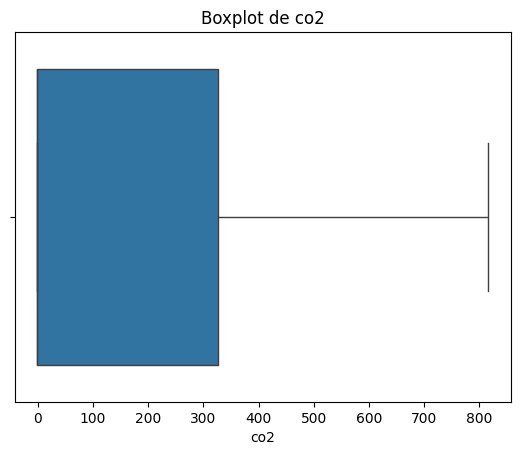

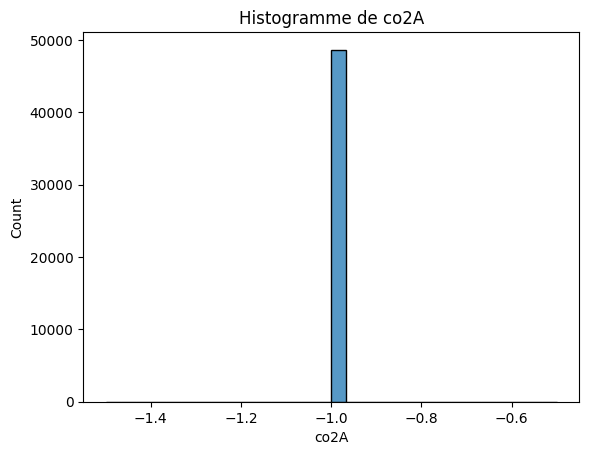

→ co2A : moyenne=-1.00, médiane=-1.00, std=0.00


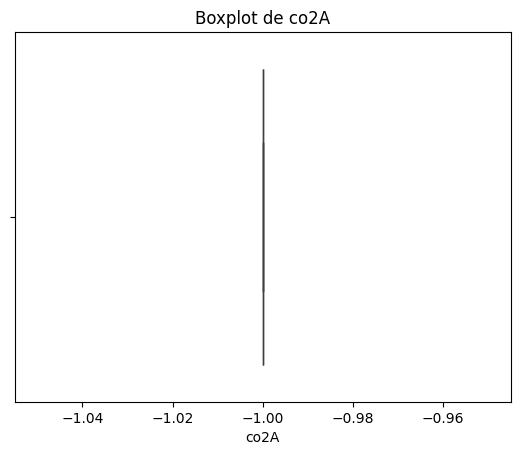

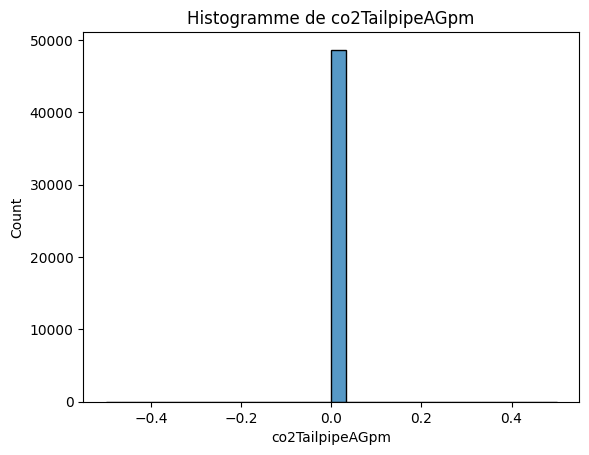

→ co2TailpipeAGpm : moyenne=0.00, médiane=0.00, std=0.00


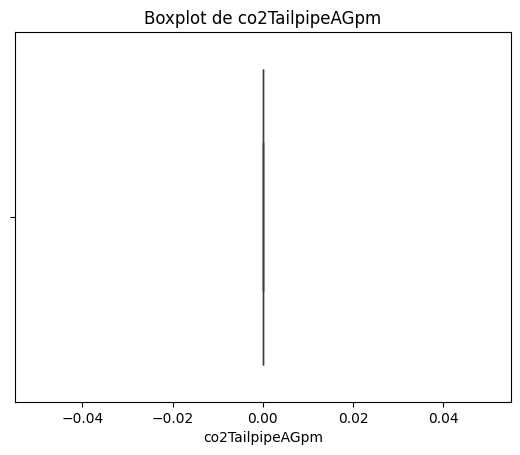

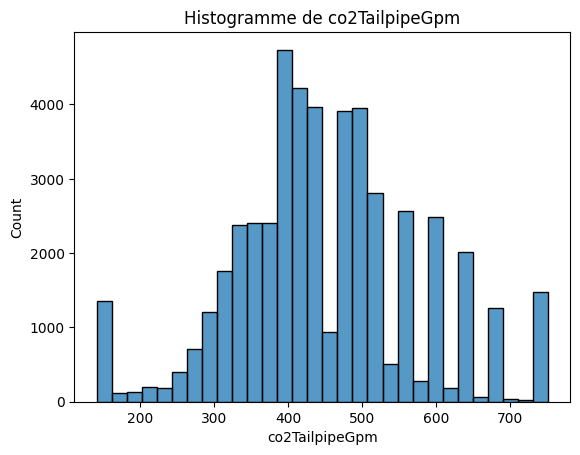

→ co2TailpipeGpm : moyenne=450.69, médiane=444.35, std=123.50


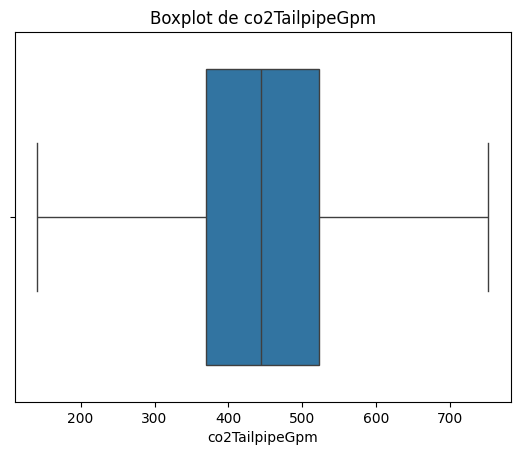

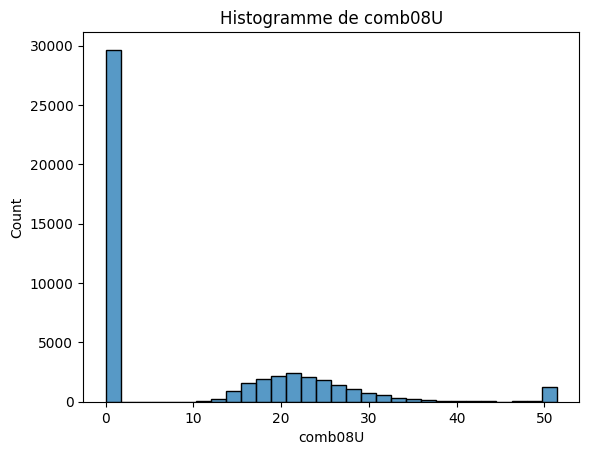

→ comb08U : moyenne=9.60, médiane=0.00, std=13.21


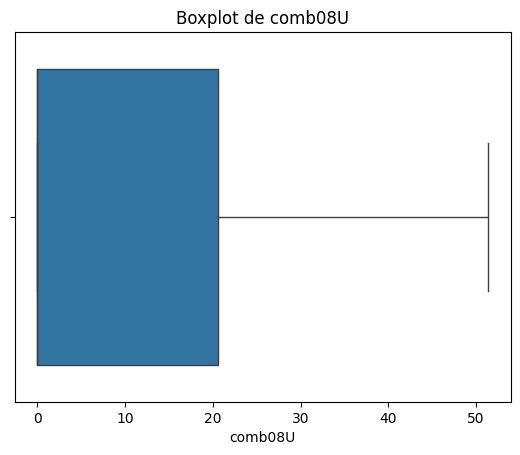

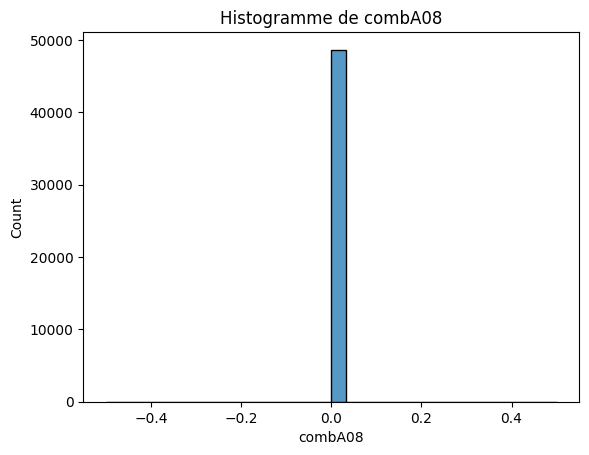

→ combA08 : moyenne=0.00, médiane=0.00, std=0.00


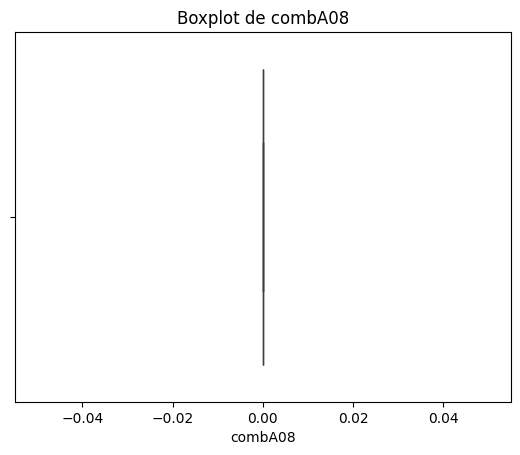

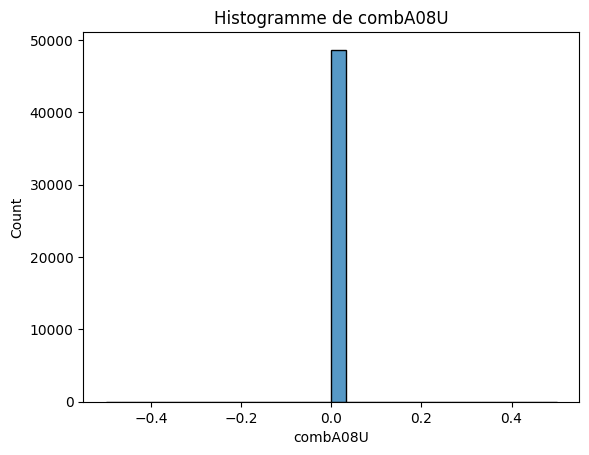

→ combA08U : moyenne=0.00, médiane=0.00, std=0.00


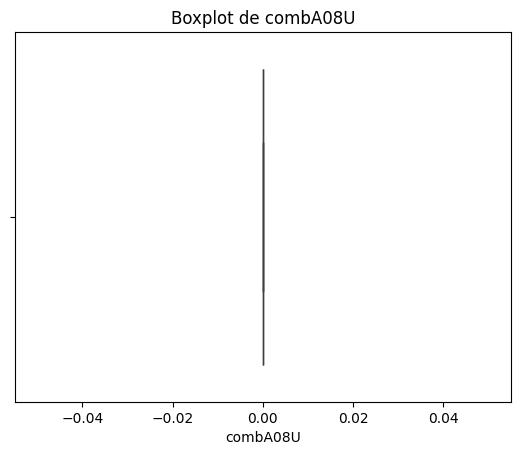

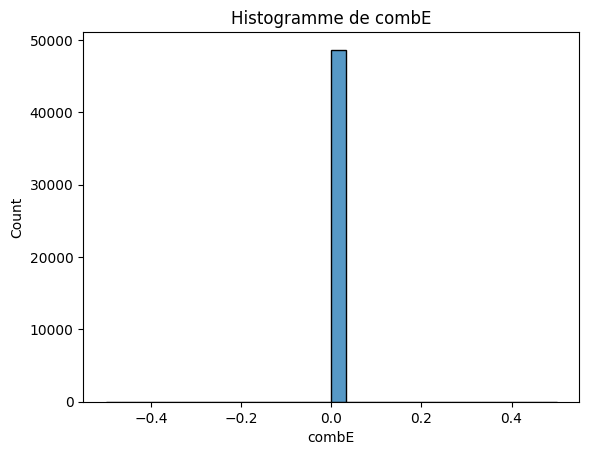

→ combE : moyenne=0.00, médiane=0.00, std=0.00


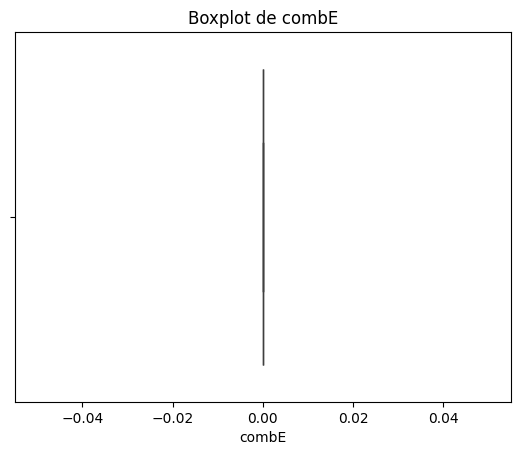

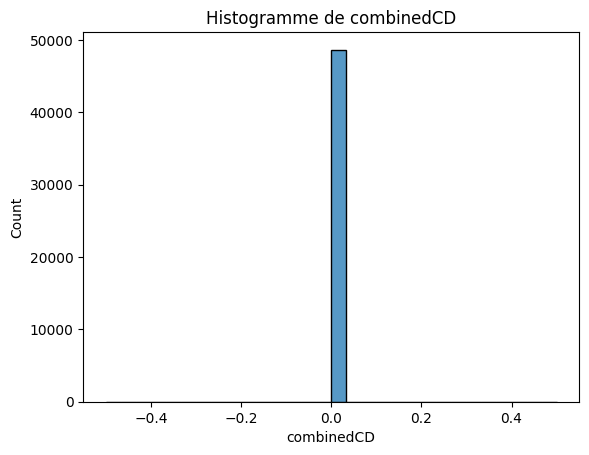

→ combinedCD : moyenne=0.00, médiane=0.00, std=0.00


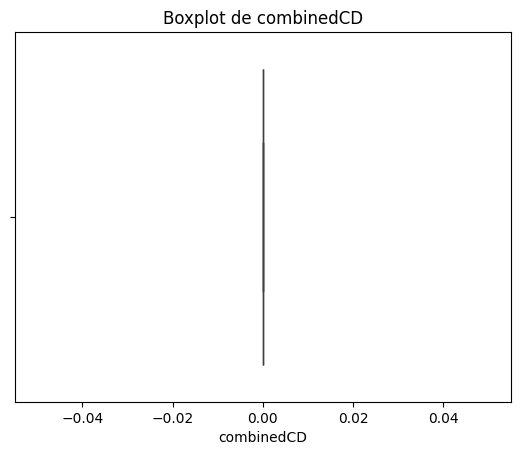

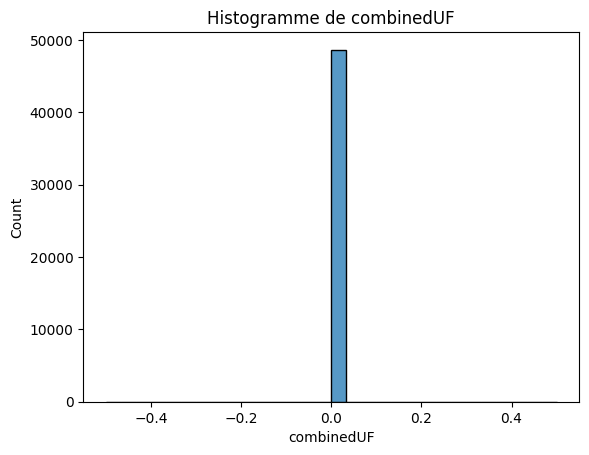

→ combinedUF : moyenne=0.00, médiane=0.00, std=0.00


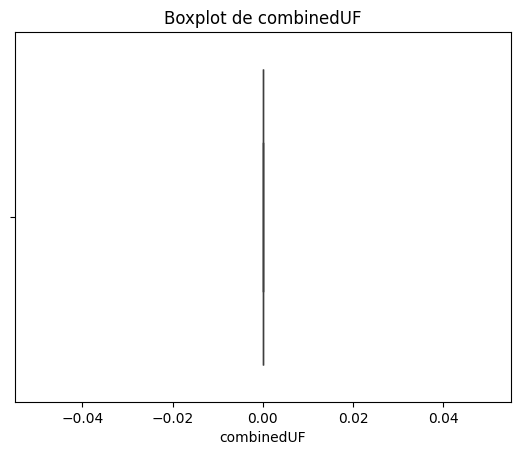

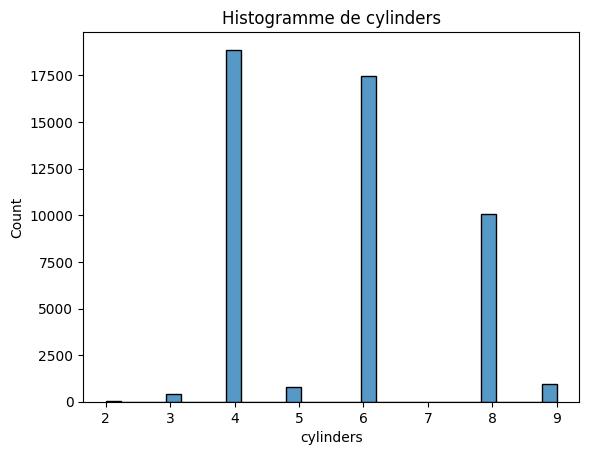

→ cylinders : moyenne=5.65, médiane=6.00, std=1.60


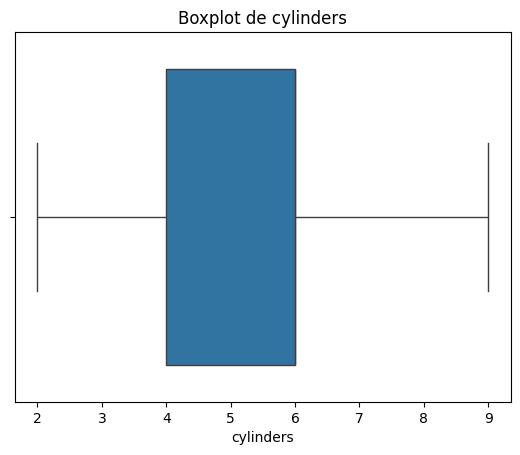

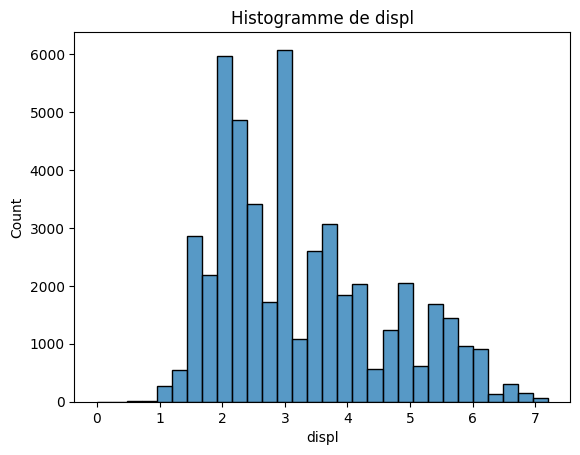

→ displ : moyenne=3.26, médiane=3.00, std=1.33


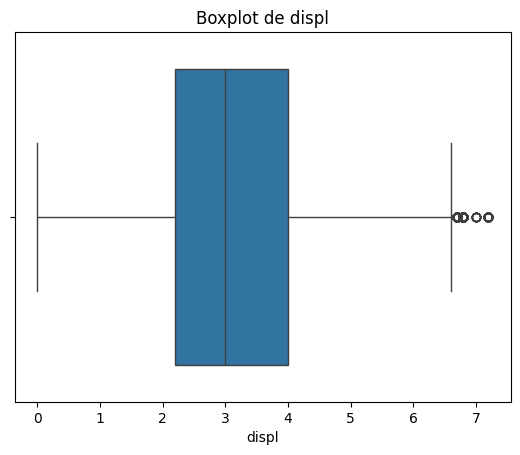

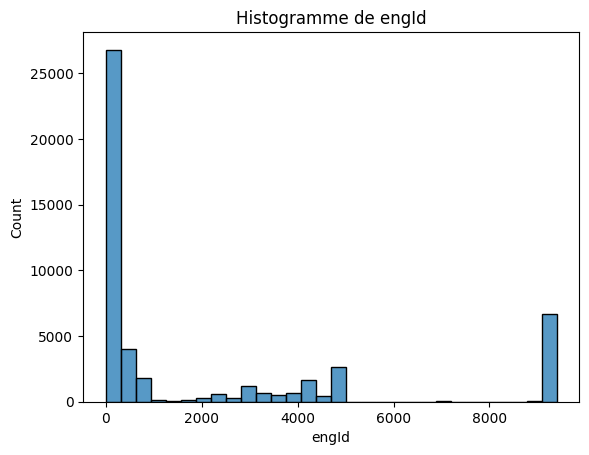

→ engId : moyenne=2119.10, médiane=166.00, std=3274.48


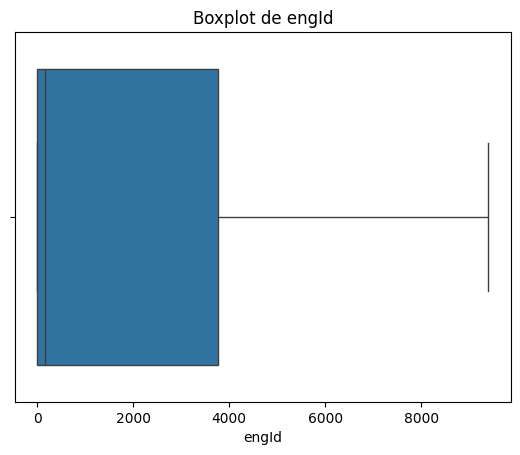

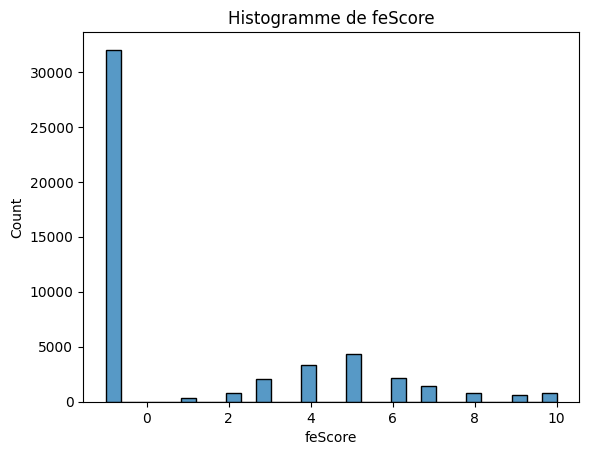

→ feScore : moyenne=1.11, médiane=-1.00, std=3.16


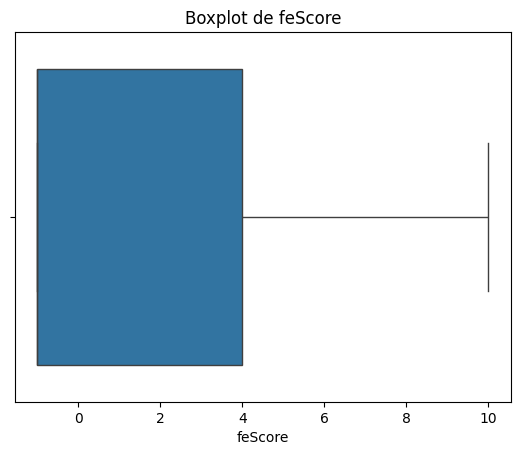

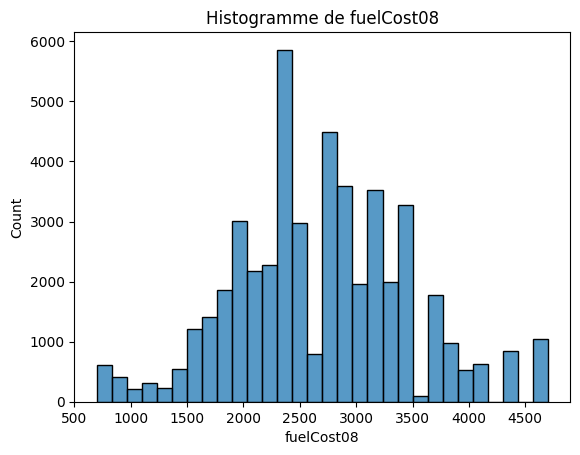

→ fuelCost08 : moyenne=2681.86, médiane=2700.00, std=785.91


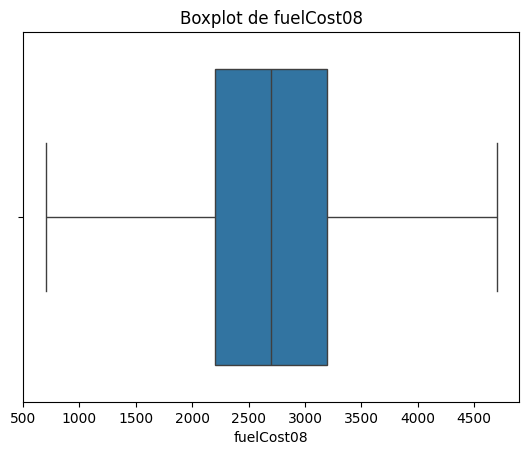

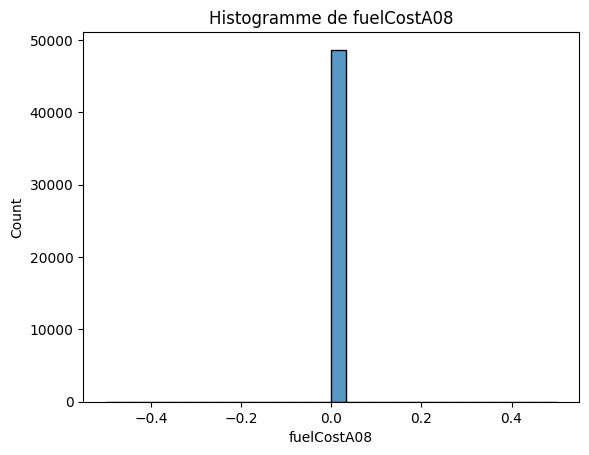

→ fuelCostA08 : moyenne=0.00, médiane=0.00, std=0.00


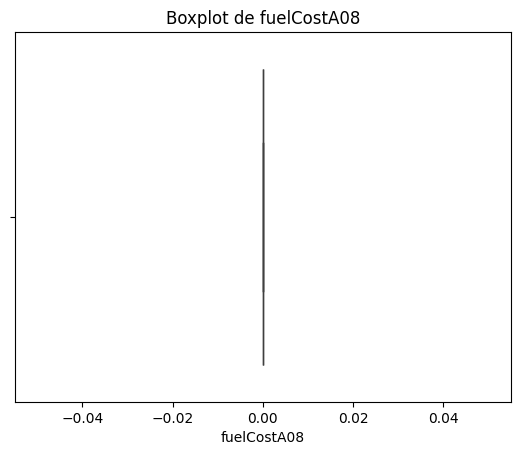

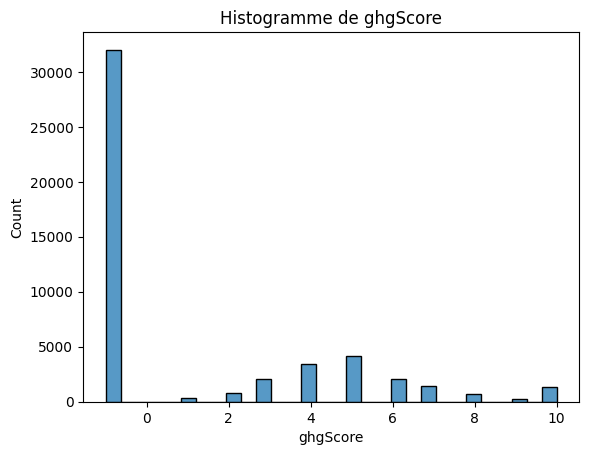

→ ghgScore : moyenne=1.13, médiane=-1.00, std=3.20


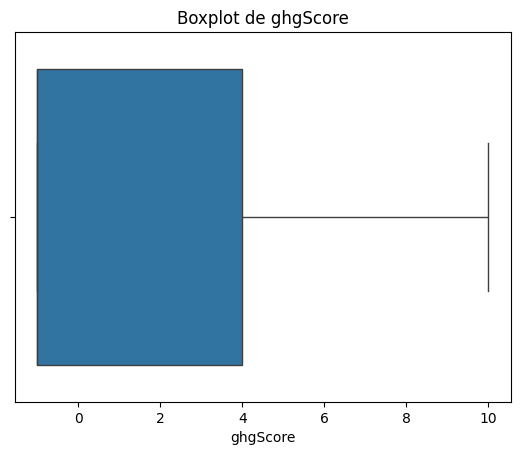

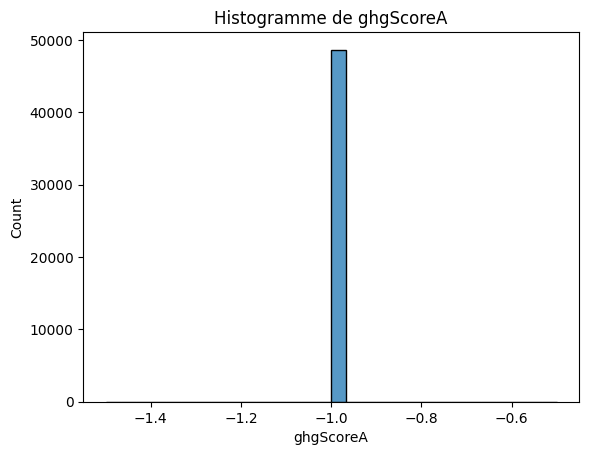

→ ghgScoreA : moyenne=-1.00, médiane=-1.00, std=0.00


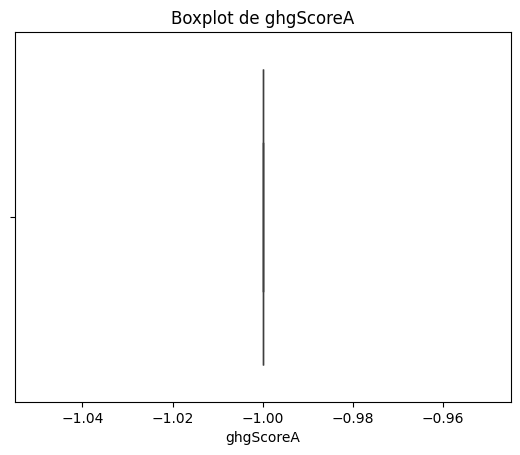

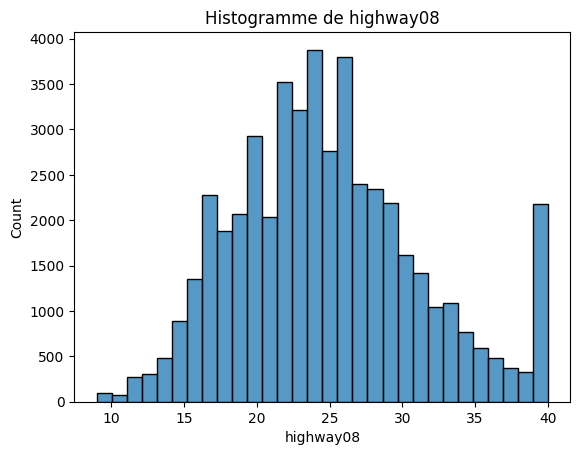

→ highway08 : moyenne=24.85, médiane=24.00, std=6.25


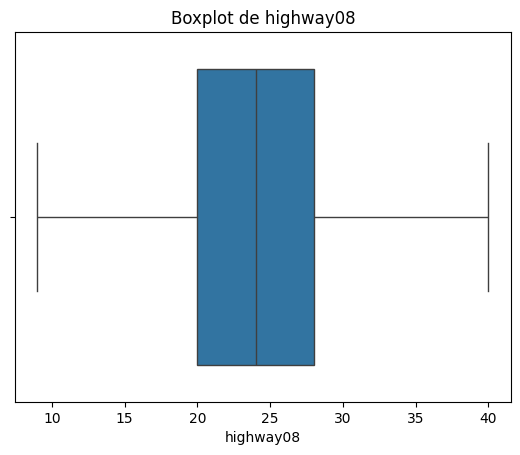

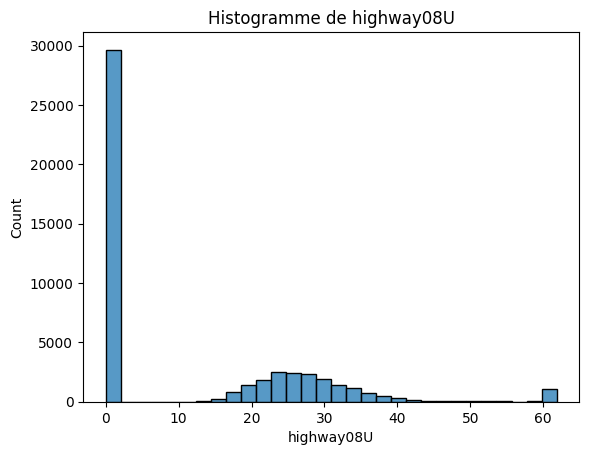

→ highway08U : moyenne=11.37, médiane=0.00, std=15.53


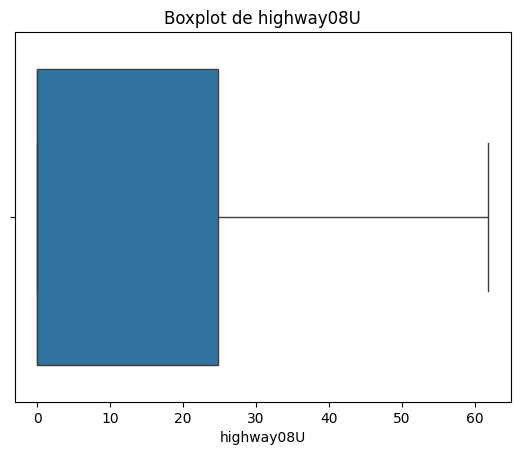

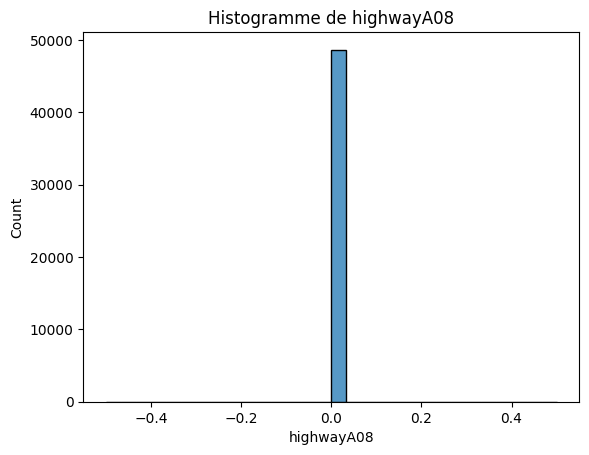

→ highwayA08 : moyenne=0.00, médiane=0.00, std=0.00


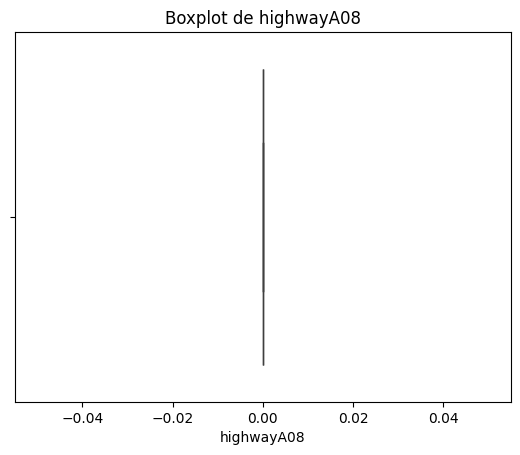

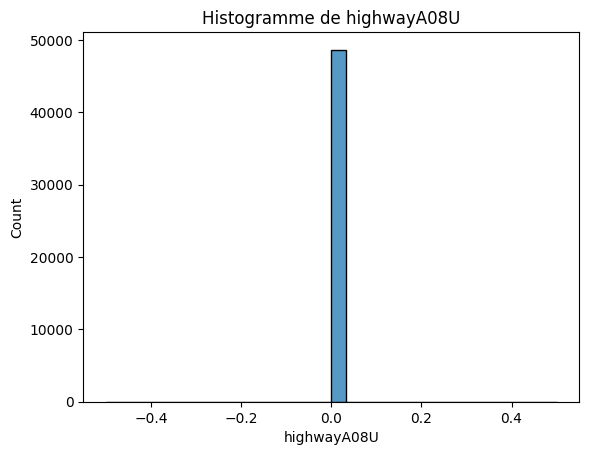

→ highwayA08U : moyenne=0.00, médiane=0.00, std=0.00


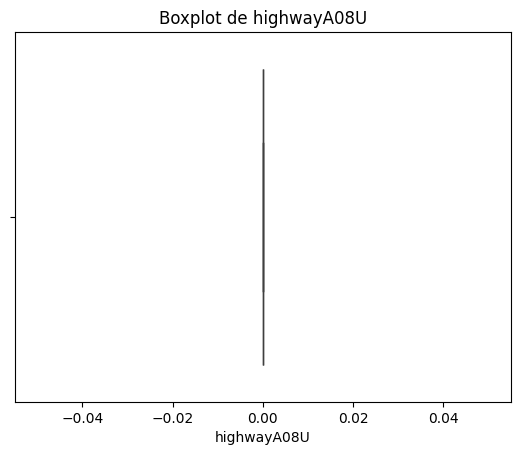

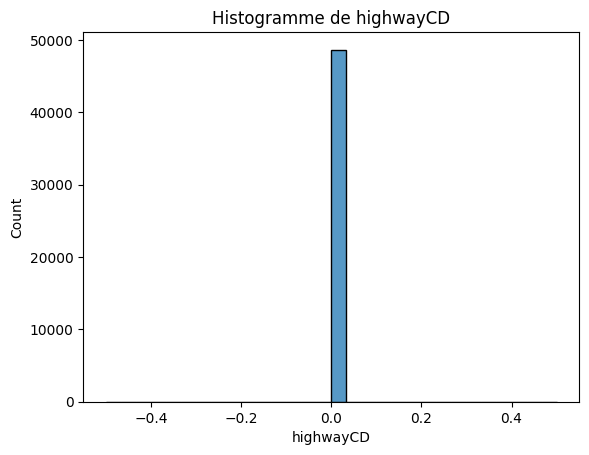

→ highwayCD : moyenne=0.00, médiane=0.00, std=0.00


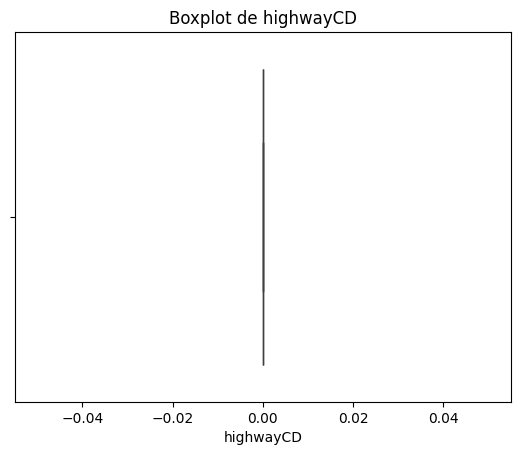

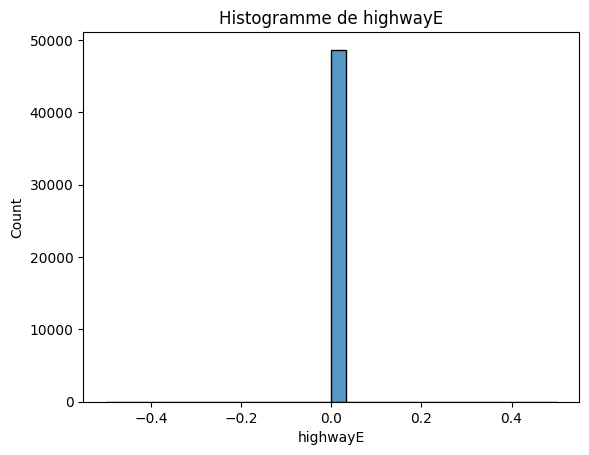

→ highwayE : moyenne=0.00, médiane=0.00, std=0.00


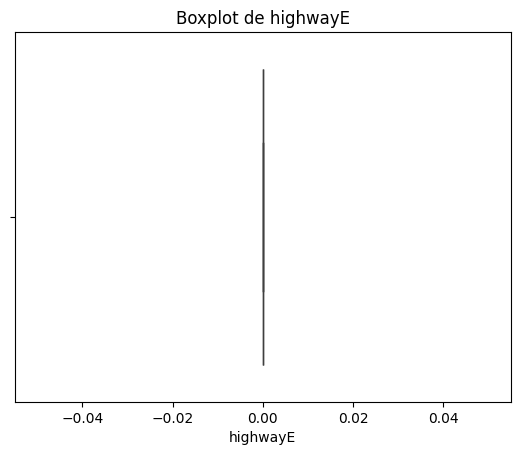

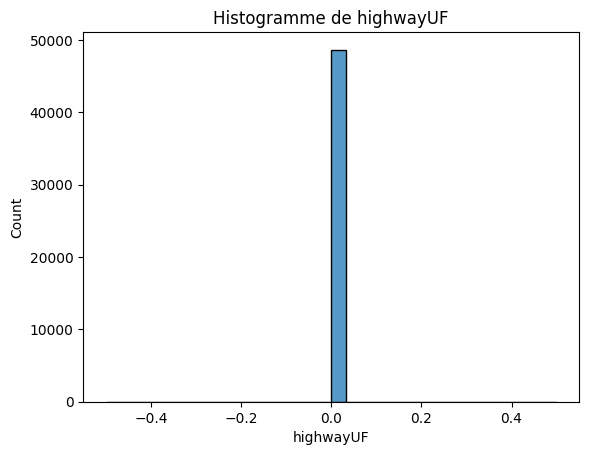

→ highwayUF : moyenne=0.00, médiane=0.00, std=0.00


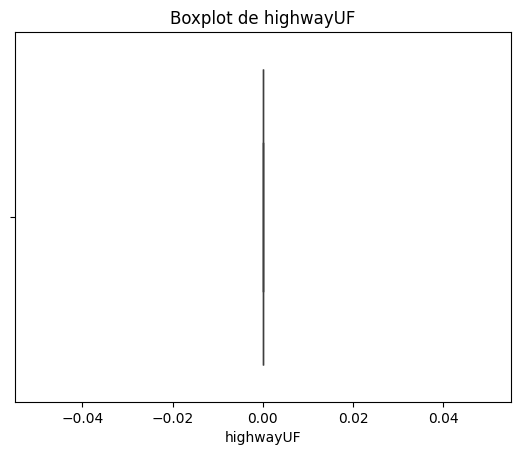

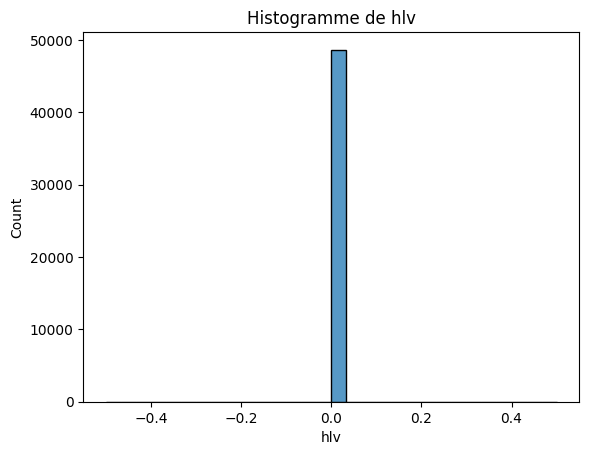

→ hlv : moyenne=0.00, médiane=0.00, std=0.00


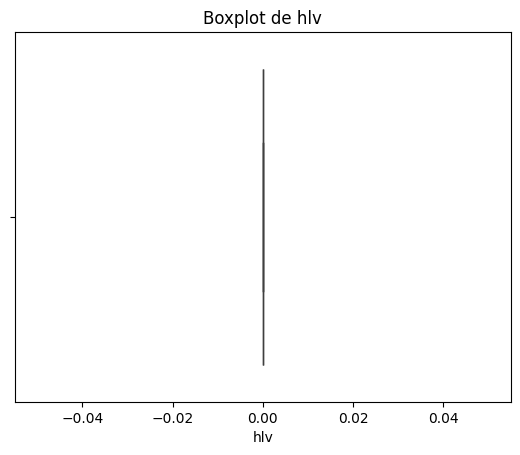

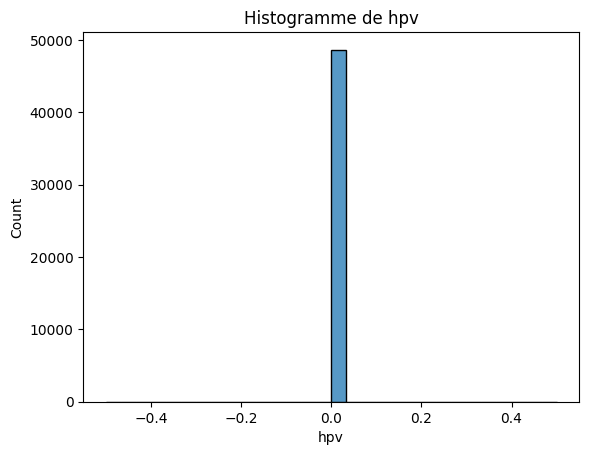

→ hpv : moyenne=0.00, médiane=0.00, std=0.00


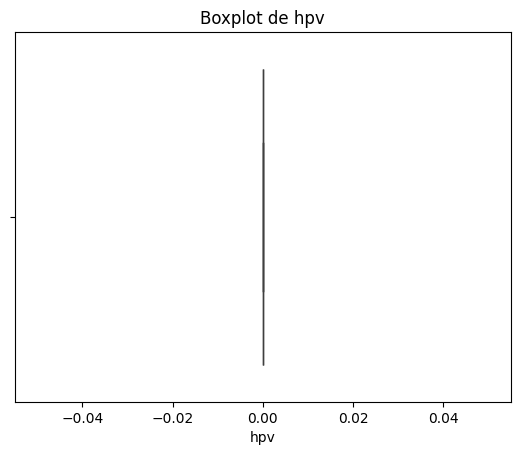

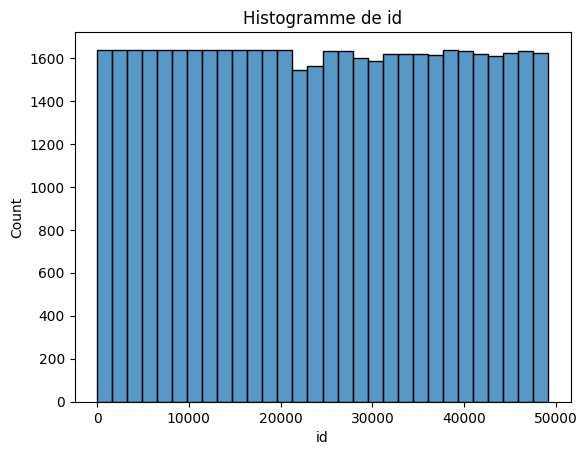

→ id : moyenne=24506.48, médiane=24511.00, std=14214.51


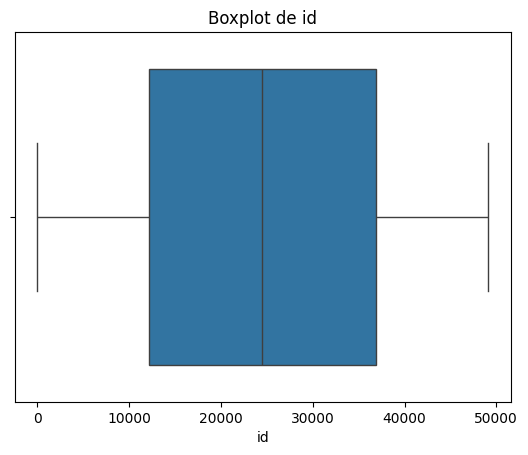

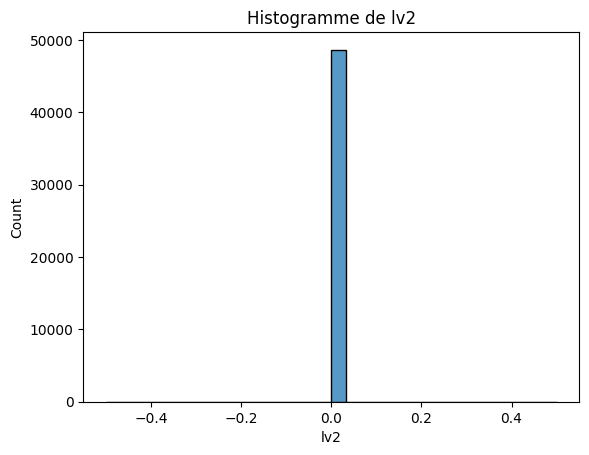

→ lv2 : moyenne=0.00, médiane=0.00, std=0.00


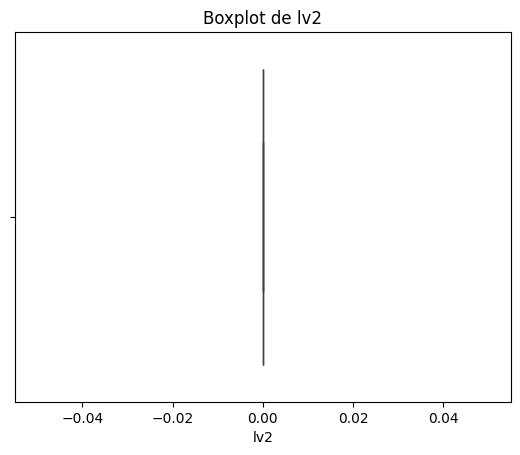

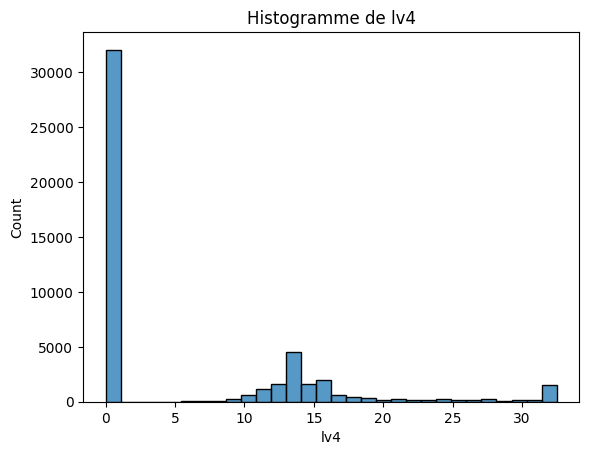

→ lv4 : moyenne=5.69, médiane=0.00, std=8.78


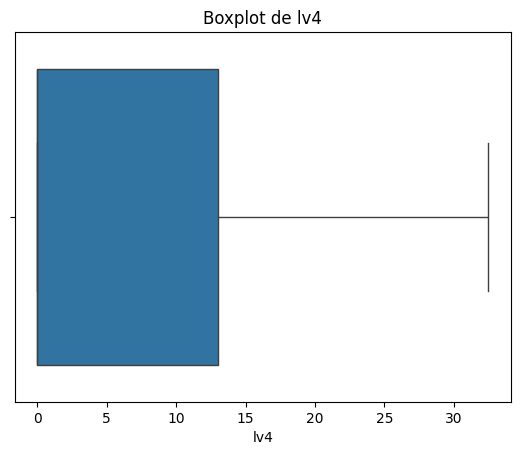

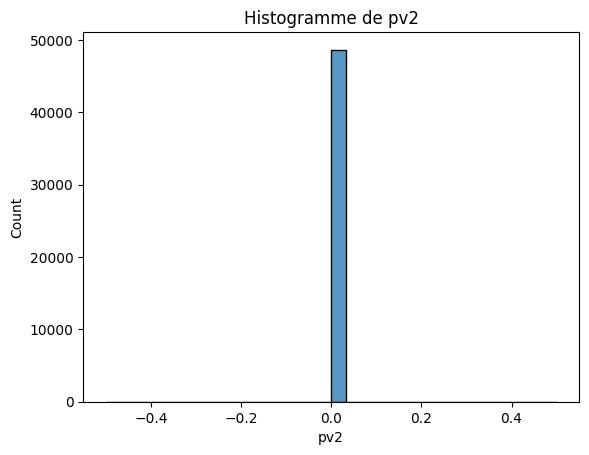

→ pv2 : moyenne=0.00, médiane=0.00, std=0.00


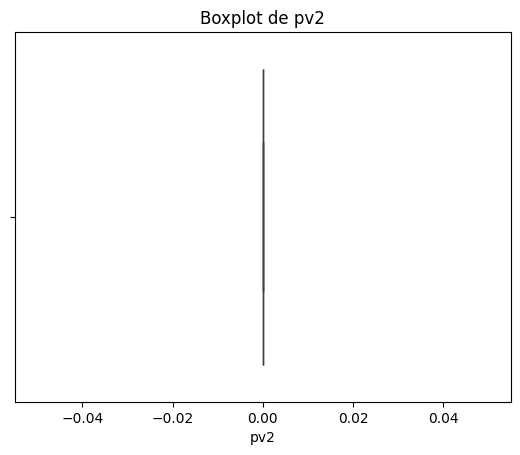

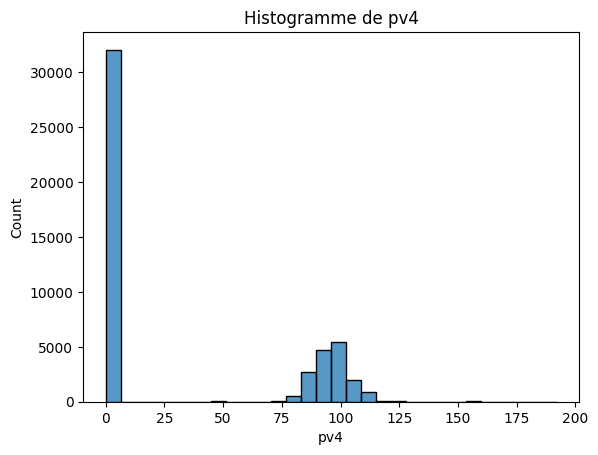

→ pv4 : moyenne=32.82, médiane=0.00, std=45.89


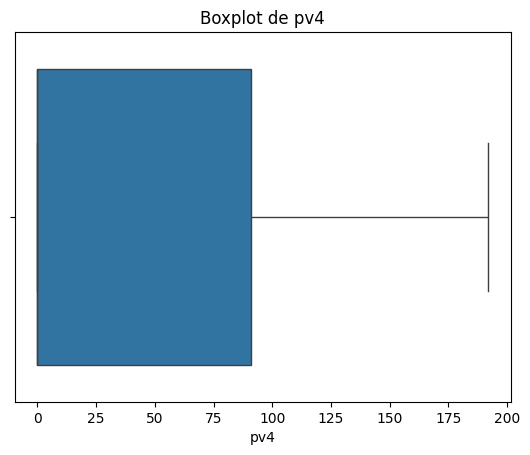

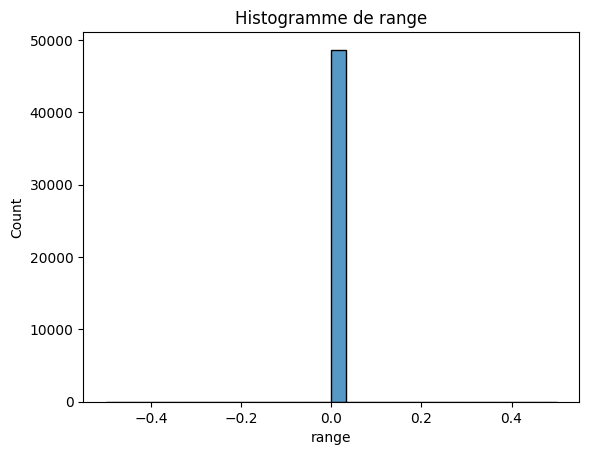

→ range : moyenne=0.00, médiane=0.00, std=0.00


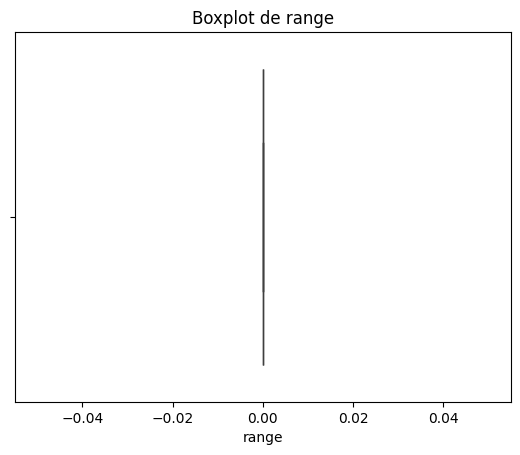

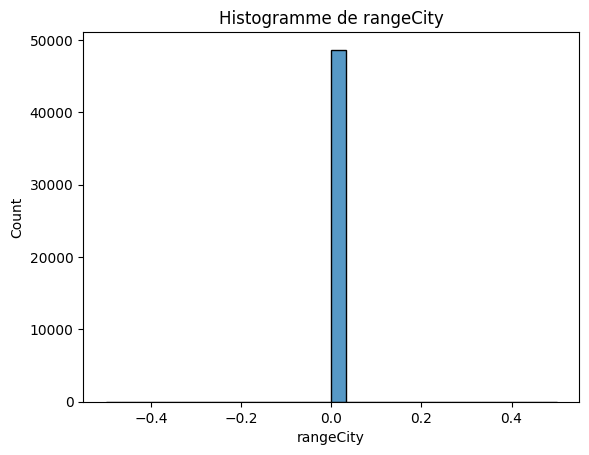

→ rangeCity : moyenne=0.00, médiane=0.00, std=0.00


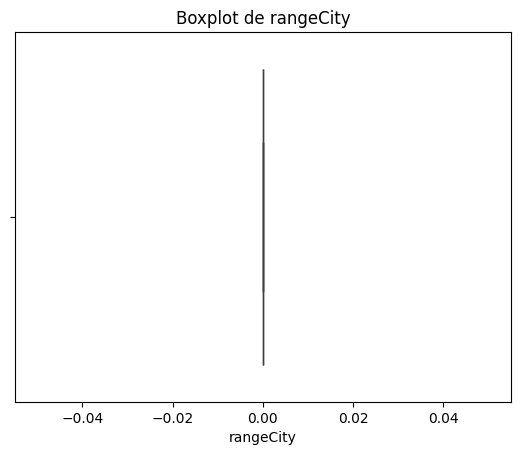

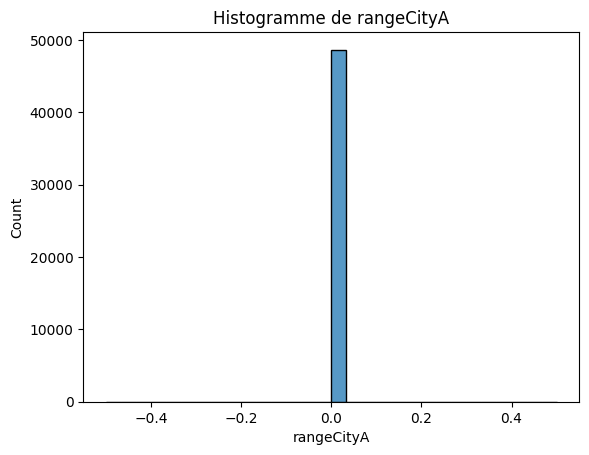

→ rangeCityA : moyenne=0.00, médiane=0.00, std=0.00


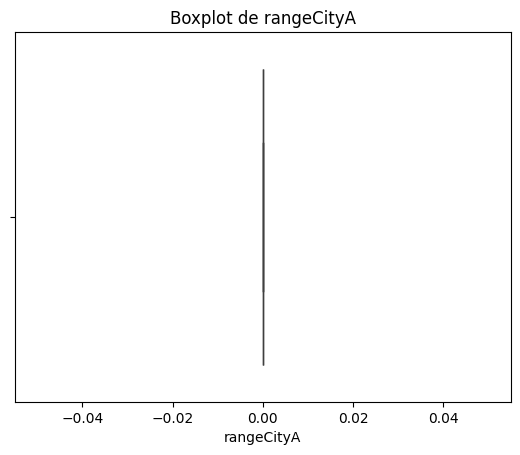

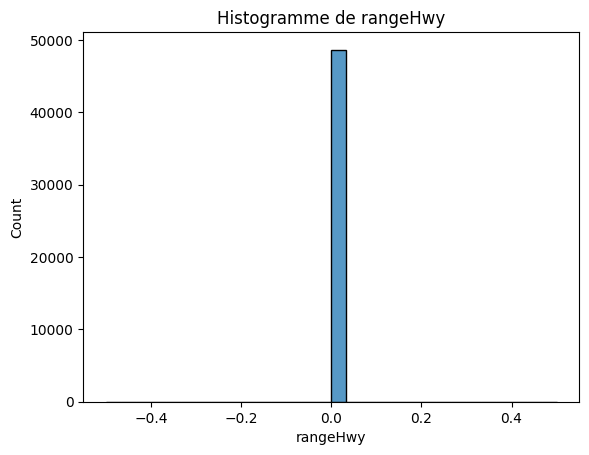

→ rangeHwy : moyenne=0.00, médiane=0.00, std=0.00


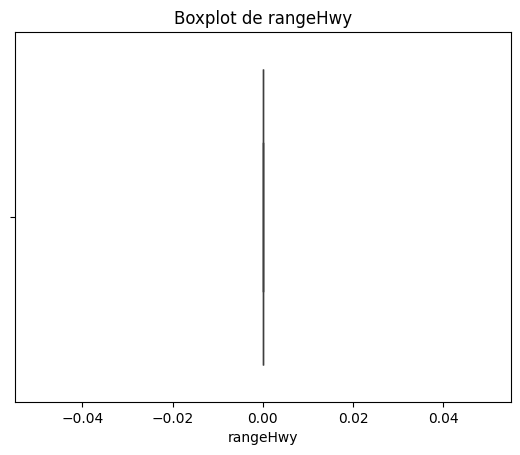

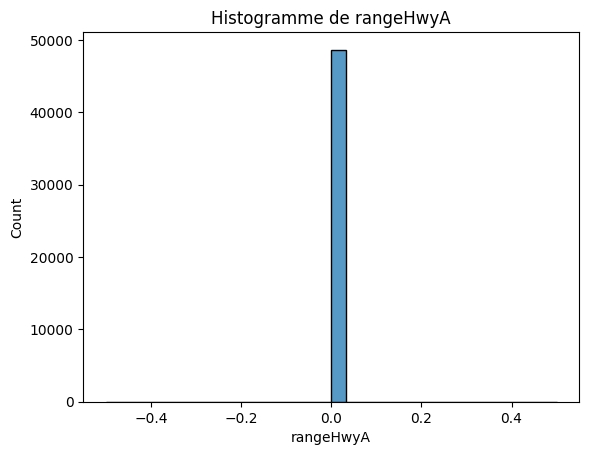

→ rangeHwyA : moyenne=0.00, médiane=0.00, std=0.00


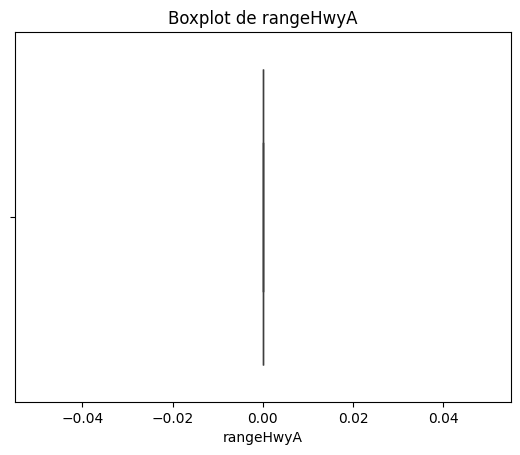

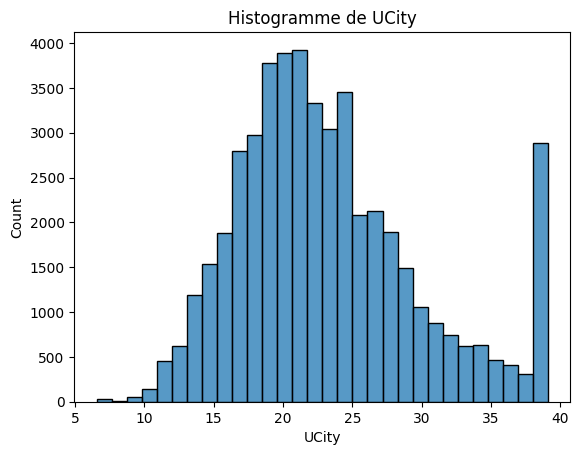

→ UCity : moyenne=23.28, médiane=22.00, std=6.66


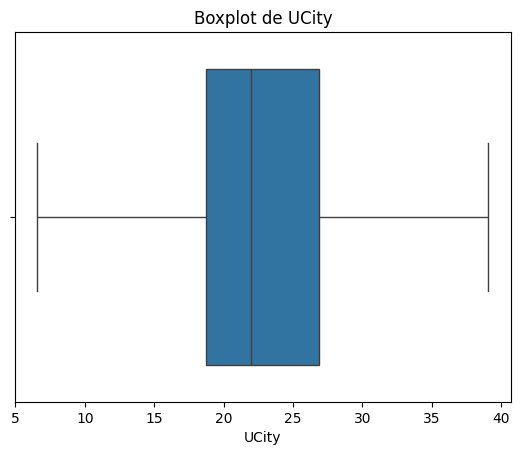

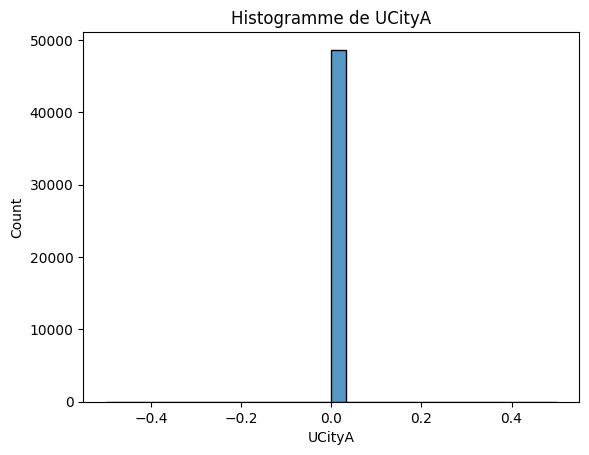

→ UCityA : moyenne=0.00, médiane=0.00, std=0.00


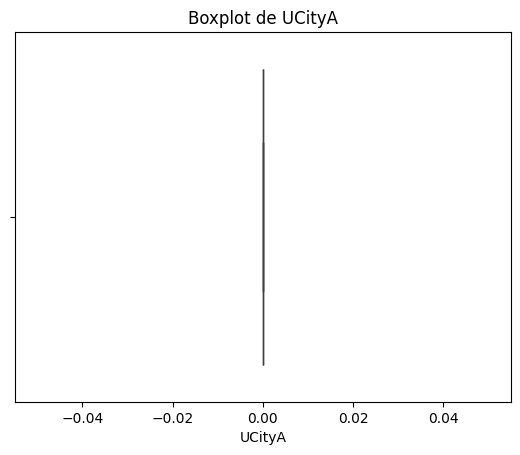

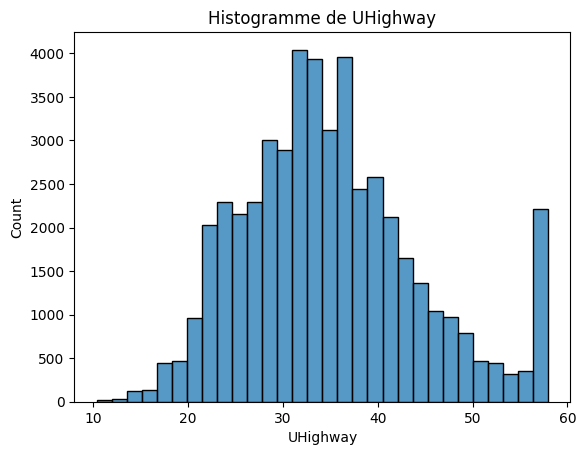

→ UHighway : moyenne=35.01, médiane=34.00, std=9.38


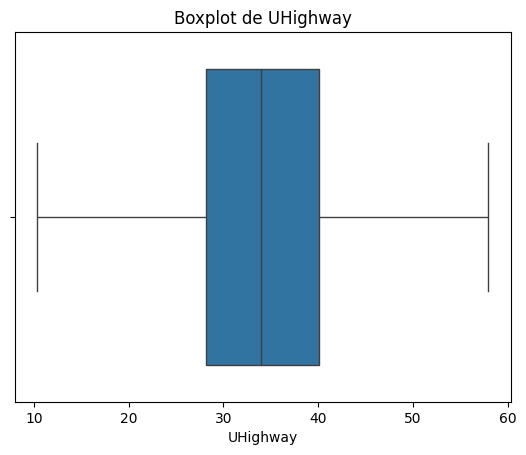

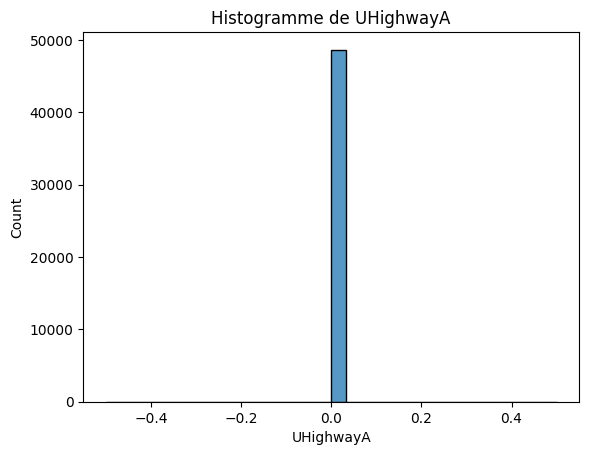

→ UHighwayA : moyenne=0.00, médiane=0.00, std=0.00


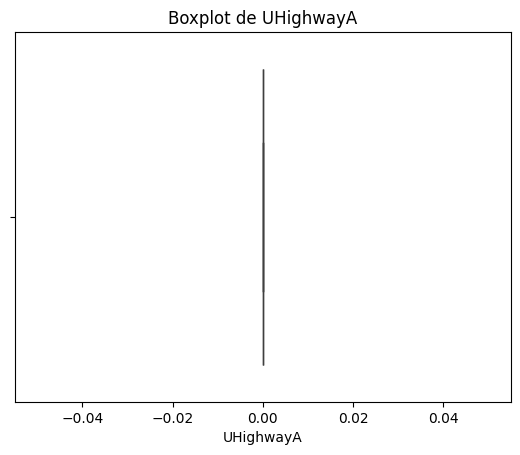

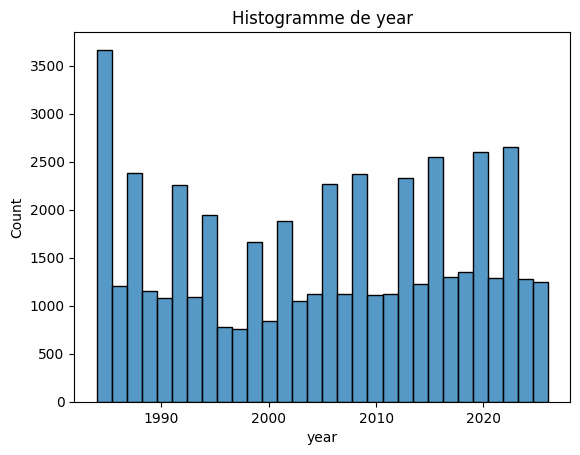

→ year : moyenne=2004.79, médiane=2006.00, std=12.78


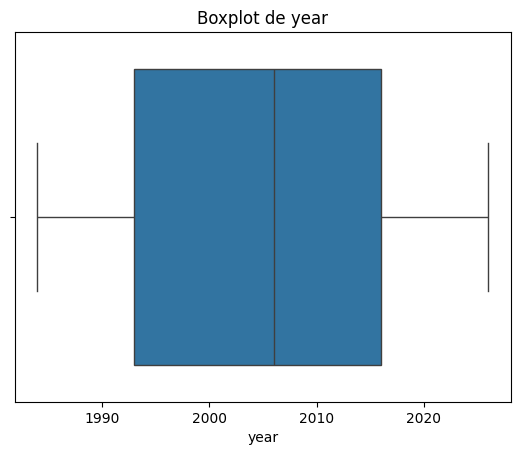

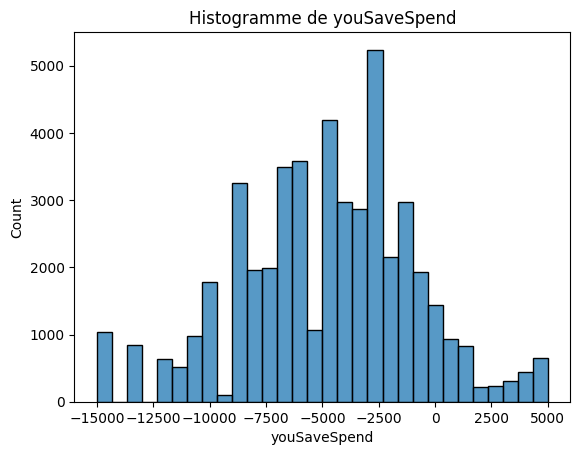

→ youSaveSpend : moyenne=-4887.46, médiane=-5000.00, std=3943.59


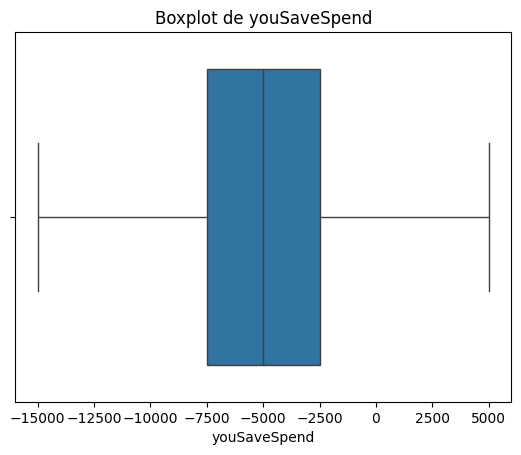

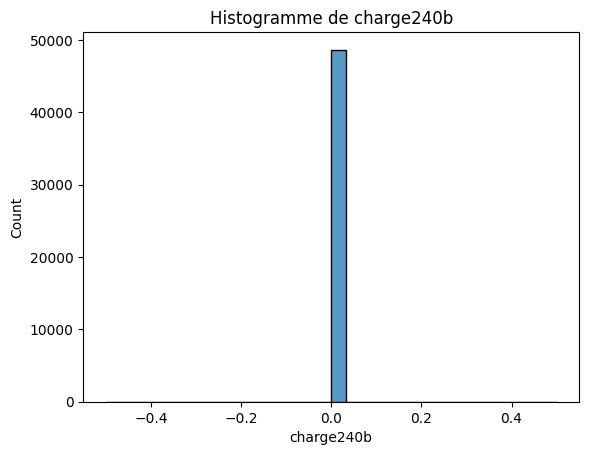

→ charge240b : moyenne=0.00, médiane=0.00, std=0.00


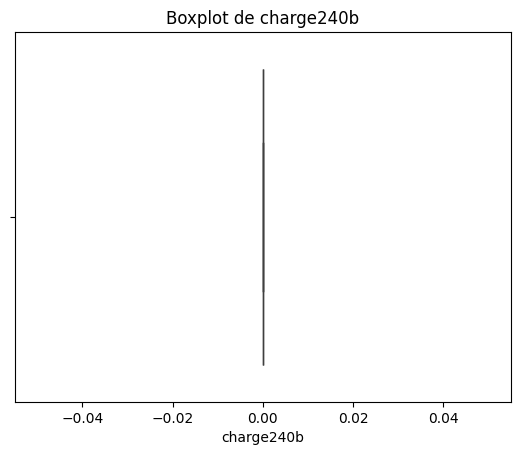

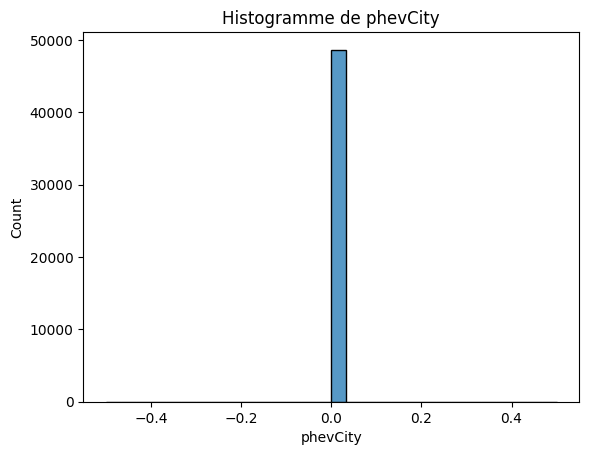

→ phevCity : moyenne=0.00, médiane=0.00, std=0.00


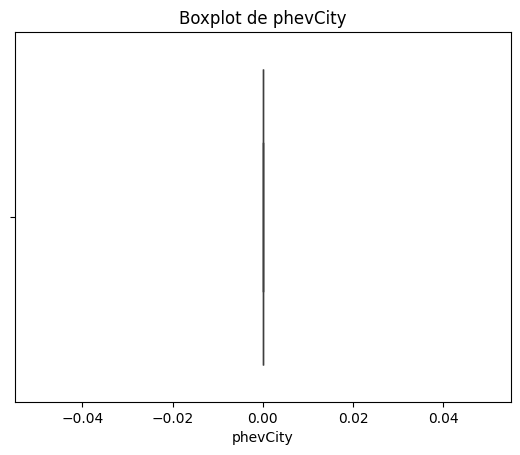

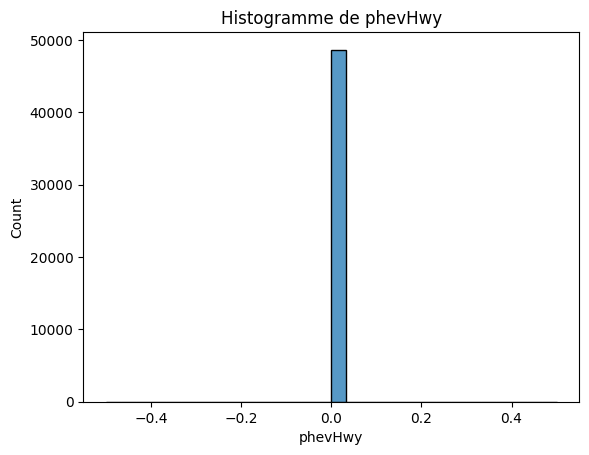

→ phevHwy : moyenne=0.00, médiane=0.00, std=0.00


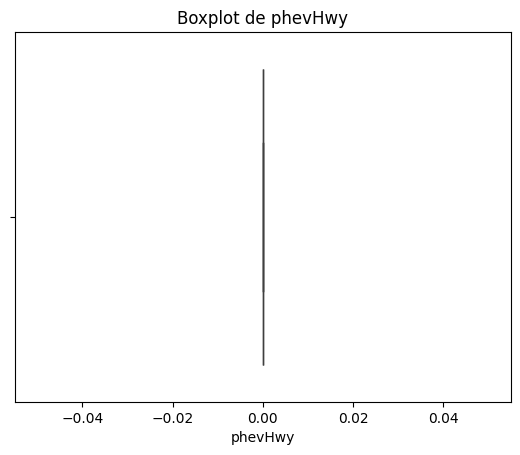

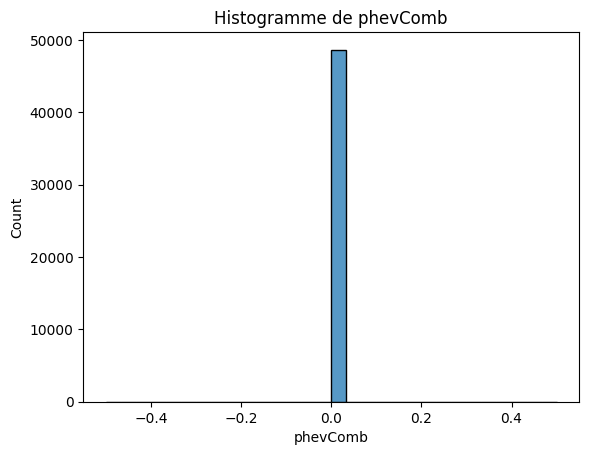

→ phevComb : moyenne=0.00, médiane=0.00, std=0.00


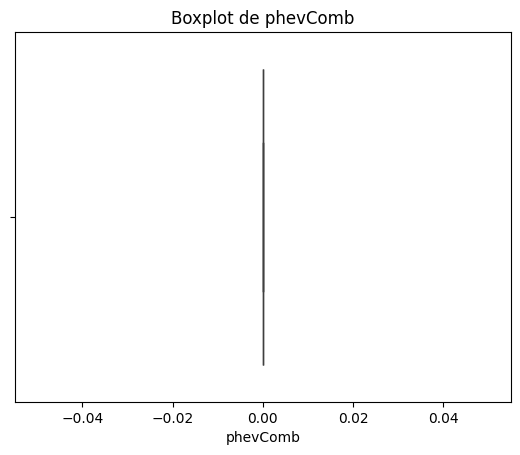

In [16]:


def analyse_univ(col):
    # Histogramme
    plt.figure(); sns.histplot(df[col], bins=30); plt.title(f"Histogramme de {col}"); plt.show()
    print(f"→ {col} : moyenne={df[col].mean():.2f}, médiane={df[col].median():.2f}, std={df[col].std():.2f}")

    # Boxplot
    plt.figure(); sns.boxplot(x=df[col]); plt.title(f"Boxplot de {col}"); plt.show()

for col in num_cols:
    analyse_univ(col)



```
Interpretations :

-highway08 (consommation sur autoroute)

Statistiques : moyenne ≈ 24.85, médiane = 24.00, écart-type ≈ 6.25.

Histogramme : distribution centrée entre ~20–28 mpg, petit pic isolé vers ~40 mpg (véhicules très économes).

Boxplot : IQR modéré, médiane proche du centre et pas d’outliers marqués.

Conclusion : la plupart des véhicules ont une consommation autoroutière moyenne et stable ; un petit groupe très économe existe et mérite d’être identifié.

-city08 (consommation en ville)

Statistiques : moyenne ≈ 18.45, médiane = 18.00, écart-type ≈ 4.98.

Histogramme : pic principal autour de 14–19 mpg, petit pic isolé vers ~30 mpg.

Boxplot : boîte centrée ~15–20 mpg, large éventail mais sans outliers significatifs.

Conclusion : tendance similaire à highway08 mais avec plus de dispersion ; présence d’un sous-groupe de véhicules très économes.

-displ (cylindrée, litres)

Statistiques : moyenne ≈ 3.26, médiane = 3.00, écart-type ≈ 1.33.

Histogramme : concentration entre ~1.5 et 4 L et longue queue à droite (jusqu’à ~7 L).

Boxplot : IQR ≈ 2.5–4 L, mais on observe plusieurs outliers à droite (> ~5 L).

Conclusion : la majorité des moteurs sont petites à moyennes cylindrées ; quelques gros moteurs (outliers) augmentent la dispersion et doivent être documentés ou analysés à part.

-cylinders (nombre de cylindres)

Statistiques : moyenne ≈ 5.65, médiane = 6.00, écart-type ≈ 1.60.

Histogramme : valeurs discrètes dominantes (4, 6, 8) avec pics marqués.

Boxplot : médiane ≈ 6, étendue 3–9, sans outliers marqués — attention : variable catégorielle/ordinale.

Conclusion : traiter comme variable catégorielle dans les analyses ; 4 et 6 cylindres sont les plus fréquents.

-barrels08 (consommation annuelle en barils)

Statistiques : moyenne ≈ 15.10, médiane ≈ 14.88, écart-type ≈ 4.16.

Histogramme : concentration autour de 12–18 barils/an, légère asymétrie à droite.

Boxplot : IQR ≈ 13–17 barils/an, médiane proche de la moyenne et peu d’outliers.

Conclusion : consommation annuelle relativement homogène autour d’une plage moyenne ; quelques valeurs élevées existent mais ne sont pas nombreuses.

```





# **Analyse Bivariée**

# Numerique Numerique

In [17]:
# Calcul de la corrélation avec comb08
corr_target = df[colonnes_numeriques].corr()[target].abs().sort_values(ascending=False)

top10 = corr_target.index[1:11].tolist()
print("Top 15 variables corrélées à comb08 :", top10)

subset = top10 + [target]
corr_small = df[subset].corr()



Top 15 variables corrélées à comb08 : ['city08', 'UCity', 'UHighway', 'highway08', 'co2TailpipeGpm', 'barrels08', 'youSaveSpend', 'fuelCost08', 'displ', 'cylinders']


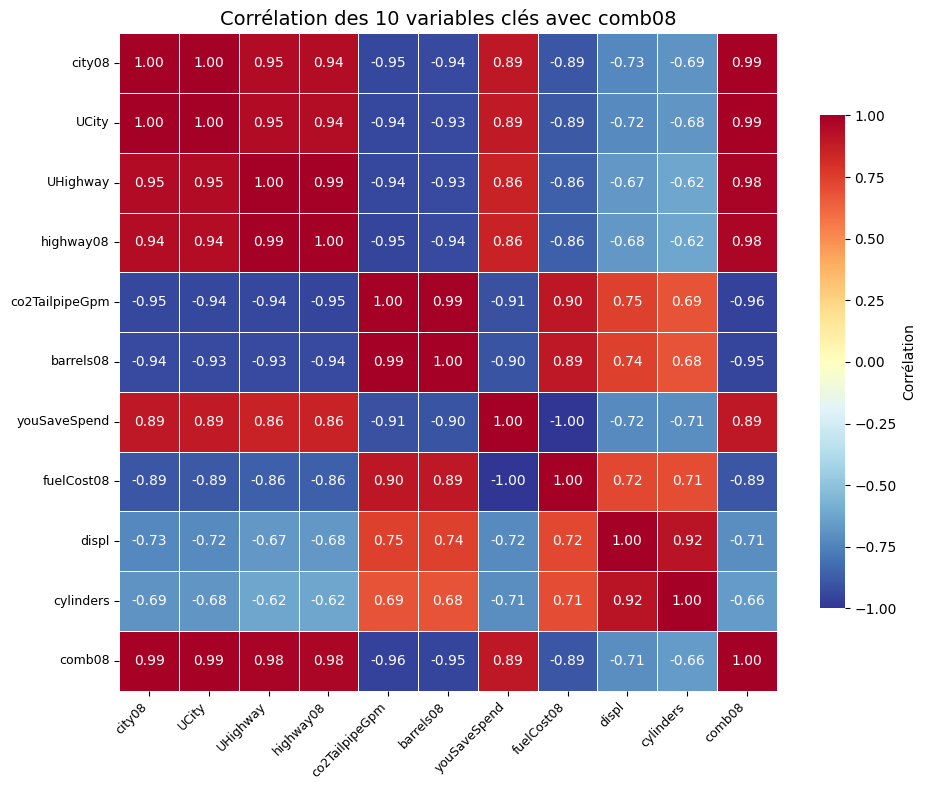

In [18]:

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_small,
    annot      = True,
    fmt        = ".2f",
    cmap       = "RdYlBu_r",
    vmin       = -1,
    vmax       = +1,
    square     = True,
    linewidths = 0.4,
    cbar_kws   = {"shrink": 0.75, "label": "Corrélation"}
)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.title("Corrélation des 10 variables clés avec comb08", fontsize=14)
plt.tight_layout()
plt.show()


La matrice de corrélation montre des relations très fortes entre la consommation combinée (comb08) et plusieurs mesures de consommation en ville et sur autoroute (city08, UCity, UHighway, highway08) — corrélations quasi parfaites (≈ +0.98 à +0.99). En parallèle, comb08 présente des corrélations fortement négatives avec les indicateurs d’impact et de coût (co2TailpipeGpm ≈ −0.96, barrels08 ≈ −0.95, fuelCost08 ≈ −0.89). Ces résultats indiquent que meilleure est la consommation (valeur de comb08 élevée), plus faibles sont les émissions, la consommation en barils et le coût annuel en carburant.

**Crossplots**

In [ ]:
vg_df = df[subset]
plt.figure(figsize=(14, 14))

sns.pairplot(vg_df, diag_kind='kde');

**Comparaison entre "No. of cylinders" & "Fuel consumption**

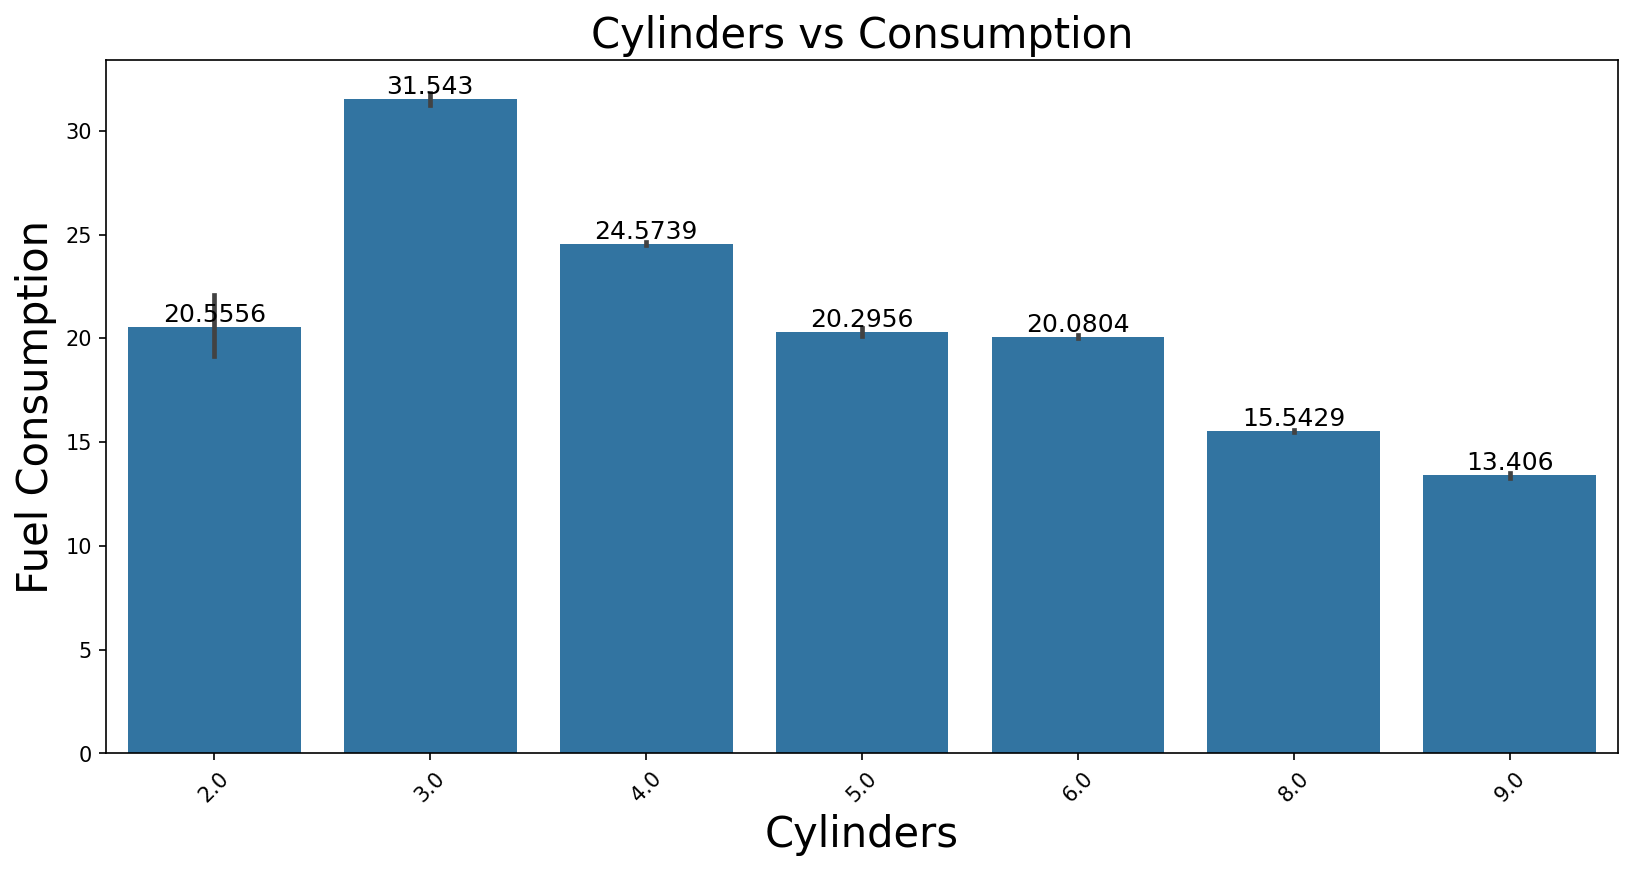

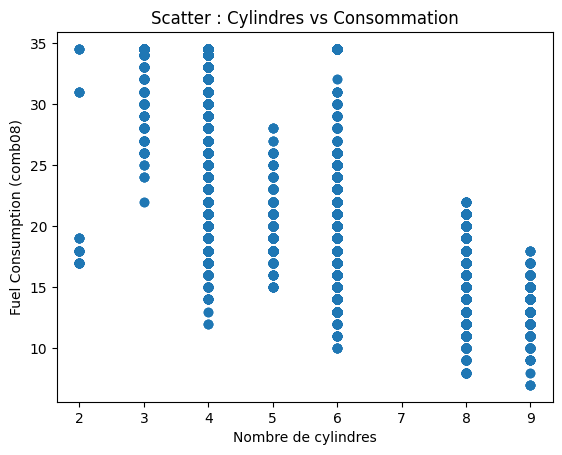

In [ ]:
#barplot

plt.figure(figsize=(13,6), dpi=150)
plt.xticks(rotation=45)
plt.title('Cylinders vs Consumption',size=20)
chart1=sns.barplot( data=df, x="cylinders", y=target)
plt.xlabel('Cylinders',size=20)
plt.ylabel('Fuel Consumption',size=20)
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

#scatterplot
plt.figure()
plt.scatter(df['cylinders'], df['comb08'])
plt.xlabel('Nombre de cylindres')
plt.ylabel('Fuel Consumption (comb08)')
plt.title('Scatter : Cylindres vs Consommation')
plt.show()

**Scatterplot**

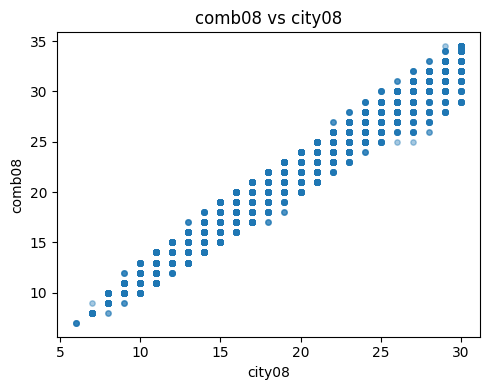

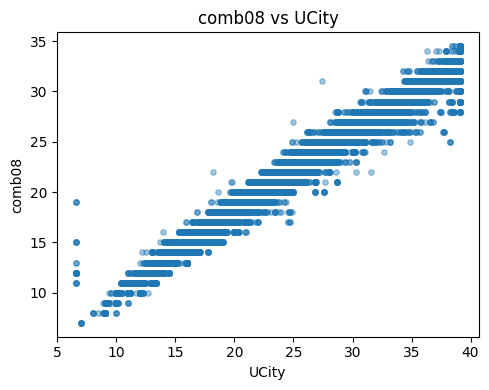

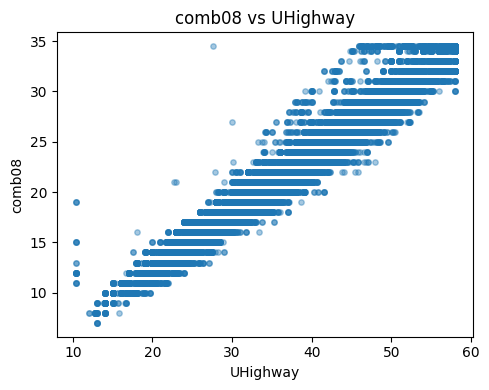

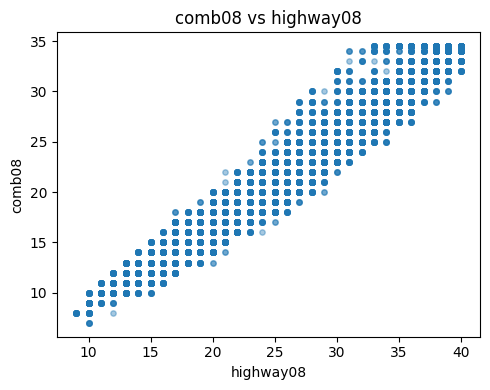

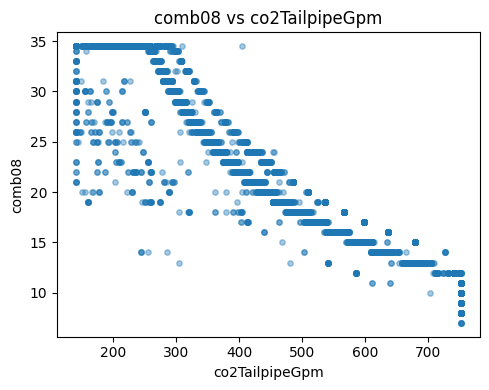

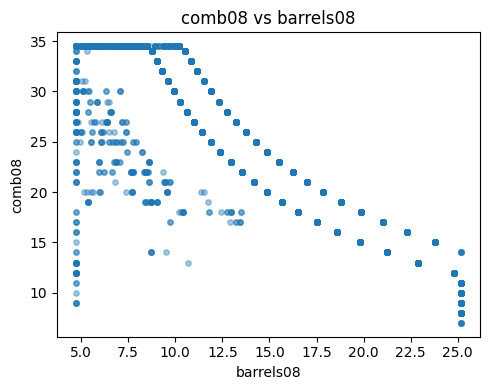

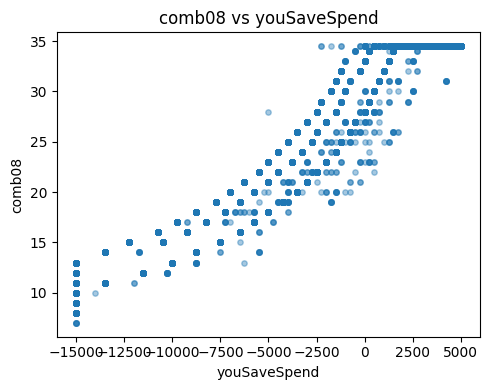

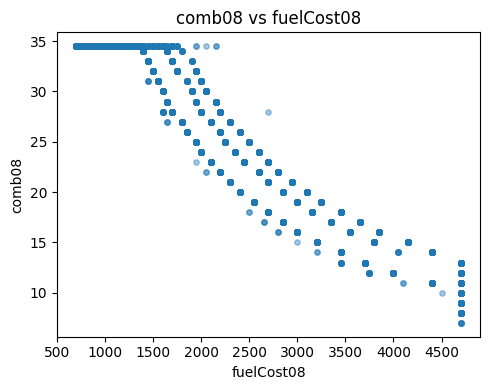

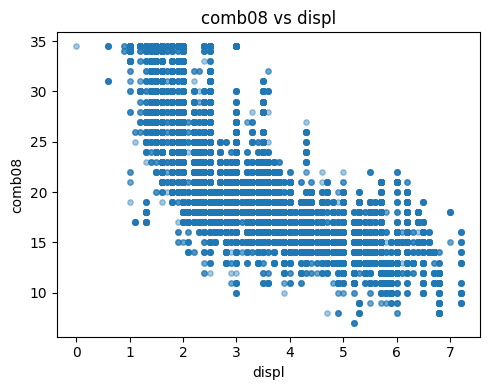

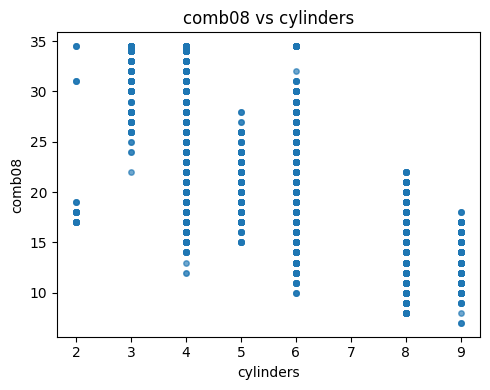

In [ ]:
for col in subset:
    if col == target:
        continue
    plt.figure(figsize=(5,4))
    plt.scatter(df[col], df[target], alpha=0.4, s=15)
    plt.title(f"{target} vs {col}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.tight_layout()
    plt.show()

**Join plot**

Index(['city08', 'UCity', 'UHighway', 'highway08', 'co2TailpipeGpm'], dtype='object')


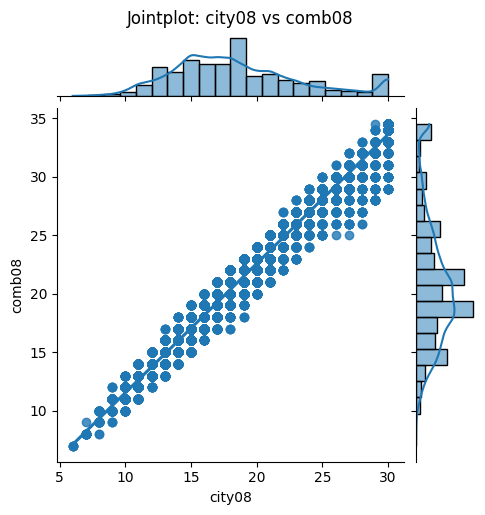

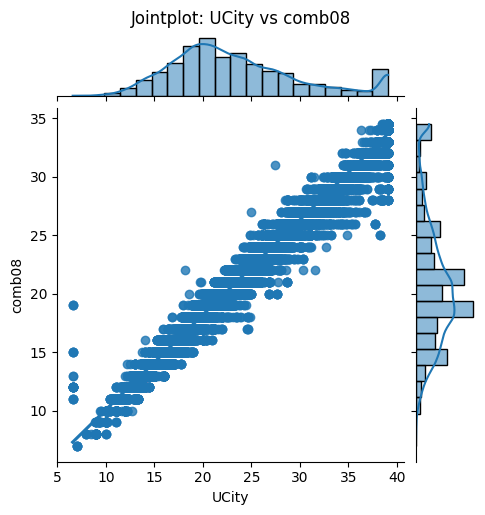

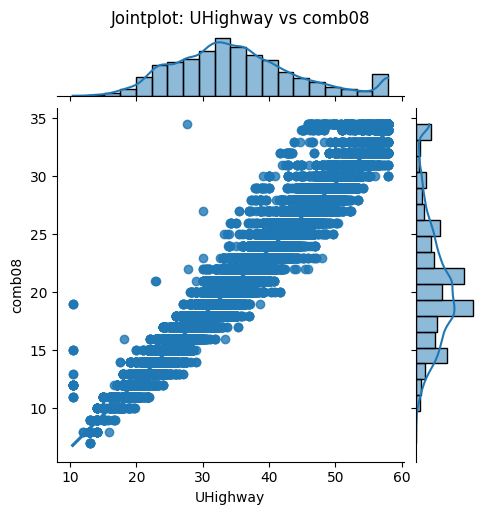

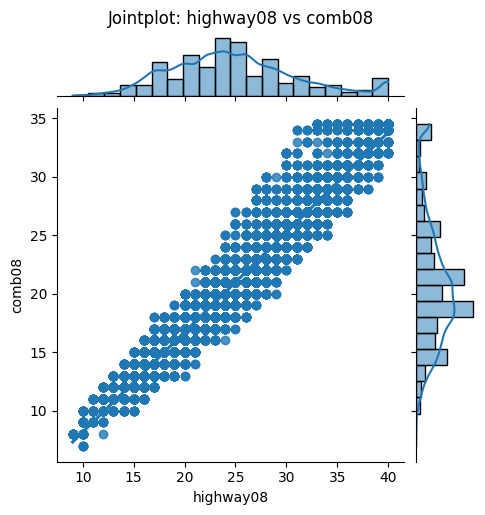

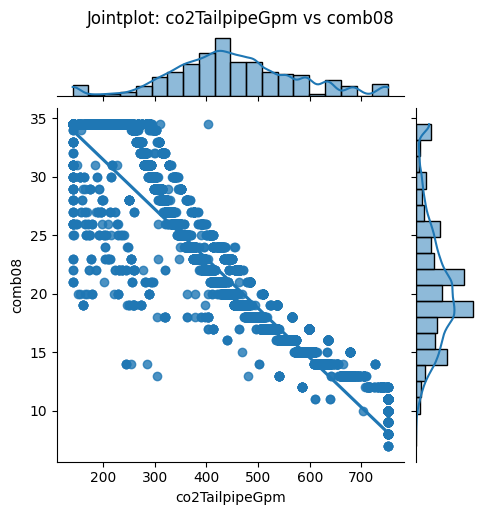

In [ ]:
top5 = corr_small[target].abs().sort_values(ascending=False).index[1:6]
print (top5)
for col in top5:
    sns.jointplot(
        x=col, y=target, data=df, kind='reg',
        height=5, marginal_kws={'bins':20, 'fill':True}
    )
    plt.suptitle(f"Jointplot: {col} vs {target}", y=1.02)
    plt.show()

## 2. Analyse numérique vs catégoriel


**Récapitulatif final pour le modèle**  
- **Continue** : `displ`, `cylinders`  
- **Catégorielles retenues** : `drive`, `fuelType_grouped` (fusionnée), `VClass_grouped`  
- **À exclure** : features dérivées de comb08 (barrels08, co2TailpipeGpm, youSaveSpend, fuelCost08)  
- **Encodage** : One‑Hot pour toutes les catégories  
- **Next step** : construire un `ColumnTransformer` + `Pipeline` pour intégrer ces pré‑traitements avant d’essayer vos algorithmes de régression.


# Numerique categ

In [ ]:
cat_cols

['drive',
 'eng_dscr',
 'fuelType',
 'fuelType1',
 'make',
 'model',
 'mpgData',
 'phevBlended',
 'trany',
 'VClass',
 'baseModel',
 'guzzler',
 'trans_dscr',
 'tCharger',
 'sCharger',
 'atvType',
 'fuelType2',
 'rangeA',
 'evMotor',
 'mfrCode',
 'c240Dscr',
 'c240bDscr',
 'createdOn',
 'modifiedOn',
 'startStop']

In [ ]:
print(df['model'].nunique())
print(df['VClass'].nunique())
print(df['make'].nunique())

5325
34
145


interpretation: Il ya plusieurs colonnes d'ou on va prendre top 10 et regrouper les autres en Other

In [ ]:
top_vclass = df['VClass'].value_counts().nlargest(10).index
df['VClass_grouped'] = df['VClass'].apply(lambda x: x if x in top_vclass else 'Other')

top_vclass = df['model'].value_counts().nlargest(10).index
df['model_grouped'] = df['model'].apply(lambda x: x if x in top_vclass else 'Other')

top_vclass = df['make'].value_counts().nlargest(10).index
df['make_grouped'] = df['make'].apply(lambda x: x if x in top_vclass else 'Other')

**Bar chart**

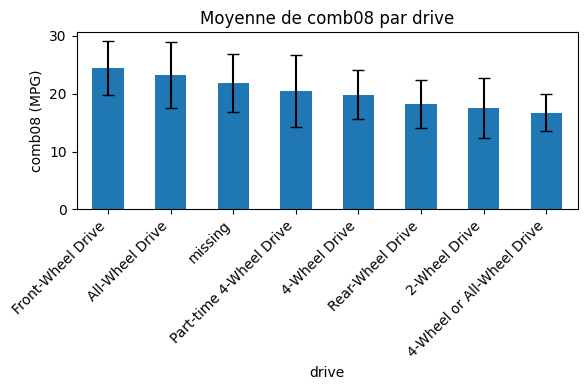

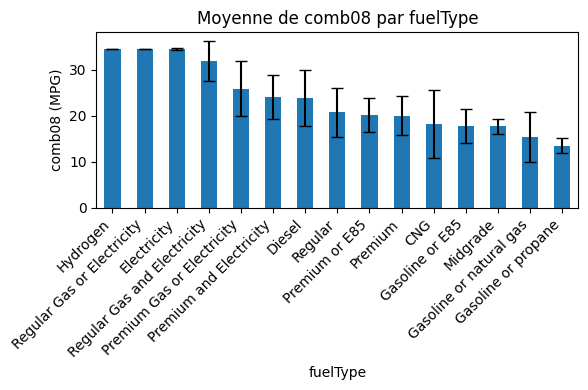

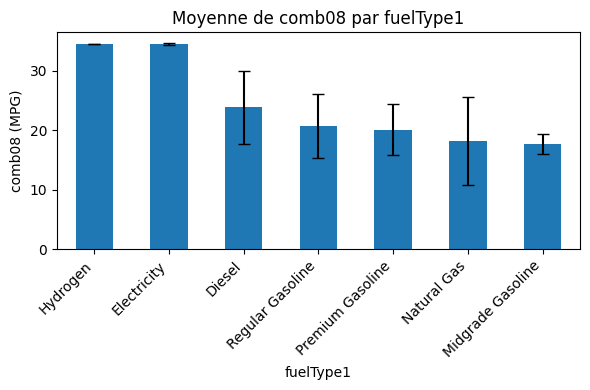

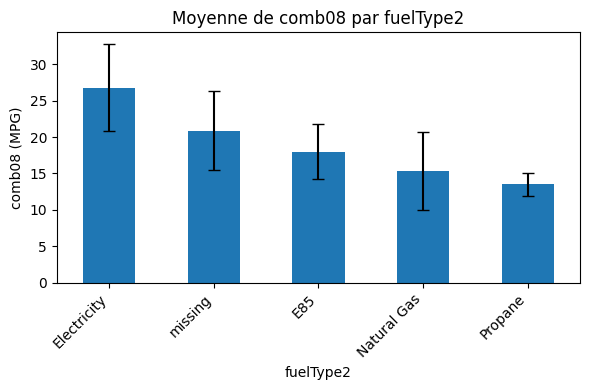

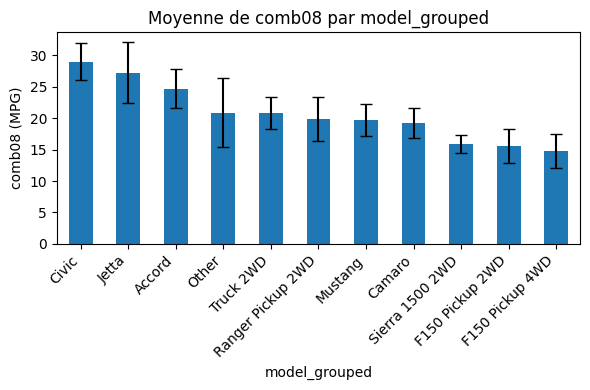

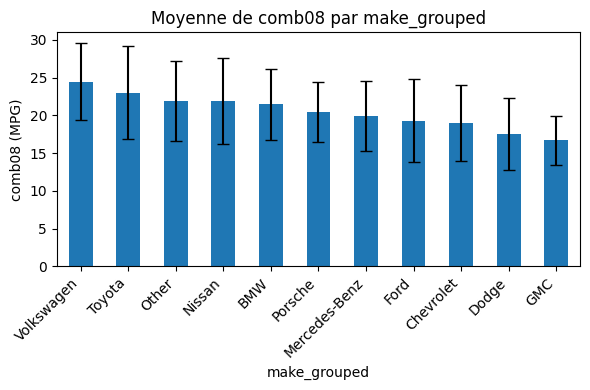

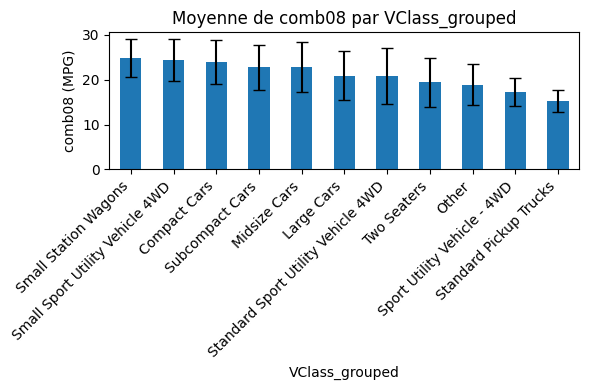

In [ ]:

cat_cols=['drive','fuelType','fuelType1','fuelType2','model_grouped','make_grouped','VClass_grouped']
for cat in cat_cols:
    stats = df.groupby(cat)[target].agg(['mean','std']).sort_values('mean', ascending=False)
    plt.figure(figsize=(6,4))
    stats['mean'].plot.bar(yerr=stats['std'], capsize=4)
    plt.title(f"Moyenne de {target} par {cat}")
    plt.ylabel(f"{target} (MPG)")
    plt.xlabel(cat)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

**Box plot**

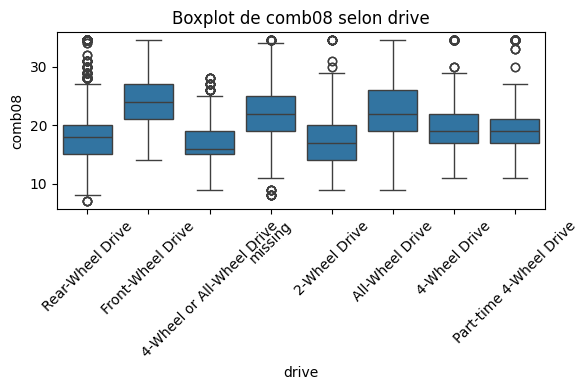

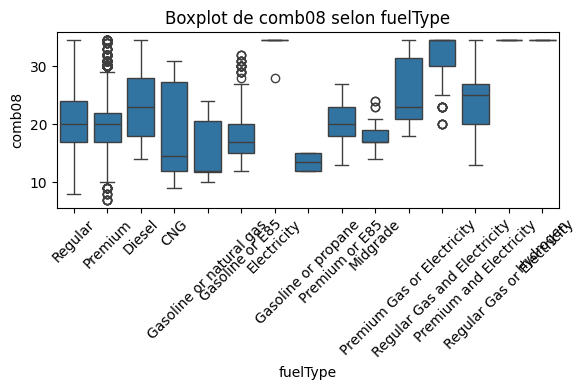

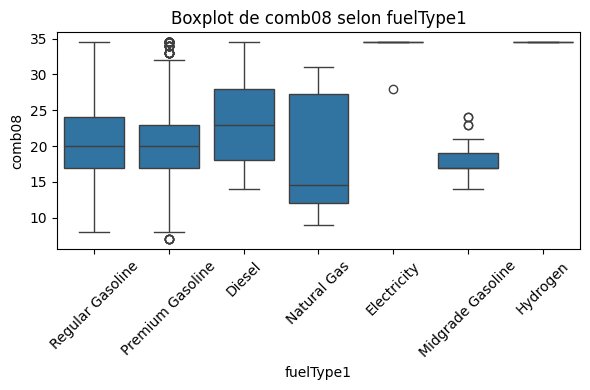

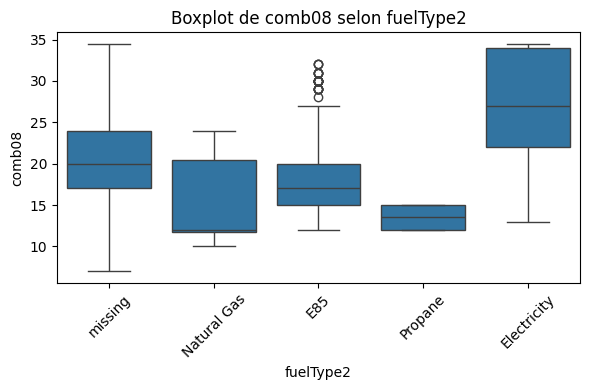

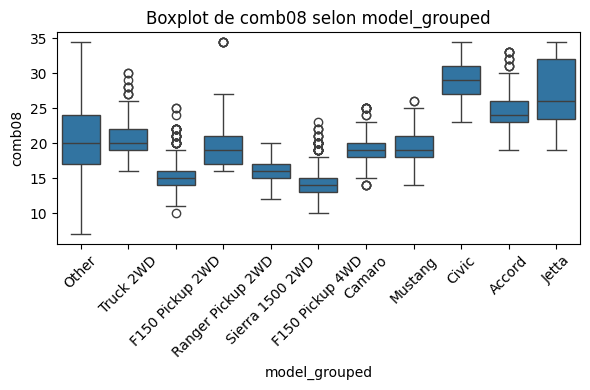

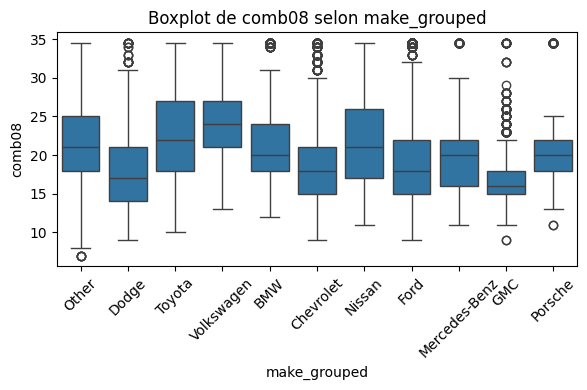

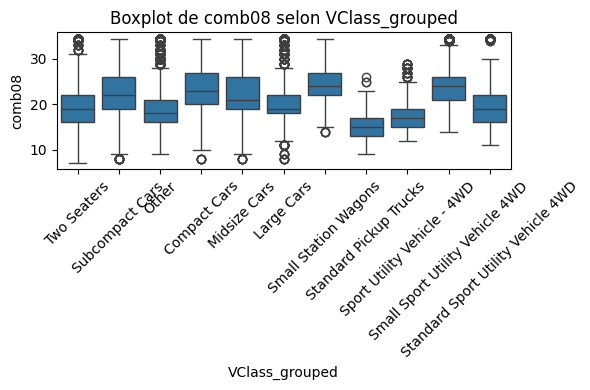

In [ ]:
for cat in cat_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x=cat, y=target)
    plt.title(f"Boxplot de {target} selon {cat}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Violin plot**

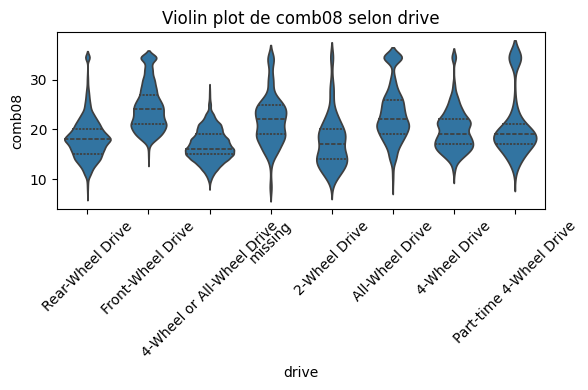

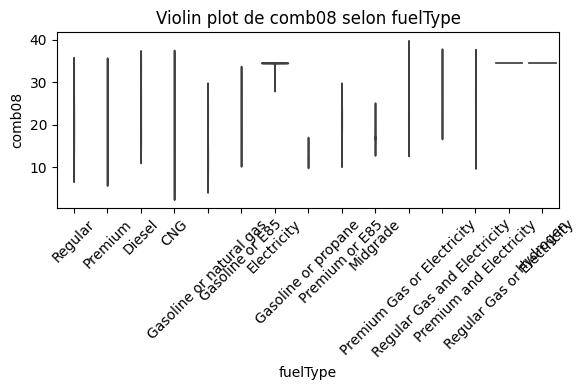

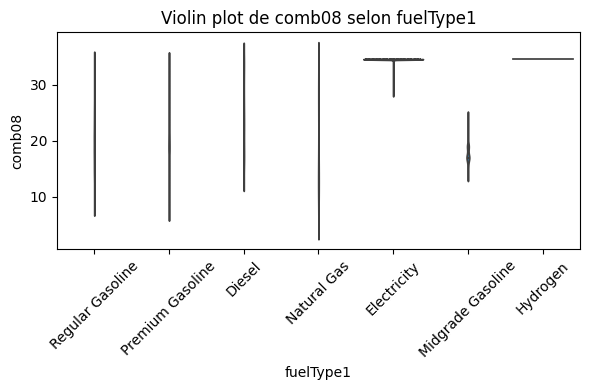

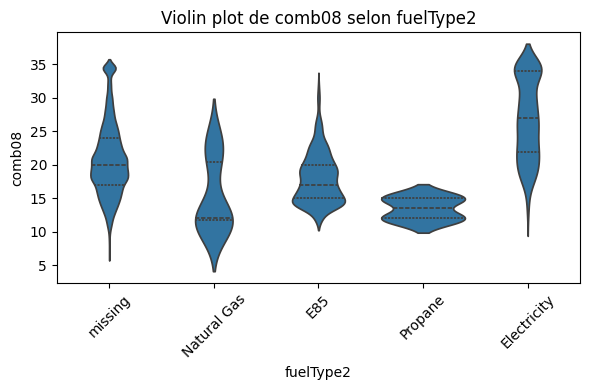

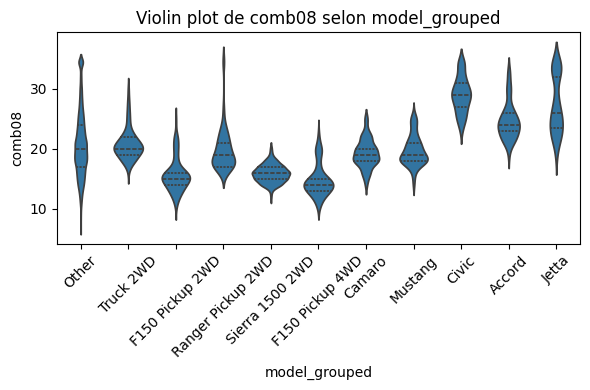

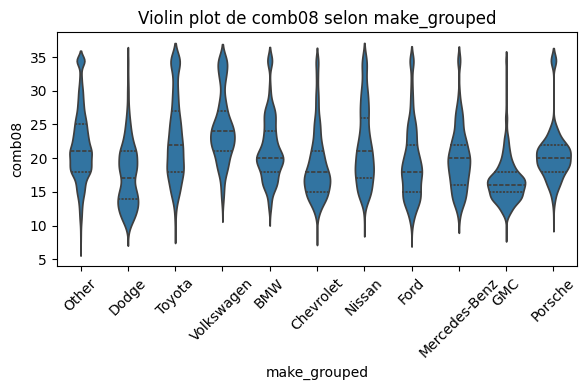

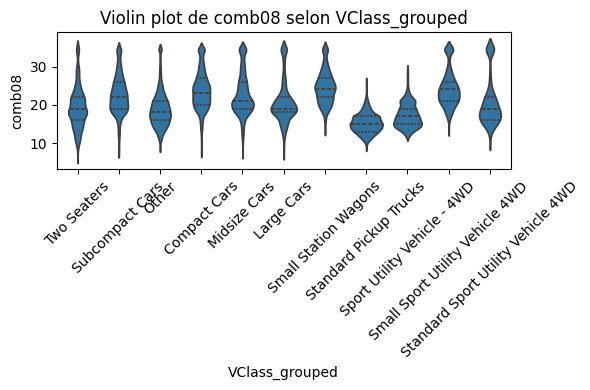

In [ ]:
for cat in cat_cols:
    plt.figure(figsize=(6,4))
    sns.violinplot(data=df, x=cat, y=target, inner='quartile')
    plt.title(f"Violin plot de {target} selon {cat}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Interpretation :
Par type de transmission (drive)
•	Les véhicules à traction avant (Front-Wheel Drive) et certains véhicules 2-wheel drive présentent des densités plus orientées vers les valeurs élevées de comb08 — donc en moyenne plus économes.
•	Les transmissions all-wheel / 4-wheel et part-time 4-wheel ont des distributions plus larges et des médianes généralement plus basses (moins économes).
•	Remarque : certaines catégories montrent une large dispersion (beaucoup de variabilité entre modèles), ce qui indique qu’au sein d’un même type de transmission on trouve à la fois des véhicules économes et des gros consommateurs.
Par type de carburant (fuelType)
•	Les véhicules électrifiés / électricité (ou hybride rechargeable) présentent les valeurs de comb08 les plus élevées — nettement plus économes en énergie.
•	Les carburants conventionnels (essence régulière, premium) ont des distributions larges autour de valeurs moyennes ; il existe de la variabilité selon le modèle.
•	Certaines catégories de carburant peu représentées (CNG, propane, etc.) apparaissent sous forme de lignes fines — cela signifie peu d’observations, donc prudence pour tirer des conclusions sur ces groupes.
Par classe de véhicule (VClass_grouped)
•	Les petites voitures (Two-Seaters, Subcompact, Compact, Midsize cars) ont tendance à afficher des distributions centrées vers des valeurs de comb08 plus élevées — elles sont en moyenne plus économes.
•	Les gros véhicules (Large cars, Pickups, SUVs / Utility vehicles, Station wagons selon le regroupement) ont des médianes plus basses et souvent une plus grande dispersion : certains modèles restent économiques, mais beaucoup consomment plus.
•	Remarque : les classes utilitaires et pick-ups montrent souvent une plus grande variabilité, reflétant la diversité (taille, motorisation, 4WD vs 2WD) au sein de ces groupes.


## 2. Analyse numérique vs catégoriel



**Récapitulatif final pour le modèle**  
- **Continue** : `displ`, `cylinders`  
- **Catégorielles retenues** : `drive`, `fuelType_grouped` (fusionnée), `VClass_grouped`  
- **À exclure** : features dérivées de comb08 (barrels08, co2TailpipeGpm, youSaveSpend, fuelCost08)  
- **Encodage** : One‑Hot pour toutes les catégories  
- **Next step** : construire un `ColumnTransformer` + `Pipeline` pour intégrer ces pré‑traitements avant d’essayer vos algorithmes de régression.


# Cat Cat

bar plot

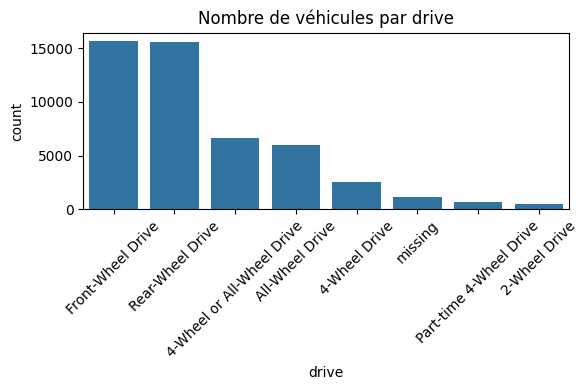

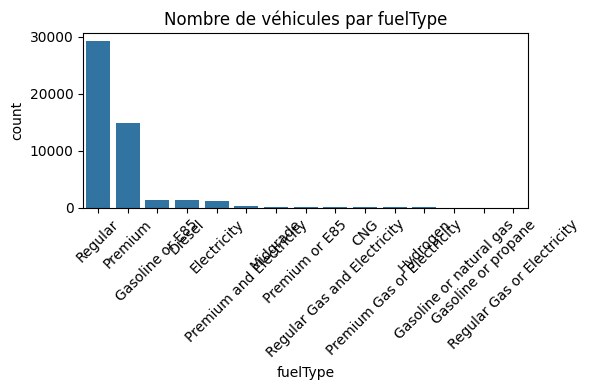

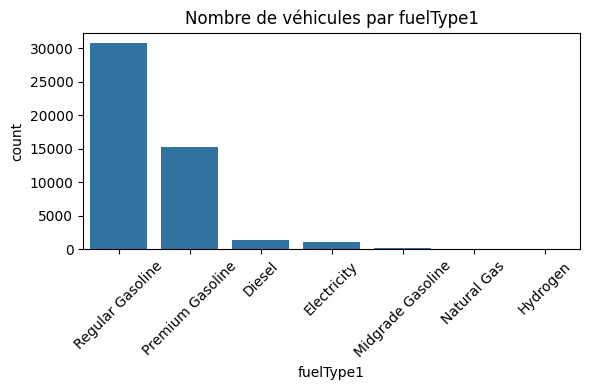

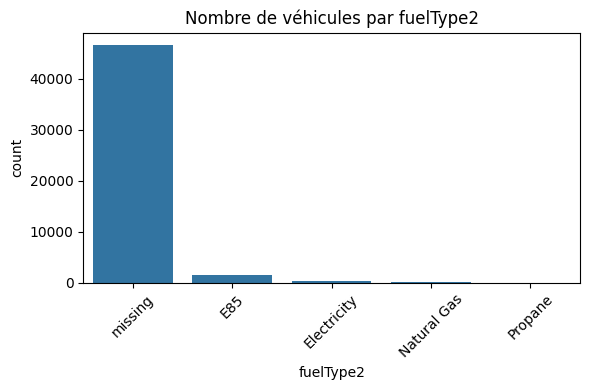

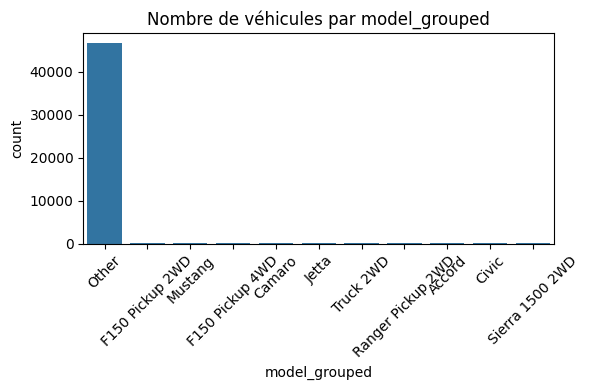

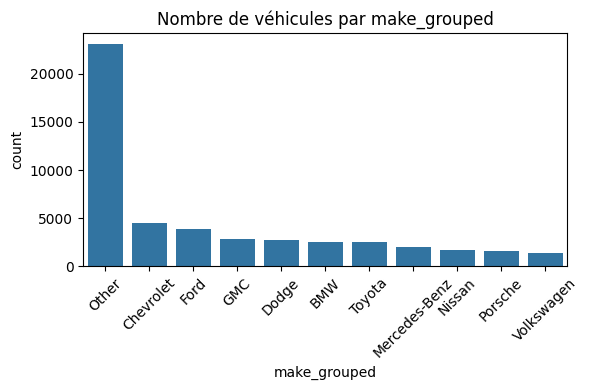

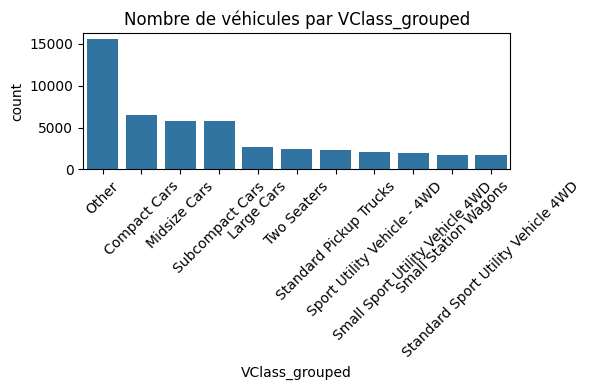

In [ ]:
for col in cat_cols:
    top8 = df[col].value_counts().index[:8]                     
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df[df[col].isin(top8)], order=top8)
    plt.title(f"Nombre de véhicules par {col}")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
print(cat_cols)
print(num_cols)

['drive', 'fuelType', 'fuelType1', 'fuelType2', 'model_grouped', 'make_grouped', 'VClass_grouped']
['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08', 'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2', 'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08U', 'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders', 'displ', 'engId', 'feScore', 'fuelCost08', 'fuelCostA08', 'ghgScore', 'ghgScoreA', 'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD', 'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'pv2', 'pv4', 'range', 'rangeCity', 'rangeCityA', 'rangeHwy', 'rangeHwyA', 'UCity', 'UCityA', 'UHighway', 'UHighwayA', 'year', 'youSaveSpend', 'charge240b', 'phevCity', 'phevHwy', 'phevComb']


# Liste des variables

In [ ]:
num_feats = ['city08','highway08','displ','cylinders']
target    = 'comb08'
# 2) Extraction des numériques
df_num = df[num_feats]

# 3) One-Hot Encoding des catégorielles
df_cat = pd.get_dummies(
    df[cat_cols],
    prefix=cat_cols,
    drop_first=False,   # mettre True si tu veux éviter une modalité redondante
    dummy_na=False
)

# Construction du DataFrame de modélisation

In [ ]:
df_model = pd.concat([df_num, df_cat], axis=1)
df_model[target] = df[target]

print("Shape df_model :", df_model.shape)
df_model.head()

Shape df_model : (48671, 73)


city08  highway08  displ  cylinders  drive_2-Wheel Drive  \
0      19         25    2.0        4.0                False   
1       9         14    4.9        9.0                False   
2      23         33    2.2        4.0                False   
3      10         12    5.2        8.0                False   
4      17         23    2.2        4.0                False   

   drive_4-Wheel Drive  drive_4-Wheel or All-Wheel Drive  \
0                False                             False   
1                False                             False   
2                False                             False   
3                False                             False   
4                False                              True   

   drive_All-Wheel Drive  drive_Front-Wheel Drive  \
0                  False                    False   
1                  False                    False   
2                  False                     True   
3                  False                    False   
4                  False                    False   

   drive_Part-time 4-Wheel Drive  ...  VClass_grouped_Midsize Cars  \
0                          False  ...                        False   
1                          False  ...                        False   
2                          False  ...                        False   
3                          False  ...                        False   
4                          False  ...                        False   

   VClass_grouped_Other  VClass_grouped_Small Sport Utility Vehicle 4WD  \
0                 False                                           False   
1                 False                                           False   
2                 False                                           False   
3                  True                                           False   
4                 False                                           False   

   VClass_grouped_Small Station Wagons  \
0                                False   
1                                False   
2                                False   
3                                False   
4                                False   

   VClass_grouped_Sport Utility Vehicle - 4WD  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   

   VClass_grouped_Standard Pickup Trucks  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   VClass_grouped_Standard Sport Utility Vehicle 4WD  \
0                                              False   
1                                              False   
2                                              False   
3                                              False   
4                                              False   

   VClass_grouped_Subcompact Cars  VClass_grouped_Two Seaters  comb08  
0                           False                        True    21.0  
1                           False                        True    11.0  
2                            True                       False    27.0  
3                           False                       False    11.0  
4                           False                       False    19.0  

[5 rows x 73 columns]

# Pipeline & train/test split

In [ ]:
# Split
X = df_model.drop(columns=target)
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=True
)
print("X_train :", X_train.shape)
print("X_test  :", X_test.shape)
print("y_train :", y_train.shape)
print("y_test  :", y_test.shape)


X_train : (38936, 72)
X_test  : (9735, 72)
y_train : (38936,)
y_test  : (9735,)


# Baseline (Régression linéaire)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
r2   = r2_score(y_test, y_pred)

print(f"MAE : {mae:.4f}")
print(f"MSE : {mse:.4f}")
print(f"R²  : {r2:.4f}")

MAE : 0.3084
MSE : 0.1545
R²  : 0.9949


### Baseline – Régression linéaire  
- **MAE ≃ 0.31 L/100 km**  
- **MSE ≃ 0.155**  
- **R² ≃ 0.995**  


learning curve pour R2 et MSE sil ya un overffitn gappliquer les hyperparametres (linear regression)

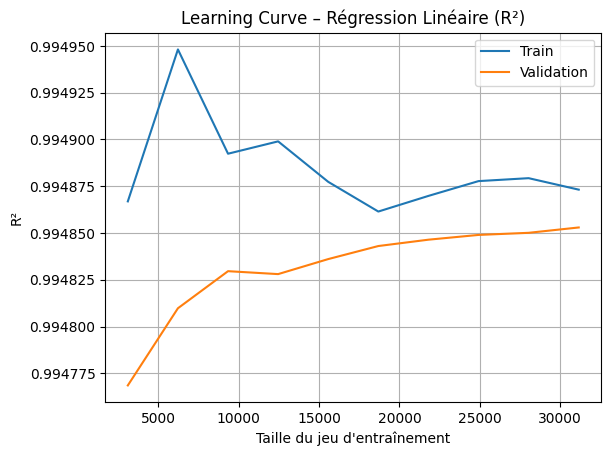

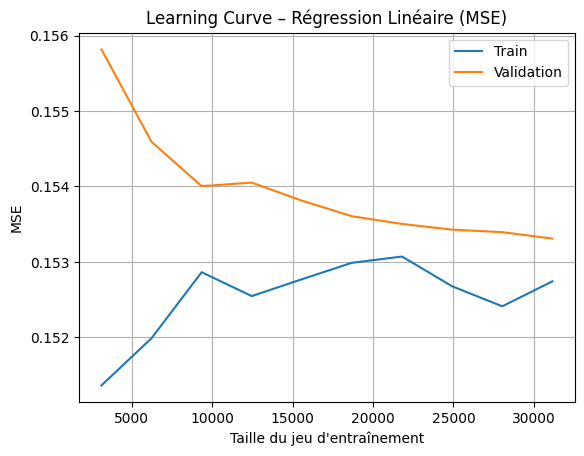

In [ ]:
metrics = {'R²': 'r2',
           'MSE': 'neg_mean_squared_error'}

for label, scoring in metrics.items():
    # Calcul des learning curves
    sizes, train_scores, val_scores = learning_curve(
        lr, X_train, y_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )
    # Pour la MSE, on prend l'opposé pour obtenir des valeurs positives
    if scoring == 'neg_mean_squared_error':
        train_scores = -train_scores
        val_scores   = -val_scores

    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    # Tracé
    plt.plot(sizes, train_mean, label='Train')
    plt.plot(sizes, val_mean,   label='Validation')
    plt.title(f"Learning Curve – Régression Linéaire ({label})")
    plt.xlabel("Taille du jeu d'entraînement")
    plt.ylabel(label)
    plt.legend()
    plt.grid(True)
    plt.show()


# correction de l'overfitting de la regression lineaire

**Recherche du meilleur α avec RidgeCV et GridSearchCV**

In [ ]:
from sklearn.linear_model    import Ridge, RidgeCV
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import GridSearchCV, KFold

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

alphas = np.logspace(-6, 6, 13)

ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge_cv.fit(X_train_s, y_train)
print(f"RidgeCV → best alpha : {ridge_cv.alpha_:.6f}, R² test : {ridge_cv.score(X_test_s, y_test):.4f}")

param_grid = {'alpha': alphas}
grid = GridSearchCV(
    estimator = Ridge(),
    param_grid= param_grid,
    cv        = KFold(5, shuffle=True, random_state=42),
    scoring   = 'r2',
    n_jobs    = -1
)
grid.fit(X_train_s, y_train)
print(f"GridSearchCV → best alpha : {grid.best_params_['alpha']:.6f}")


RidgeCV → best alpha : 0.000001, R² test : 0.9949
GridSearchCV → best alpha : 0.010000


**Évaluation finale du modèle régularisé**

In [ ]:
ridge_final = Ridge(alpha=grid.best_params_['alpha'])
ridge_final.fit(X_train_s, y_train)

y_pred_r = ridge_final.predict(X_test_s)
print("Évaluation finale Ridge :")
print(f"MAE : {mean_absolute_error(y_test, y_pred_r):.4f}")
print(f"MSE : {mean_squared_error(y_test, y_pred_r):.4f}")
print(f"R²  : {r2_score(y_test, y_pred_r):.4f}")


Évaluation finale Ridge :
MAE : 0.3084
MSE : 0.1545
R²  : 0.9949


**Learning Curves du Ridge (α optimal)**

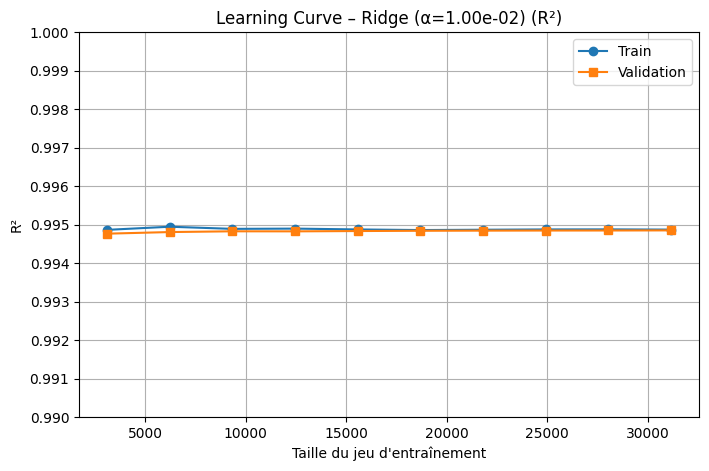

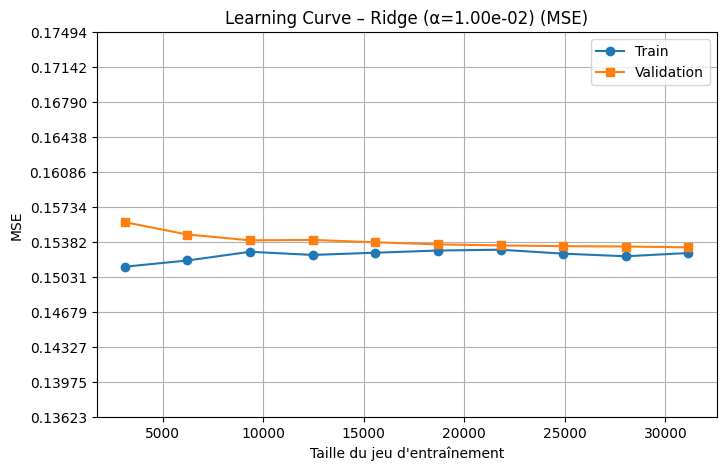

In [ ]:
for label, scoring in metrics.items():
    sizes, train_scores, val_scores = learning_curve(
        ridge_final, X_train_s, y_train,
        train_sizes  = np.linspace(0.1,1.0,10),
        cv           = 5,
        scoring      = scoring,
        n_jobs       = -1,
        shuffle      = True,
        random_state = 42
    )
    if scoring=='neg_mean_squared_error':
        train_scores, val_scores = -train_scores, -val_scores

    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    plt.figure(figsize=(8,5))
    plt.plot(sizes, train_mean, marker='o', label='Train')
    plt.plot(sizes, val_mean,   marker='s', label='Validation')

    if label=='R²':
        plt.ylim(0.99,1.00)
        plt.yticks(np.arange(0.99,1.001,0.001))
    else:
        ymin, ymax = train_mean.min()*0.9, val_mean.max()*1.1
        step = (ymax-ymin)/10
        plt.ylim(ymin, ymax)
        plt.yticks(np.arange(ymin, ymax+step, step))

    plt.title(f"Learning Curve – Ridge (α={ridge_final.alpha:.2e}) ({label})")
    plt.xlabel("Taille du jeu d'entraînement")
    plt.ylabel(label)
    plt.legend(); plt.grid(True)
    plt.show()


# Modèle non linéaire (Random Forest)

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf  = mean_absolute_error(y_test, y_pred_rf)
mse_rf  = mean_squared_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

print(f"RF MAE : {mae_rf:.4f}")
print(f"RF MSE : {mse_rf:.4f}")
print(f"RF R²  : {r2_rf:.4f}")

RF MAE : 0.1396
RF MSE : 0.0809
RF R²  : 0.9973


learning curve pour R2 et MSE (Random Forest)

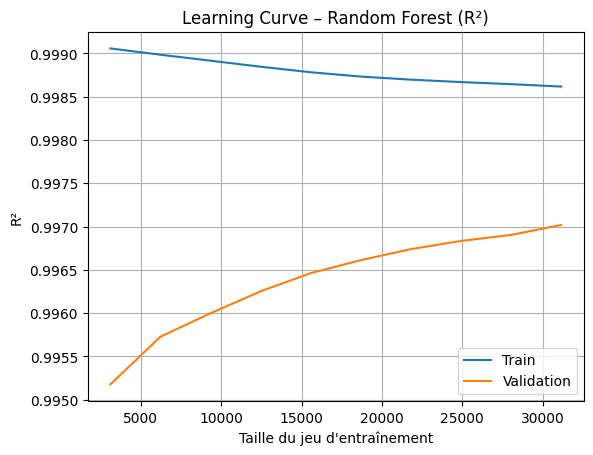

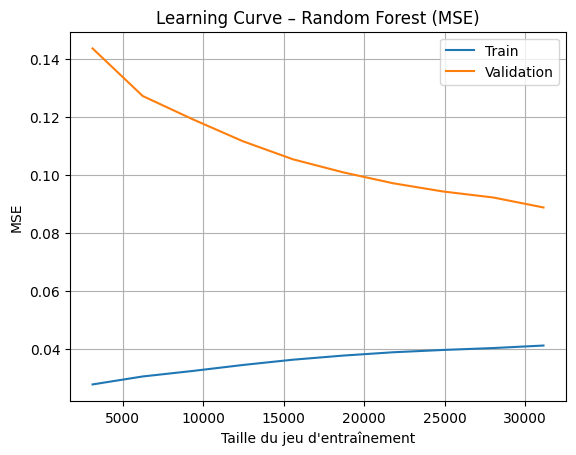

In [ ]:
metrics = {'R²': 'r2',
           'MSE': 'neg_mean_squared_error'}

for label, scoring in metrics.items():
    # Calcul des learning curves
    sizes, train_scores, val_scores = learning_curve(
        rf, X_train, y_train,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=5,
        scoring=scoring,
        n_jobs=-1,
        shuffle=True,
        random_state=42
    )
    if scoring == 'neg_mean_squared_error':
        train_scores = -train_scores
        val_scores   = -val_scores

    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    # Tracé
    plt.plot(sizes, train_mean, label='Train')
    plt.plot(sizes, val_mean,   label='Validation')
    plt.title(f"Learning Curve – Random Forest ({label})")
    plt.xlabel("Taille du jeu d'entraînement")
    plt.ylabel(label)
    plt.legend()
    plt.grid(True)
    plt.show()


# Correction de l'overfitting de random forest

In [ ]:

param_dist = {
    'n_estimators':      [100, 200, 500],
    'max_depth':         [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf':  [1, 2, 5],
    'max_features':      ['sqrt', 'log2', 0.3, 0.5],
    'bootstrap':         [True, False]
}

search = RandomizedSearchCV(
    estimator          = rf,
    param_distributions= param_dist,
    n_iter             = 50,
    scoring            = 'neg_mean_squared_error',
    refit              = True,
    cv                 = 5,
    n_jobs             = -1,
    random_state       = 42,
    verbose            = 1
)

search.fit(X_train, y_train)

rf_tuned = search.best_estimator_
print("Meilleurs paramètres :", search.best_params_)
print(f"Test MSE (tuned) : {mean_squared_error(y_test, rf_tuned.predict(X_test)):.4f}")
print(f"Test R²  (tuned) : {r2_score(y_test, rf_tuned.predict(X_test)):.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Meilleurs paramètres : {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': None, 'bootstrap': True}
Test MSE (tuned) : 0.0783
Test R²  (tuned) : 0.9974


learning curve

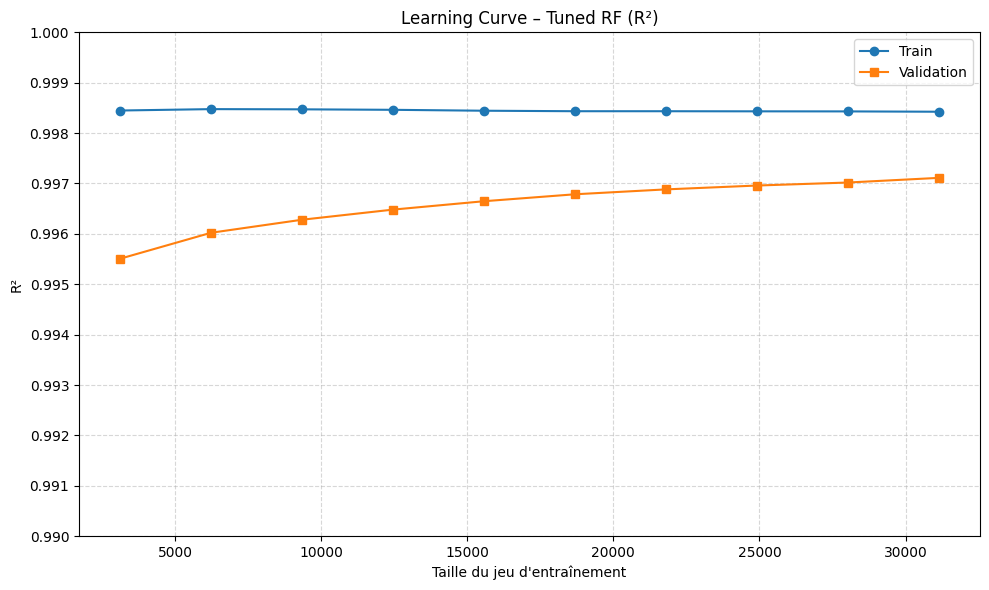

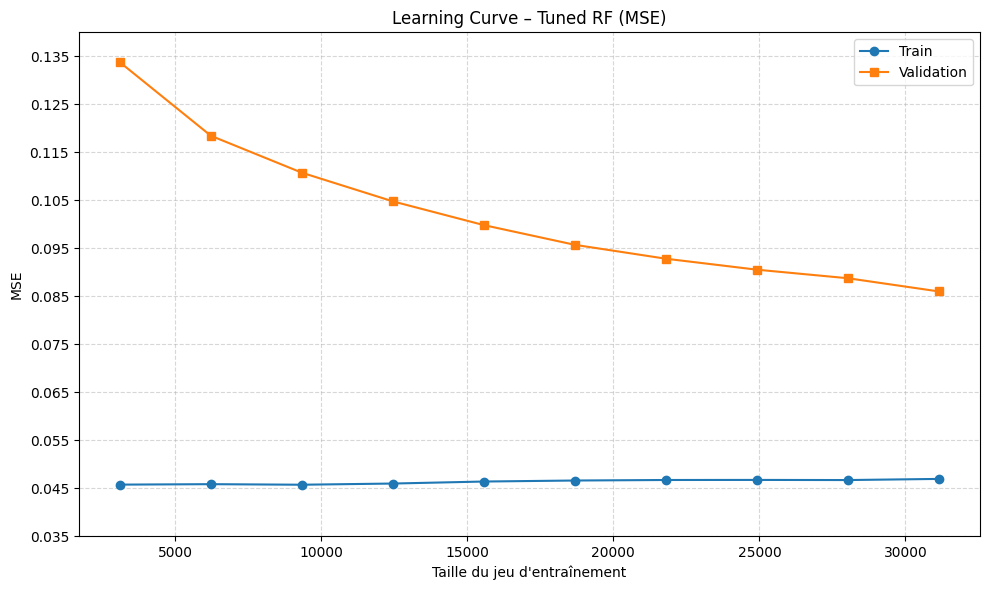

In [ ]:
tuned_rf = search.best_estimator_

metrics = {'R²': 'r2',
           'MSE': 'neg_mean_squared_error'}

for label, scoring in metrics.items():
    sizes, train_scores, val_scores = learning_curve(
        tuned_rf, X_train, y_train,
        train_sizes  = np.linspace(0.1, 1.0, 10),
        cv           = 5,
        scoring      = scoring,
        n_jobs       = -1,
        shuffle      = True,
        random_state = 42
    )

    if scoring == 'neg_mean_squared_error':
        train_scores = -train_scores
        val_scores   = -val_scores

    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(sizes, train_mean, marker='o', label='Train')
    plt.plot(sizes, val_mean,   marker='s', label='Validation')


    if label == 'R²':
        plt.ylim(0.99, 1.00)
        plt.yticks(np.arange(0.99, 1.001, 0.001))
    else:

        plt.ylim(0.05, 0.14)
        plt.yticks(np.arange(0.035, 0.141, 0.01))


    plt.title(f"Learning Curve – Tuned RF ({label})")
    plt.xlabel("Taille du jeu d'entraînement")
    plt.ylabel(label)
    plt.legend()
    plt.grid(True, ls='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


# Évaluation de chaque Modèle

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Liste de vos modèles déjà entraînés
models = {
    'LinReg':      lr,
    'Ridge (CV)':  ridge_cv,
    'Ridge (GS)':  ridge_final,
    'RF':          rf,
    'RF Tuned':    rf_tuned
}

records = []
for name, model in models.items():
    # Choix : X_test_s ou X_test selon que le modele attend des données standardisées
    X_eval = X_test_s if 'Ridge' in name else X_test
    y_pred = model.predict(X_eval)
    records.append({
        'Modèle': name,
        'MAE'   : mean_absolute_error(y_test, y_pred),
        'MSE'   : mean_squared_error(y_test, y_pred),
        'R²'    : r2_score(y_test, y_pred)
    })

df_perf = pd.DataFrame.from_records(records).set_index('Modèle')
print(df_perf)

                 MAE       MSE        R²
Modèle                                  
LinReg      0.308354  0.154538  0.994935
Ridge (CV)  0.308354  0.154538  0.994935
Ridge (GS)  0.308354  0.154538  0.994935
RF          0.139570  0.080905  0.997348
RF Tuned    0.150110  0.078267  0.997435


Tous les modèles (LinReg, Ridge, RF, RF Tuned) ont un R² très élevé (> 0.994), mais RF et RF Tuned dominent clairement les régressions linéaires sur MAE et MSE.

# Validation Croisée Multi-Métriques

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate, KFold
import pandas as pd

# Vos modèles
models = {
    'LinReg':    lr,
    'Ridge (CV)':ridge_cv,
    'Ridge (GS)':ridge_final,
    'RF':        rf,
    'RF Tuned':  rf_tuned
}

# Définition des données
X_all = X.copy()
y_all = y.copy()

# Standardisation pour Ridge
scaler = StandardScaler().fit(X_all)
X_all_s = scaler.transform(X_all)

# Configuration de la CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = {
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'R2' : 'r2'
}

# Boucle CV multi-métriques
results = []
for name, model in models.items():
    X_cv = X_all_s if 'Ridge' in name else X_all
    res = cross_validate(model, X_cv, y_all, cv=cv, scoring=scoring, n_jobs=-1)
    results.append({
        'Modèle': name,
        'MAE μ':  -res['test_MAE'].mean(),
        'MAE σ':   res['test_MAE'].std(),
        'MSE μ':  -res['test_MSE'].mean(),
        'MSE σ':   res['test_MSE'].std(),
        'R2 μ':    res['test_R2'].mean(),
        'R2 σ':    res['test_R2'].std(),
    })

df_cv = pd.DataFrame(results).set_index('Modèle')
print(df_cv)


               MAE μ     MAE σ     MSE μ     MSE σ      R2 μ      R2 σ
Modèle                                                                
LinReg      0.310313  0.001677  0.153577  0.001112  0.994869  0.000052
Ridge (CV)  0.310207  0.001673  0.153581  0.001114  0.994869  0.000053
Ridge (GS)  0.310313  0.001677  0.153577  0.001112  0.994869  0.000052
RF          0.142672  0.002061  0.083466  0.001587  0.997211  0.000078
RF Tuned    0.153672  0.002700  0.081337  0.002715  0.997282  0.000104




```
Les moyennes CV confirment que RF obtient en moyenne un MAE : 0.143 et un MSE : 0.083, alors que RF Tuned descend à un MSE : 0.081.

Les écarts-types (σ) sont très bas (< 0.003), donc les performances sont stables d’un pli à l’autre.

```



# t-test Pairé sur la MSE

In [ ]:
from sklearn.model_selection import cross_validate
from scipy.stats import ttest_rel

# Reprendre la même CV
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Extraire les MSE pli par pli
mse_rf       = -cross_validate(rf,       X_all,   y_all, cv=cv, scoring='neg_mean_squared_error')['test_score']
mse_rf_tuned = -cross_validate(rf_tuned, X_all,   y_all, cv=cv, scoring='neg_mean_squared_error')['test_score']

# t-test pairé
t_stat, p_val = ttest_rel(mse_rf, mse_rf_tuned)
print(f"t-statistic = {t_stat:.3f}, p-value = {p_val:.3f}")


t-statistic = 3.258, p-value = 0.031


 RF Tuned garatni unr meilleur MSE .

In [ ]:
import joblib
joblib.dump(rf_tuned, "rf_tuned.joblib")
joblib.dump(X_train.columns.to_list(), "feature_names.joblib")
joblib.dump(X_train.median().to_dict(), "medians.joblib")
print("Saved rf_tuned.joblib + feature_names + medians")


Saved rf_tuned.joblib + feature_names + medians
